## Telecom Churn - ML Group Case Study

### __Problem Statement__

#### In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. To reduce customer churn, telecom companies need to __predict which customers are at high risk of churn.__

#### __Objective__

#### The objectives are: 
- Analyse customer-level data of a leading telecom firm 
- Build predictive models to identify customers at high risk of churn 
- Identify the main indicators of churn.

#### Importing the libraries

In [1]:
#Let's import all the necessary libraries
import numpy as np
import pandas as pd

# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import scale, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve
from sklearn.metrics import plot_roc_curve, recall_score, classification_report
from sklearn.metrics import recall_score,precision_score,roc_auc_score,f1_score,accuracy_score,confusion_matrix
from sklearn.feature_selection import RFE, RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA,IncrementalPCA
from collections import Counter
from imblearn.over_sampling import SMOTE
import xgboost as xgb  # Load  xgboost
import warnings
warnings.filterwarnings('ignore')


import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Step 1: Reading the data

In [2]:
df =  pd.read_csv('telecom_churn_data.csv')

In [3]:
df.shape

(99999, 226)

In [4]:
## chekcing for top 5 rows
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,...,NaN,NaN,154.0,50.0,NaN,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,...,0.0,NaN,NaN,NaN,46.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.0,0.00,0.00,0.00,117.96,241.33,208.16,98.61,0.00,...,NaN,56.0,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
## Checking the bottom 5 rows
df.tail()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.46,52.79,27.14,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,5.40,3.36,5.91,0.00,12.78,54.46,49.58,24.78,0.00,0.00,0.00,2.25,0.00,0.0,3.21,0.11,18.18,57.83,55.49,27.03,0.00,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.0
99995,7000607688,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,112.201,77.811,79.081,140.835,29.26,18.13,16.06,49.49,100.83,69.01,66.39,56.13,0.0,0.0,0.0,0.95,0.0,0.0,0.0,4.23,28.93,18.13,16.06,49.49,91.34,47.53,57.51,46.71,1.71,9.81,5.83,3.28,0.00,0.0,0.00,0.00,121.99,75.48,79.41,99.49,0.33,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2052,0.00,0.00,0.00,0.0
99996,7000087541,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,229.187,0.000,0.000,0.000,1.11,NaN,NaN,NaN,21.04,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.11,NaN,NaN,NaN,13.33,NaN,NaN,NaN,0.00,NaN,NaN,NaN,4.71,NaN,NaN,NaN,14.44,NaN,NaN,NaN,0.00,...,NaN,39.0,NaN,NaN,NaN,0.21,0.00,0.00,0.00,275.85,0.00,0.0,0.00,141.48,NaN,NaN,NaN,2.40,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1.0,NaN,NaN,NaN,185,0.00,0.00,0.00,0.0
99997,7000498689,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,322.991,303.386,606.817,731.010,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4.0,583.0,358.0,716.0,862.0,76.51,241.77,136.47,85.67,1453.63,1382.08,2683.3,4177.14,235.68,301.34,602.68,725.69,235.68,301.34,602.68,725.68,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,1,2,4,4,1,0,0,0,1.0,1.0,1.0,1.0,478,1445.74,1151.03,1173.18,0.0
99998,7001905007,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,687.065,0.000,0.000,0.000,84.34,NaN,NaN,NaN,166.46,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,84.34,NaN,NaN,NaN,166.46,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,250.81,NaN,NaN,NaN,0.00,...,NaN,154.0,NaN,NaN,NaN,26.11,0.00,0.00,0.00,152.70,0.00,0.0,0.00,11.40,NaN,NaN,NaN,18.68,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,NaN,NaN,NaN,751,0.00,0.00,0.00,0.0


In [6]:
## Checking for columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
## Checking for description
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,...,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,1.232726,144.201175,141.670476,141.328209,138.709970,79.829870,83.299598,83.282673,82.342919,87.299624,...,0.659363,192.600982,200.981292,197.526489,192.734315,51.904956,51.229937,50.170154,44.719701,121.396219,128.995847,135.410689,136.056613,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026,0.025086,0.023034,0.020844,0.015971,0.079641,0.083221,0.081001,0.068781,0.389384,0.439634,0.450075,0.393104,0.075921,0.078581,0.082941,0.086341,0.074781,0.080401,0.084501,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,327.170662,319.396092,72.825411,73.447948,68.402466,57.137537,71.443196,58.455762,64.713221,58.438186,150.856393,155.318705,151.184830,147.995390,162.780544,157.492308,156.537048,158.681454,14.230438,14.264986,13.270996,13.457549,5.448946,7.533

#### Since the mobile_number column contains only the phone numbers which is not useful information, we can drop this column first

In [8]:
# Dropping the column
df = df.drop('mobile_number',axis =1)

#### From the description we observe that the columns circle_id doesn't show any variance as the circle id is 109 for all the rows, we can drop this column

In [9]:
# Dropping the column circle_id
df = df.drop('circle_id',axis =1)

#### Let's describe the data now

In [10]:
df.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,...,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,1.232726,144.201175,141.670476,141.328209,138.709970,79.829870,83.299598,83.282673,82.342919,87.299624,90.804137,89.838390,...,0.659363,192.600982,200.981292,197.526489,192.734315,51.904956,51.229937,50.170154,44.719701,121.396219,128.995847,135.410689,136.056613,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026,0.025086,0.023034,0.020844,0.015971,0.079641,0.083221,0.081001,0.068781,0.389384,0.439634,0.450075,0.393104,0.075921,0.078581,0.082941,0.086341,0.074781,0.080401,0.084501,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,327.170662,319.396092,72.825411,73.447948,68.402466,57.137537,71.443196,58.455762,64.713221,58.438186,150.856393,155.318705,151.184830,147.995390,162.780544,157.492308,156.537048,158.681454,14.230438,14.264986,13.270996,13.457549,5.448946,7.5334

#### The next 3 columns are loc_og_t2o_mou, std_og_t2o_mou and loc_ic_t2o_mou. The available values are 98981 only. Let's check the values which are not 0

In [11]:
df[df.loc_og_t2o_mou != 0.0]

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
201,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,9/30/2014,45.000,46.500,46.500,45.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,1069,0.0,0.0,0.0,0.0
202,NaN,NaN,NaN,6/30/2014,NaN,NaN,NaN,126.339,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,925,0.0,0.0,0.0,0.0
232,NaN,NaN,NaN,6/30/2014,NaN,8/31/2014,NaN,0.700,0.000,108.460,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,671,0.0,0.0,0.0,0.0
275,NaN,NaN,NaN,6/30/2014,NaN,NaN,NaN,90.208,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,318,0.0,0.0,0.0,0.0
279,NaN,NaN,NaN,6/30/2014,NaN,8/31/2014,NaN,0.900,0.000,106.760,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,663,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99383,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.000,154.710,-5.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### The values are either 0 or NaN for these 3 columns, these are not of much use. We can drop these

In [12]:
# Dropping the column#'circle_id'
df = df.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'],axis =1)

#### Checking the dataframe now

In [13]:
df.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,...,NaN,NaN,154.0,50.0,NaN,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,...,0.0,NaN,NaN,NaN,46.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,14.89,289.58,226.21,2.99,1.73,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.0,0.00,0.00,0.00,117.96,241.33,208.16,98.61,0.00,0.00,0.00,0.00,9.31,0.00,...,NaN,56.0,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


## Step 2: Data Preparation

#### We will perform below steps for Data preparation
1. Filtering out columns for Sep month since it is for defining churn
2. Handling missing values on the remaining columns
3. Deriving new features
4. Filtering high value customers
5. Tagging churners and removing attributes of the churn phase

### 2.1: Filtering columns for Sep

In [14]:
## Filtering columns for Sep month
sep_cols = [i for i in df.columns if '_9' in i or 'sep' in i]

#### Let's check how many columns are for Sep month

In [15]:
len(sep_cols)

55

#### We have 54 columns that contains data for Sep month

#### Let's check the no of columns for other months

In [16]:
len([i for i in df.columns if '_6' in i or '_7' in i or '_8' in i])

162

#### In our dataframe we have 162+54 = 216 columns with only month related data

#### The total no of columns are: 221

In [17]:
df.shape[1]

221

#### It means that there are 5 other variables (221-216 = 5) columns with other information

#### Let's keep the data for columns other than Sep in a separate dataframe

In [18]:
tel_df = df[df.columns.difference(sep_cols)]

#### Let's describe the newly created dataframe

In [19]:
tel_df.describe()

,aon,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_6,arpu_7,arpu_8,aug_vbc_3g,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,fb_user_6,fb_user_7,fb_user_8,ic_others_6,ic_others_7,ic_others_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,jul_vbc_3g,jun_vbc_3g,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_og_mou_6,...,std_ic_mou_7,std_ic_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
count,99999.000000,25153.000000,25571.000000,26339.000000,25153.000000,25571.000000,26339.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25153.000000,25571.000000,26339.000000,25153.000000,25571.000000,26339.000000,25153.000000,25571.000000,26339.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,...,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.0,96140.0,94621.0,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.0,96140.0,94621.0,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,1219.854749,86.398003,85.914450,86.599478,89.555057,89.384120,91.173849,282.987358,278.536648,279.154731,68.170248,192.600982,200.981292,197.526489,1.864668,2.044699,2.016288,0.599133,0.621720,0.635711,0.914404,0.908764,0.890808,0.854656,1.012960,0.970800,7.460608,8.334936,8.442001,0.798277,0.776572,0.791247,66.839062,60.021204,63.156252,59.385804,62.641716,167.491059,167.719540,167.432575,12.084305,12.599697,11.751834,107.475650,107.120493,108.460515,47.922365,47.990520,47.211362,144.201175,...,33.887833,33.154735,2.156397,2.216923,2.085004,20.722240,21.656415,21.183211,0.0,0.0,0.0,9.575993,10.011904,9.883921,168.261218,175.221436,174.191498,0.0,0.0,0.0,1.129011,1.115010,1.067792,87.299624,90.804137,89.838390,79.829870,83.299598,83.282673,200.130037,202.853055,198.750783,305.133424,310.231175,304.119513,327.514615,322.962970,324.157122,2.463802,2.666419,2.651999,7.558806,7.700367,7.212912,51.904956,51.229937,50.170154,121.396219,128.995847,135.410689
std,954.733842,172.767523,176.379871,168.247852,193.124653,195.893924,188.180936,328.439770,338.156291,344.474791,267.580450,192.646318,196.791224,191.301305,2.570254,2.768332,2.720132,1.274428,1.394524,1.422827,0.279772,0.287950,0.311885,11.955164,12.673099,13.284348,59.7229

#### Let's check the columns which have only 1 unique values,since these columns will not have much variation, we will drop those columns

In [20]:
## Checking which columns having only 1 distinct values
dist_1 = []
for i in tel_df.columns:
    if len(tel_df[i].value_counts()) == 1:
        print(tel_df[i].value_counts())
        dist_1.append(i)

6/30/2014    99999
Name: last_date_of_month_6, dtype: int64
7/31/2014    99398
Name: last_date_of_month_7, dtype: int64
8/31/2014    98899
Name: last_date_of_month_8, dtype: int64
0.0    96062
Name: std_ic_t2o_mou_6, dtype: int64
0.0    96140
Name: std_ic_t2o_mou_7, dtype: int64
0.0    94621
Name: std_ic_t2o_mou_8, dtype: int64
0.0    96062
Name: std_og_t2c_mou_6, dtype: int64
0.0    96140
Name: std_og_t2c_mou_7, dtype: int64
0.0    94621
Name: std_og_t2c_mou_8, dtype: int64


In [21]:
# Checking the columns
dist_1

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8']

#### Chekcing the description from these columns

In [22]:
tel_df.loc[:,dist_1].describe(include = 'all')

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8
count,99999,99398,98899,96062.0,96140.0,94621.0,96062.0,96140.0,94621.0
unique,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
top,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,NaN,NaN,NaN,NaN
freq,99999,99398,98899,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
std,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
min,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
25%,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
50%,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
75%,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
### The values are either 0 or missing. We can drop these cols since these do not give any value addition
tel_df.drop(dist_1, inplace = True, axis = 1)

#### Checking the dataframe now

In [24]:
tel_df.head()

,aon,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_6,arpu_7,arpu_8,aug_vbc_3g,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,fb_user_6,fb_user_7,fb_user_8,ic_others_6,ic_others_7,ic_others_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,jul_vbc_3g,jun_vbc_3g,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2m_mou_6,...,spl_ic_mou_7,spl_ic_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
0,968,212.17,212.17,212.17,212.17,212.17,212.17,197.385,214.816,213.803,30.4,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,6/21/2014,7/16/2014,8/8/2014,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,101.20,252,252,252,NaN,NaN,5.44,NaN,NaN,1.15,NaN,...,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,0.00,0.00,0.00,362,252,252,1.0,1.0,1.0,4,3,2,30.13,1.32,5.75,83.57,150.76,109.61
1,1006,NaN,28.61,7.60,NaN,0.00,0.00,34.047,355.074,268.321,0.0,NaN,154.0,50.0,NaN,1.0,2.0,NaN,0.0,0.0,6/29/2014,7/31/2014,8/28/2014,NaN,7/25/2014,8/10/2014,NaN,1.0,1.0,0.00,0.00,0.0,1.83,0.00,0.0,0.0,0.0,0.0,0.0,0.00,44,23,30,19.09,104.23,408.43,0.00,8.93,3.61,17.48,...,0.0,0.0,4.68,23.43,12.76,5.90,0.00,14.84,0.00,0.00,0.00,5.90,0.00,12.49,0.00,0.00,2.35,0.23,4.58,0.13,0.00,0.00,0.00,0.00,0.46,0.13,0.23,4.11,0.00,26.83,104.23,423.28,40.31,178.53,312.44,74,384,283,NaN,1.0,2.0,4,9,11,0.00,108.07,365.47,0.00,0.00,0.00
2,1103,NaN,NaN,NaN,NaN,NaN,NaN,167.690,189.058,210.226,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/17/2014,7/24/2014,8/14/2014,NaN,NaN,NaN,NaN,NaN,NaN,0.93,3.14,0.0,0.00,0.85,0.0,0.0,0.0,0.0,0.0,4.17,0,200,86,229.56,208.86,155.99,99.48,122.29,49.63,14.38,...,0.0,0.0,46.56,236.84,96.84,139.33,306.66,239.03,21.73,58.34,43.23,45.18,177.01,167.09,72.41,71.29,28.69,47.64,108.68,120.94,1.48,14.76,22.83,41.81,67.41,75.53,4.34,26.49,22.58,370.04,519.53,395.03,155.33,412.94,285.46,168,315,116,NaN,NaN,NaN,5,4,2,0.00,0.00,0.00,0.00,0.00,0.00
3,2491,NaN,NaN,NaN,NaN,NaN,NaN,221.338,251.102,508.054,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/28/2014,7/31/2014,8/31/2014,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,30,50,50,233.48,111.59,48.18,57.43,27.09,19.84,113.96,...,0.0,0.0,10.96,0.00,18.09,45.99,105.01,4.94,1.18,0.00,0.00,1.33,38.56,4.94,43.48,66.44,0.00,29.23,16.63,296.11,0.00,0.00,0.00,2.99,1.73,6.53,26.23,14.89,289.58,280.08,216.61,53.13,223.23,135.31,352.21,230,310,601,NaN,NaN,NaN,10,11,18,0.00,0.00,0.00,0.00,0.00,0.00
4,1526,0.00,NaN,NaN,0.00,NaN,NaN,261.636,309.876,238.174,0.0,56.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,6/26/2014,7/28/2014,8/9/2014,6/4/2014,NaN,NaN,0.0,NaN,NaN,0.48,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,50,110,110,214.03,198.04,337.94,1.50,0.00,0.00,106.84,...,0.0,0.0,0.00,0.00,0.00,1.93,0.25,0.86,0.00,0.00,0.00,1.93,0.25,0.00,0.00,0.00,0.86,9.31,0.00,0.00,0.00,0.00,0.00,9.31,0.00,0.00,0.00,0.00,0.00,216.44,198.29,338.81,127.28,2

In [25]:
## Checking which columns having only 2 distinct values
dist_2 = []
for i in tel_df.columns:
    if len(tel_df[i].value_counts()) == 2:
        print(tel_df[i].value_counts())
        dist_2.append(i)

1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64
1.0    23238
0.0     2333
Name: fb_user_7, dtype: int64
1.0    23463
0.0     2876
Name: fb_user_8, dtype: int64
0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64
0.0    24982
1.0      589
Name: night_pck_user_7, dtype: int64
0.0    25790
1.0      549
Name: night_pck_user_8, dtype: int64


### 2.2: Handling missing values

In [26]:
### Checking for null values in the dist_2 columns
round(100 * tel_df[dist_2].isnull().sum().sort_values(ascending = False)/len(tel_df[dist_2].index),2)

night_pck_user_6    74.85
fb_user_6           74.85
night_pck_user_7    74.43
fb_user_7           74.43
night_pck_user_8    73.66
fb_user_8           73.66
dtype: float64

#### There are more than 70% missing values, also there are two types of values 0 and 1 only
#### So, We can drop these columns

In [27]:
tel_df.drop(dist_2, inplace = True, axis = 1)

#### Crating function to check columns with more than 0% missing values

In [28]:
# Function to check more than 0% missing data
def missing_values_more_than_zero(data):
    lst_cols = []
    per = round(100 * data.isnull().sum().sort_values(ascending = False)/len(data.index),2)
    for i,j in per.iteritems():
        if j > 0.0:
            lst_cols.append(i)
    return round(100 * data[lst_cols].isnull().sum().sort_values(ascending = False)/len(data[lst_cols].index),2)

#### Let's check the null values

In [29]:
missing_values_more_than_zero(tel_df)

av_rech_amt_data_6          74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
date_of_last_rech_data_6    74.85
arpu_3g_6                   74.85
                            ...  
isd_og_mou_7                 3.86
isd_ic_mou_7                 3.86
date_of_last_rech_8          3.62
date_of_last_rech_7          1.77
date_of_last_rech_6          1.61
Length: 108, dtype: float64

#### The first column with most missing values is date column. Let's gather all date columns in one and check their behaviour 

In [30]:
date_cols = []
for col in tel_df.columns:
    if col[:4] == 'date':
        print(col)
        date_cols.append(col)

date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8


In [31]:
### Let's check the data for these columns
tel_df[date_cols]

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/21/2014,7/16/2014,8/8/2014,6/21/2014,7/16/2014,8/8/2014
1,6/29/2014,7/31/2014,8/28/2014,NaN,7/25/2014,8/10/2014
2,6/17/2014,7/24/2014,8/14/2014,NaN,NaN,NaN
3,6/28/2014,7/31/2014,8/31/2014,NaN,NaN,NaN
4,6/26/2014,7/28/2014,8/9/2014,6/4/2014,NaN,NaN
...,...,...,...,...,...,...
99994,6/3/2014,7/20/2014,8/26/2014,NaN,NaN,NaN
99995,6/17/2014,7/17/2014,8/24/2014,NaN,NaN,NaN
99996,6/13/2014,7/26/2014,NaN,6/13/2014,NaN,NaN
99997,6/17/2014,7/19/2014,8/20/2014,6/17/2014,7/19/2014,8/20/2014


#### We observe that the columns contains data for only the mentioned month and some NAN values

In [32]:
## We can replace the data with the first date of that month for the missing data values and convert to datetime
for i in date_cols:
    month = int(i[-1])
    date = 1
    year = 2014
    date = "{0}/{1}/{2}".format(month,date,year)
    tel_df[i].fillna(date, inplace = True)
    tel_df[i]=pd.to_datetime(tel_df[i])

#### Let's check the null values

In [33]:
missing_values_more_than_zero(tel_df)

total_rech_data_6     74.85
arpu_2g_6             74.85
count_rech_2g_6       74.85
arpu_3g_6             74.85
av_rech_amt_data_6    74.85
                      ...  
loc_og_t2c_mou_7       3.86
std_ic_t2m_mou_7       3.86
loc_og_t2m_mou_7       3.86
spl_ic_mou_7           3.86
std_og_t2m_mou_7       3.86
Length: 102, dtype: float64

#### The top column with most missing values is count_rech_3g_6 column. Let's gather all count related columns in one and check their behaviour 

In [34]:
count_cols = []
for col in tel_df.columns:
    if col[:5] == 'count':
        print(col)
        count_cols.append(col)

count_rech_2g_6
count_rech_2g_7
count_rech_2g_8
count_rech_3g_6
count_rech_3g_7
count_rech_3g_8


In [35]:
### Let's check the data for these columns
tel_df[count_cols]

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8
0,0.0,0.0,0.0,1.0,1.0,1.0
1,NaN,1.0,2.0,NaN,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...
99994,NaN,NaN,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN,NaN,NaN
99996,2.0,NaN,NaN,0.0,NaN,NaN
99997,1.0,0.0,0.0,2.0,2.0,4.0


#### The above data is the number of recharge for 2G/3G done by users for every month. From the description the minimum times recharge done is 0. We can replace NaN by 0 considering the users with NaN values did not recharge even once for 2G/3G services

#### From above, we can impute null values with 0.0


In [36]:
for col in count_cols:
    tel_df[col].fillna(0.0, inplace = True)

#### Let's check the null values again

In [37]:
# Checking percentage of null values in decreasing order
null_vals = pd.DataFrame(missing_values_more_than_zero(tel_df))

In [38]:
null_vals.head()

,0
arpu_2g_6,74.85
arpu_3g_6,74.85
av_rech_amt_data_6,74.85
max_rech_data_6,74.85
total_rech_data_6,74.85


#### The top column with most missing values is av_rech_amt_data_6 column. Let's gather all av_rech_amt_data related columns in one and check their behaviour 

In [39]:
av_rech_cols = []
for col in null_vals.index:
    if col[:2]== 'av':
        print(col)
        av_rech_cols.append(col)

av_rech_amt_data_6
av_rech_amt_data_7
av_rech_amt_data_8


#### Let's check data for these columns

In [40]:
tel_df[av_rech_cols]

,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
0,252.0,252.0,252.0
1,NaN,154.0,50.0
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,56.0,NaN,NaN
...,...,...,...
99994,NaN,NaN,NaN
99995,NaN,NaN,NaN
99996,39.0,NaN,NaN
99997,583.0,358.0,716.0


#### Let's describe these columns

In [41]:
tel_df[av_rech_cols].describe()

,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,25153.000000,25571.000000,26339.000000
mean,192.600982,200.981292,197.526489
std,192.646318,196.791224,191.301305
min,1.000000,0.500000,0.500000
25%,82.000000,92.000000,87.000000
50%,154.000000,154.000000,154.000000
75%,252.000000,252.000000,252.000000
max,7546.000000,4365.000000,4076.000000


#### The minimum amount of average reachrge data is either 0.5 or 1 which is very less. It would be a good idea to impute NaN values with 0 considering user did not do data recharge

In [42]:
for col in av_rech_cols:
    tel_df[col].fillna(0.0, inplace = True)

#### Let's check the null values again

In [43]:
# Checking percentage of null values in decreasing order
null_vals = pd.DataFrame(missing_values_more_than_zero(tel_df))

In [44]:
null_vals.head()

,0
arpu_2g_6,74.85
total_rech_data_6,74.85
max_rech_data_6,74.85
arpu_3g_6,74.85
total_rech_data_7,74.43


#### The top column with most missing values is arpu_2g_6 column. Let's gather all arpu 2g and 3g related columns in one and check their behaviour 

In [45]:
arpu_cols = []
for col in null_vals.index: 
    if col[:4]== 'arpu':
        print(col)
        arpu_cols.append(col)

arpu_2g_6
arpu_3g_6
arpu_3g_7
arpu_2g_7
arpu_2g_8
arpu_3g_8


In [46]:
### Let's check the data for these columns
tel_df[arpu_cols]

,arpu_2g_6,arpu_3g_6,arpu_3g_7,arpu_2g_7,arpu_2g_8,arpu_3g_8
0,212.17,212.17,212.17,212.17,212.17,212.17
1,NaN,NaN,0.00,28.61,7.60,0.00
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.00,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
99994,NaN,NaN,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN,NaN,NaN
99996,2.40,141.48,NaN,NaN,NaN,NaN
99997,235.68,235.68,301.34,301.34,602.68,602.68


#### Let' describe these columns

In [47]:
tel_df[arpu_cols].describe()

,arpu_2g_6,arpu_3g_6,arpu_3g_7,arpu_2g_7,arpu_2g_8,arpu_3g_8
count,25153.000000,25153.000000,25571.000000,25571.000000,26339.000000,26339.000000
mean,86.398003,89.555057,89.384120,85.914450,86.599478,91.173849
std,172.767523,193.124653,195.893924,176.379871,168.247852,188.180936
min,-35.830000,-30.820000,-26.040000,-15.480000,-55.830000,-24.490000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.830000,0.480000,0.420000,8.810000,9.270000,0.880000
75%,122.070000,122.070000,119.560000,122.070000,122.070000,122.070000
max,6433.760000,6362.280000,4980.900000,4809.360000,3483.170000,3716.900000


#### Let's try to see the distribution with the help of graph

#### Creating a function first

In [48]:
def distribution_plot(data,col):
    sns.distplot(data[col])

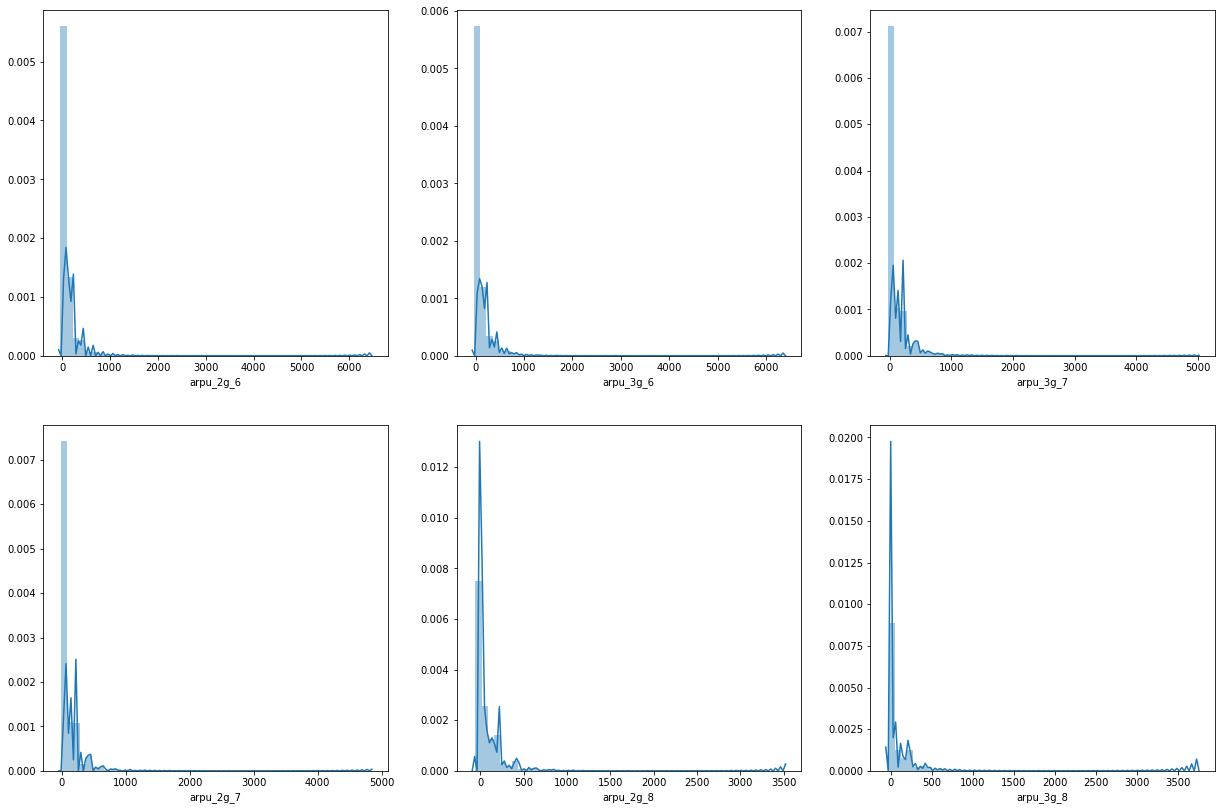

In [49]:
# Visualizing the data for arpu_cols
plt.figure(figsize = (21, 14))
for i,j in enumerate(tel_df.loc[:,arpu_cols]):
    plt.subplot(2,3,i+1)
    distribution_plot(df,j)
plt.show()

#### Since there is a lot of skewness. Also we have the volume based data fro 2g and 3g,  we can drop these columns

In [50]:
tel_df.drop(arpu_cols, inplace = True, axis = 1)

#### Let's check the null values again

In [51]:
# Checking percentage of null values in decreasing order
null_cols = pd.DataFrame(missing_values_more_than_zero(tel_df))

In [52]:
null_cols.head()

,0
total_rech_data_6,74.85
max_rech_data_6,74.85
total_rech_data_7,74.43
max_rech_data_7,74.43
max_rech_data_8,73.66


#### The top column with most missing values is total_rech_data_6 column. Let's gather all total_rech_data related columns in one and check their behaviour 

In [53]:
total_cols = []
for col in null_cols.index: 
    if col[:5]== 'total':
        print(col)
        total_cols.append(col)

total_rech_data_6
total_rech_data_7
total_rech_data_8


#### Let's check data for these columns

In [54]:
tel_df[total_cols]

,total_rech_data_6,total_rech_data_7,total_rech_data_8
0,1.0,1.0,1.0
1,NaN,1.0,2.0
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,1.0,NaN,NaN
...,...,...,...
99994,NaN,NaN,NaN
99995,NaN,NaN,NaN
99996,2.0,NaN,NaN
99997,3.0,2.0,4.0


#### Let's describe the data

In [55]:
tel_df[total_cols].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8
count,25153.000000,25571.000000,26339.000000
mean,2.463802,2.666419,2.651999
std,2.789128,3.031593,3.074987
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000
max,61.000000,54.000000,60.000000


#### Since the minimun value is 1 and the data is missing for rest, we can impute null values with 0.0 considering the recharge was not done for customers

In [56]:
for col in total_cols:
    tel_df[col].fillna(0.0, inplace = True)

#### Checking null values

In [57]:
# Checking percentage of null values in decreasing order
null_cols = pd.DataFrame(missing_values_more_than_zero(tel_df))

In [58]:
null_cols.head()

,0
max_rech_data_6,74.85
max_rech_data_7,74.43
max_rech_data_8,73.66
isd_ic_mou_8,5.38
loc_og_mou_8,5.38


#### The top 4 columns from the above has the maximum missing values, taking these in a variable

In [59]:
max_cols = list(null_cols[:4].index)

#### Let's check data for these columns

In [60]:
tel_df[max_cols]

,max_rech_data_6,max_rech_data_7,max_rech_data_8,isd_ic_mou_8
0,252.0,252.0,252.0,0.0
1,NaN,154.0,25.0,0.0
2,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,0.0
4,56.0,NaN,NaN,0.0
...,...,...,...,...
99994,NaN,NaN,NaN,0.0
99995,NaN,NaN,NaN,0.0
99996,25.0,NaN,NaN,NaN
99997,202.0,179.0,179.0,0.0


#### Let's check the minimum and maximum values for these columns

In [61]:
for i in max_cols:
    print(tel_df[i].describe()[['min','max']])

min       1.0
max    1555.0
Name: max_rech_data_6, dtype: float64
min       1.0
max    1555.0
Name: max_rech_data_7, dtype: float64
min       1.0
max    1555.0
Name: max_rech_data_8, dtype: float64
min       0.00
max    4127.01
Name: isd_ic_mou_8, dtype: float64


#### Again, we can impute the values with 0 considering the customers with missing values did not recharge 

In [62]:
for col in max_cols:
    tel_df[col].fillna(0.0, inplace = True)

#### Checking null values again

In [63]:
# Checking percentage of null values in decreasing order
null_cols = pd.DataFrame(missing_values_more_than_zero(tel_df))

In [64]:
null_cols.head()

,0
ic_others_8,5.38
offnet_mou_8,5.38
std_og_t2t_mou_8,5.38
loc_ic_t2f_mou_8,5.38
std_og_t2f_mou_8,5.38


#### We observe that most of the columns has 'mou' in their name, let's check if there are some columns which do not have 'mou' in their name 

In [65]:
[s for s in list(null_cols.index) if "mou" not in s]

['ic_others_8',
 'og_others_8',
 'ic_others_6',
 'og_others_6',
 'ic_others_7',
 'og_others_7']

#### Let's name this list as others

In [66]:
others = [s for s in list(null_cols.index) if "mou" not in s]

#### Let's check data for these columns

In [67]:
tel_df[others]

,ic_others_8,og_others_8,ic_others_6,og_others_6,ic_others_7,og_others_7
0,0.0,0.0,NaN,NaN,NaN,NaN
1,0.0,0.0,0.00,0.00,0.00,0.0
2,0.0,0.0,0.93,0.45,3.14,0.0
3,0.0,0.0,0.00,0.00,0.00,0.0
4,0.0,0.0,0.48,0.00,0.00,0.0
...,...,...,...,...,...,...
99994,0.0,0.0,0.00,0.00,0.00,0.0
99995,0.0,0.0,0.00,0.00,0.00,0.0
99996,NaN,NaN,0.00,2.41,NaN,NaN
99997,0.0,0.0,0.00,0.00,0.00,0.0


#### Let's describe the data

In [68]:
tel_df[others].describe()

,ic_others_8,og_others_8,ic_others_6,og_others_6,ic_others_7,og_others_7
count,94621.000000,94621.000000,96062.000000,96062.000000,96140.000000,96140.000000
mean,0.970800,0.033372,0.854656,0.454157,1.012960,0.030235
std,13.284348,2.323464,11.955164,4.125911,12.673099,2.161717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2327.510000,394.930000,1362.940000,800.890000,1495.940000,370.130000


#### We observe that the values upto 75th percentile for all of these columns is 0, and max values are very large compared to other values

#### From above , we can impute missing values with 0.0

In [69]:
for col in others:
    tel_df[col].fillna(0.0, inplace = True)

#### Checking null values again

In [70]:
# Checking percentage of null values in decreasing order
null_cols = pd.DataFrame(missing_values_more_than_zero(tel_df))

In [71]:
null_cols.head()

,0
loc_ic_t2m_mou_8,5.38
loc_og_t2f_mou_8,5.38
spl_ic_mou_8,5.38
loc_ic_mou_8,5.38
std_ic_t2f_mou_8,5.38


#### We already imputed values for columns which did not have 'mou' in their names , let's check if all the columns have 'mou' in their name 

In [72]:
[s for s in list(null_cols.index) if "mou" not in s]

[]

#### That means all columns has mou in their names

### Let's further filter based on months and take a look at the data

In [73]:
mou_8 = [i for i in null_cols.index if '_8' in i ]

In [74]:
mou_7 = [i for i in null_cols.index if '_7' in i ]

In [75]:
mou_6 = [i for i in null_cols.index if '_6' in i ]

#### Let's describe data for each slot

#### For 8th month columns

In [76]:
#### Let's check data for these columns
tel_df[mou_8].describe()

,loc_ic_t2m_mou_8,loc_og_t2f_mou_8,spl_ic_mou_8,loc_ic_mou_8,std_ic_t2f_mou_8,loc_ic_t2t_mou_8,offnet_mou_8,isd_og_mou_8,std_ic_t2t_mou_8,loc_og_t2c_mou_8,onnet_mou_8,std_ic_mou_8,loc_og_mou_8,roam_ic_mou_8,std_og_t2t_mou_8,std_og_mou_8,std_og_t2m_mou_8,spl_og_mou_8,loc_ic_t2f_mou_8,std_og_t2f_mou_8,loc_og_t2t_mou_8,std_ic_t2m_mou_8,roam_og_mou_8,loc_og_t2m_mou_8
count,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000
mean,108.460515,3.677991,0.040361,167.432575,2.085004,47.211362,196.574803,0.791247,9.883921,1.433821,133.018098,33.154735,141.328209,7.292981,83.282673,174.191498,89.838390,5.053769,11.751834,1.067792,45.887806,21.183211,9.971890,91.755128
std,169.723759,13.270996,0.146147,250.025523,15.812580,137.239552,327.170662,25.544471,55.073186,6.783335,308.951589,110.127008,245.914311,68.402466,265.486090,411.633049,271.757783,17.855111,39.125379,7.905971,151.184830,83.683565,64.713221,156.537048
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.930000,0.000000,0.000000,32.740000,0.000000,3.280000,31.630000,0.000000,0.000000,0.000000,6.460000,0.010000,17.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000,0.000000,0.000000,9.810000
50%,58.240000,0.000000,0.000000,93.830000,0.000000,16.030000,92.140000,0.000000,0.000000,0.000000,32.360000,5.880000,63.730000,0.000000,0.000000,10.410000,3.310000,0.000000,0.930000,0.000000,11.730000,2.030000,0.000000,40.360000
75%,133.930000,2.040000,0.000000,207.280000,0.000000,46.290000,228.260000,0.000000,4.080000,0.000000,115.860000,27.710000,166.110000,0.000000,30.580000,147.940000,52.490000,3.990000,8.110000,0.000000,40.110000,15.360000,0.000000,109.090000
max,6274.190000,928.490000,16.860000,10830.160000,1394.890000,10696.230000,14007.340000,5681.540000,4309.290000,502.090000,10752.560000,5957.140000,11039.910000,13095.360000,8014.430000,13980.060000,13950.040000,1390.880000,2433.060000,516.910000,10752.560000,5645.860000,5337.040000,4961.330000


#### Since all the columns have same percentage of missing data, let's check if all rows are missing

In [77]:
#### Let's check data for these columns
tel_df[tel_df[mou_8].isnull().all(axis=1)][mou_8]

,loc_ic_t2m_mou_8,loc_og_t2f_mou_8,spl_ic_mou_8,loc_ic_mou_8,std_ic_t2f_mou_8,loc_ic_t2t_mou_8,offnet_mou_8,isd_og_mou_8,std_ic_t2t_mou_8,loc_og_t2c_mou_8,onnet_mou_8,std_ic_mou_8,loc_og_mou_8,roam_ic_mou_8,std_og_t2t_mou_8,std_og_mou_8,std_og_t2m_mou_8,spl_og_mou_8,loc_ic_t2f_mou_8,std_og_t2f_mou_8,loc_og_t2t_mou_8,std_ic_t2m_mou_8,roam_og_mou_8,loc_og_t2m_mou_8
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### The same data is missing for all the rows

#### Since no data is available for these records, we can impute missing values with 0 considering the customers did not take any incoming and outgoing calls for these records

In [78]:
for col in mou_8:
    tel_df[col].fillna(0.0, inplace = True)

#### For 7th month columns

In [79]:
#### Let's check data for these columns
tel_df[mou_7].describe()

,std_og_t2m_mou_7,loc_ic_t2f_mou_7,std_og_t2t_mou_7,loc_ic_t2m_mou_7,spl_ic_mou_7,std_ic_t2f_mou_7,spl_og_mou_7,std_og_t2f_mou_7,std_ic_mou_7,std_og_mou_7,roam_og_mou_7,isd_ic_mou_7,loc_og_mou_7,loc_og_t2m_mou_7,std_ic_t2m_mou_7,roam_ic_mou_7,loc_ic_mou_7,loc_ic_t2t_mou_7,offnet_mou_7,loc_og_t2c_mou_7,isd_og_mou_7,loc_og_t2f_mou_7,onnet_mou_7,loc_og_t2t_mou_7,std_ic_t2t_mou_7
count,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000
mean,90.804137,12.599697,83.299598,107.120493,0.033585,2.216923,4.978279,1.115010,33.887833,175.221436,9.818732,8.334936,141.670476,91.397131,21.656415,7.149898,167.719540,47.990520,197.045133,1.368500,0.776572,3.792985,133.670805,46.473010,10.011904
std,269.347911,42.977442,263.631042,169.423620,0.155725,16.454061,20.661570,8.599406,113.720168,408.922934,58.455762,65.219829,248.731086,157.492308,86.521393,73.447948,256.242707,145.795055,325.862803,7.533445,25.603052,14.264986,308.794148,155.318705,57.411971
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,18.590000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.480000,10.025000,0.000000,0.000000,32.460000,3.230000,32.190000,0.000000,0.000000,0.000000,6.660000,1.630000,0.000000
50%,3.635000,0.930000,0.000000,57.080000,0.000000,0.000000,0.000000,0.000000,5.960000,11.090000,0.000000,0.000000,63.685000,40.430000,2.040000,0.000000,92.550000,15.740000,91.735000,0.000000,0.000000,0.000000,32.330000,11.610000,0.000000
75%,54.040000,8.282500,31.132500,130.960000,0.000000,0.000000,3.710000,0.000000,28.310000,150.615000,0.000000,0.000000,164.382500,107.560000,15.740000,0.000000,205.837500,45.810000,226.815000,0.000000,0.000000,2.090000,115.595000,39.910000,4.230000
max,9284.740000,1983.010000,8133.660000,4455.830000,21.330000,1136.080000,2372.510000,544.630000,6745.760000,10936.730000,2812.040000,5289.540000,7674.780000,4557.140000,6141.880000,15371.040000,9669.910000,9324.660000,9667.130000,916.240000,5490.280000,1196.430000,8157.780000,7400.660000,5800.930000


#### Since all the columns have same percentage of missing data, let's check if all rows are missing

In [80]:
#### Let's check data for these columns
tel_df[tel_df[mou_7].isnull().all(axis=1)][mou_7]

,std_og_t2m_mou_7,loc_ic_t2f_mou_7,std_og_t2t_mou_7,loc_ic_t2m_mou_7,spl_ic_mou_7,std_ic_t2f_mou_7,spl_og_mou_7,std_og_t2f_mou_7,std_ic_mou_7,std_og_mou_7,roam_og_mou_7,isd_ic_mou_7,loc_og_mou_7,loc_og_t2m_mou_7,std_ic_t2m_mou_7,roam_ic_mou_7,loc_ic_mou_7,loc_ic_t2t_mou_7,offnet_mou_7,loc_og_t2c_mou_7,isd_og_mou_7,loc_og_t2f_mou_7,onnet_mou_7,loc_og_t2t_mou_7,std_ic_t2t_mou_7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### The same data is missing for all the rows

#### Since no data is available for these records, we can impute missing values with 0 considering the customers did not take any incoming and outgoing calls for these records

In [81]:
for col in mou_7:
    tel_df[col].fillna(0.0, inplace = True)

#### For 6th month columns

In [82]:
#### Let's check data for these columns
tel_df[mou_6].describe()

,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,loc_ic_t2f_mou_6,spl_og_mou_6,spl_ic_mou_6,isd_ic_mou_6,roam_og_mou_6,roam_ic_mou_6,onnet_mou_6,isd_og_mou_6,offnet_mou_6,loc_ic_mou_6,loc_og_t2f_mou_6,loc_og_mou_6,std_og_t2t_mou_6,loc_og_t2c_mou_6,loc_og_t2m_mou_6,loc_ic_t2m_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_ic_t2t_mou_6,std_og_mou_6,loc_ic_t2t_mou_6,loc_og_t2t_mou_6
count,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000
mean,20.722240,2.156397,32.457179,12.084305,3.916811,0.061557,7.460608,13.911337,9.950013,132.395875,0.798277,197.935577,167.491059,3.751013,144.201175,79.829870,1.123056,93.342088,107.475650,87.299624,1.129011,9.575993,168.261218,47.922365,47.100763
std,80.793414,16.495594,106.283386,40.140895,14.936449,0.160920,59.722948,71.443196,72.825411,297.207406,25.765248,316.851613,254.124029,14.230438,251.751489,252.476533,5.448946,162.780544,171.713903,255.617850,7.984970,54.330607,389.948499,140.258485,150.856393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.380000,0.000000,34.730000,30.390000,0.000000,17.110000,0.000000,0.000000,9.880000,17.290000,0.000000,0.000000,0.000000,0.000000,2.990000,1.660000
50%,2.030000,0.000000,5.890000,0.880000,0.000000,0.000000,0.000000,0.000000,0.000000,34.310000,0.000000,96.310000,92.160000,0.000000,65.110000,0.000000,0.000000,41.030000,56.490000,3.950000,0.000000,0.000000,11.640000,15.690000,11.910000
75%,15.030000,0.000000,26.930000,8.140000,2.430000,0.000000,0.000000,0.000000,0.000000,118.740000,0.000000,231.860000,208.075000,2.080000,168.270000,30.807500,0.000000,110.390000,132.387500,53.290000,0.000000,4.060000,144.837500,46.840000,40.960000
max,5647.160000,1351.110000,5712.110000,1872.340000,1023.210000,19.760000,6789.410000,3775.110000,13724.380000,7376.710000,5900.660000,8362.360000,7454.630000,1466.030000,10643.380000,7366.580000,342.860000,4729.740000,4693.860000,8314.760000,628.560000,5459.560000,8432.990000,6626.930000,6431.330000


#### Since all the columns have same percentage of missing data, let's check if all rows are missing

In [83]:
#### Let's check data for these columns
tel_df[tel_df[mou_6].isnull().all(axis=1)][mou_6]

,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,loc_ic_t2f_mou_6,spl_og_mou_6,spl_ic_mou_6,isd_ic_mou_6,roam_og_mou_6,roam_ic_mou_6,onnet_mou_6,isd_og_mou_6,offnet_mou_6,loc_ic_mou_6,loc_og_t2f_mou_6,loc_og_mou_6,std_og_t2t_mou_6,loc_og_t2c_mou_6,loc_og_t2m_mou_6,loc_ic_t2m_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_ic_t2t_mou_6,std_og_mou_6,loc_ic_t2t_mou_6,loc_og_t2t_mou_6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### The same data is missing for all the rows

#### Since no data is available for these records, we can impute missing values with 0 considering the customers did not take any incoming and outgoing calls for these records

In [84]:
for col in mou_6:
    tel_df[col].fillna(0.0, inplace = True)

#### Checking missing values again, now we should not get any missing values in tel_df as we have taken care of all missing values

In [85]:
missing_values_more_than_zero(tel_df)

Series([], dtype: float64)

#### Now, we have handled the missing values

#### Let's check the shape of the data

In [86]:
tel_df.shape

(99999, 145)

#### We are left with 145 columns

### 2.3 Deriving New features

#### We have columns like total_rech_amt_6 total_rech_amt_7 etc which contains records for recharge used for voice calling. The data looks like this


In [87]:
tel_df.loc[:,['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']]

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
0,362,252,252
1,74,384,283
2,168,315,116
3,230,310,601
4,196,350,287
...,...,...,...
99994,60,110,0
99995,110,110,182
99996,119,0,0
99997,381,358,716


#### The above records gives us the total amount of recharge done by the customer for each month

#### But we do not have the same thing for data recharge columns. Here we have columns like __total_rech_data_6__ and __av_rech_amt_data_6__ etc. These columns look like this

In [88]:
tel_df.loc[:,['total_rech_data_6','av_rech_amt_data_6','total_rech_data_7','av_rech_amt_data_7']]

,total_rech_data_6,av_rech_amt_data_6,total_rech_data_7,av_rech_amt_data_7
0,1.0,252.0,1.0,252.0
1,0.0,0.0,1.0,154.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,1.0,56.0,0.0,0.0
...,...,...,...,...
99994,0.0,0.0,0.0,0.0
99995,0.0,0.0,0.0,0.0
99996,2.0,39.0,0.0,0.0
99997,3.0,583.0,2.0,358.0


#### Here the first column shows the number of times customer did a recharge in the month, while second column shows the average amount of recharge done for data

#### 2.3.1: We can create new feature as __total_rech_amt_data__ using __total_rech_data__ and __av_rech_amt_data__ to capture the total amount of recharge done by customer for data.

In [89]:
tel_df['total_data_rech_amt_6'] = tel_df.av_rech_amt_data_6 * tel_df.total_rech_data_6
tel_df['total_data_rech_amt_7'] = tel_df.av_rech_amt_data_7 * tel_df.total_rech_data_7
tel_df['total_data_rech_amt_8'] = tel_df.av_rech_amt_data_8 * tel_df.total_rech_data_8

#### We are given that the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

#### 2.3.2: We can take the records for 6th and 7th month together and keep their average in a new column. we will name it __avg_rech_amt_6_7__

#### For that we will use __total_rech_amt_6__, __total_rech_amt_7__, __total_data_rech_amt_6__ and __total_data_rech_amt_7__ columns

In [90]:
tel_df['avg_rech_amt_6_7']= (tel_df.total_data_rech_amt_6 + tel_df.total_rech_amt_6 + tel_df.total_data_rech_amt_7 + tel_df.total_rech_amt_7)/2

In [91]:
tel_df['avg_rech_amt_6_7'].head()

0    559.0
1    306.0
2    241.5
3    270.0
4    301.0
Name: avg_rech_amt_6_7, dtype: float64

### 2.4: Filtering high value customers

#### We need to predict churn only for the high-value customers. Define high-value customers as follows: 

#### Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

#### We will try to find out X

#### We have __avg_rech_amt_6_7__ as the average recharge amount for good phase. We will calculate the 70th percentile of this value and assign as X

In [92]:
## Assinging 70th percentile of average recharge amount of good phase to X
X = tel_df.avg_rech_amt_6_7.quantile(0.7)

#### Checking X

In [93]:
X

478.0

#### Checking records which are more than X

In [94]:
tel_df[tel_df.avg_rech_amt_6_7 >= X]

,aon,arpu_6,arpu_7,arpu_8,aug_vbc_3g,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,ic_others_6,ic_others_7,ic_others_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,jul_vbc_3g,jun_vbc_3g,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_t2c_mou_6,...,spl_og_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,avg_rech_amt_6_7
0,968,197.385,214.816,213.803,30.40,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,2014-06-21,2014-07-16,2014-08-08,2014-06-21,2014-07-16,2014-08-08,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,101.20,252,252,252,0.00,0.00,5.44,0.00,0.00,1.15,0.00,0.00,4.13,0.00,0.00,0.16,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,362,252,252,1.0,1.0,1.0,4,3,2,30.13,1.32,5.75,83.57,150.76,109.61,252.0,252.0,252.0,559.0
7,802,1069.180,1349.850,3171.480,57.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014-06-27,2014-07-25,2014-08-26,2014-06-01,2014-07-01,2014-08-01,15.74,15.19,15.14,2.06,14.53,31.59,0.0,0.18,10.01,19.38,18.74,0,0,779,427.88,355.23,188.04,152.16,101.46,39.53,217.56,221.49,121.19,58.14,32.26,27.31,422.16,533.91,255.79,0.00,...,6.50,180.54,173.08,193.94,52.19,34.24,22.21,91.44,126.99,141.33,36.89,11.83,30.39,60.86,75.14,77.84,6.66,20.08,16.68,49.89,31.76,49.14,4.30,23.29,12.01,626.46,558.04,428.74,487.53,609.24,350.16,1580,790,3638,0.0,0.0,0.0,5,5,7,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1185.0
8,315,378.721,492.223,137.362,21.03,0.0,177.0,69.0,0.0,2.0,3.0,0.0,0.0,0.0,2014-06-25,2014-07-31,2014-08-30,2014-06-01,2014-07-31,2014-08-23,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,910.65,122.16,50,0,10,81.43,23.83,15.79,0.00,0.00,0.00,57.58,13.98,15.48,23.84,9.84,0.31,378.09,288.18,63.04,0.00,...,10.23,22.43,4.66,0.75,0.00,0.00,0.00,22.43,4.08,0.65,0.00,0.58,0.10,130.26,143.48,98.28,0.00,0.00,0.00,13.69,10.04,75.69,116.56,133.43,22.58,103.86,28.49,16.54,508.36,431.66,171.56,437,601,120,0.0,2.0,3.0,19,21,14,0.00,356.00,0.03,0.00,750.95,11.94,0.0,354.0,207.0,696.0
21,720,514.453,597.753,637.760,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-06-01,2014-07-01,2014-08-01,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,30,20,50,125.33,87.68,159.11,4.61,2.84,10.39,118.23,74.63,129.16,2.48,10.19,19.54,97.04,94.09,129.74,0.00,...,0.00,81.76,44.21,101.93,0.00,0.00,0.00,67.69,38.23,101.74,14.06,5.98,0.18,763.29,934.69,938.79,0.00,0.00,0.00,665.36,808.74,876.99,97.93,125.94,61.79,207.09,131.89,261.04,860.34,1028.79,1068.54,600,680,718,0.0,0.0,0.0,22,26,27,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,640.0
23,604,74.350,193.897,366.966,40.45,0.0,356.0,270.0,0.0,0.0,0.0,0.0,2.0,2.0,2014-06-18,2014-07-07,2014-08-24,2014-06-01,2014-07-07,2014-08-06,0.

#### We will assign the above dataframe to a new variable

In [95]:
df_high_value_cust = tel_df[tel_df.avg_rech_amt_6_7 >= X]

#### We have successfully filtered the high value customers. Now, we have 30,001 high value customers and the number of columns is 149

### 2.5: Tagging churners and removing attributes of the churn phase

#### We need to tag the churned customers (churn=1, else 0) based on the fourth month as follows: 
#### Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 
#### The attributes needed to use to tag churners are:

- total_ic_mou_9

- total_og_mou_9

- vol_2g_mb_9

- vol_3g_mb_9

#### Since, we already filterd the columns having records for Sep, we will use those here.

#### Since we are interested in churn inly for High Value Customers. We will merge these 4 columns with high value customers data

In [96]:
df[sep_cols]

,last_date_of_month_9,arpu_9,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,total_og_mou_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,total_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9,last_day_rch_amt_9,date_of_last_rech_data_9,total_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9,vol_2g_mb_9,vol_3g_mb_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,monthly_2g_9,sachet_2g_9,monthly_3g_9,sachet_3g_9,fb_user_9,sep_vbc_3g
0,9/30/2014,21.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,6,0,0,9/28/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,3.58
1,9/30/2014,86.285,18.34,53.76,0.00,0.00,18.34,53.76,0.00,0.00,72.11,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,72.11,116.09,56.93,0.00,173.03,0.00,15.01,0.00,0.0,15.01,188.04,0.00,0.00,0.00,5,121,50,9/30/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00
2,9/30/2014,290.714,74.81,118.91,38.49,70.94,14.39,28.16,22.24,0.48,64.81,8.76,9.28,0.0,0.0,18.04,0.0,42.08,0.0,124.94,148.23,38.98,158.19,345.41,49.44,118.18,3.86,0.0,171.49,517.74,0.45,0.01,0.36,7,358,100,9/29/2014,0,9/17/2014,1.0,46.0,1.0,0.0,46.0,0.00,8.42,2.84,0.00,0.0,0,1,0,0,1.0,0.00
3,9/30/2014,389.500,241.71,113.54,0.00,0.00,15.49,65.46,2.06,0.00,83.03,226.21,9.99,0.0,0.0,236.21,0.0,43.29,0.0,362.54,41.73,52.86,65.59,160.19,129.84,13.98,0.00,0.0,143.83,305.38,0.55,0.00,0.80,14,410,50,9/30/2014,30,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00
4,9/30/2014,163.426,58.78,45.81,0.00,0.00,58.78,37.89,1.93,0.00,98.61,0.00,0.00,0.0,0.0,0.00,0.0,5.98,0.0,104.59,154.56,48.24,0.00,202.81,2.31,0.00,0.00,0.0,2.31,205.31,0.18,0.00,0.00,4,200,50,9/28/2014,50,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,9/30/2014,29.950,0.00,27.14,0.00,0.00,0.00,24.78,2.25,0.11,27.03,0.00,0.00,0.0,0.0,0.00,0.0,0.11,0.0,27.14,22.06,82.89,49.46,154.43,0.00,0.00,0.00,0.0,0.00,154.43,0.00,0.00,0.00,2,50,50,9/25/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00
99995,9/30/2014,140.835,49.49,56.13,0.95,4.23,49.49,46.71,3.28,0.00,99.49,0.00,1.90,0.0,0.0,1.90,0.0,5.01,0.0,106.41,25.71,63.44,18.44,107.61,0.00,1.23,0.00,0.0,1.23,108.84,0.00,0.00,0.00,1,30,30,9/26/2014,30,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00
99996,9/30/2014,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,1,0,0,9/2/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00
99997,9/30/2014,731.010,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,2.21,0.00,2.21,0.00,0.00,0.00,0.0,0.00,2.21,0.00,0.00,0.00,6,862,252,9/17/2014,179,9/17/2014,4.0,252.0,0.0,4.0,862.0,85.67,4177.14,725.69,725.68,0.0,0,0,4,0,1.0,0.00


#### Let's take this in a dataframe and name it as sep_data

In [97]:
sep_data = df[sep_cols]

#### Since we only need total_ic_mou_9, total_og_mou_9, vol_2g_mb_9 and vol_3g_mb_9 to tag churners. We will take a look at only these columns

In [98]:
tag_columns = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

In [99]:
churn_data = sep_data.loc[:,tag_columns]

#### Let's take a look at info

In [100]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  99999 non-null  float64
 1   total_og_mou_9  99999 non-null  float64
 2   vol_2g_mb_9     99999 non-null  float64
 3   vol_3g_mb_9     99999 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


#### The info suggests that there is no missing values for these columns as all the 99999 rows are non-null

#### We will merge the churn_data with high value customers columns and then tag the churners

In [101]:
df_high_value_cust = df_high_value_cust.merge(churn_data, left_index = True, right_index = True)

#### Looking at the top 5 records

In [102]:
df_high_value_cust.head()

,aon,arpu_6,arpu_7,arpu_8,aug_vbc_3g,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,ic_others_6,ic_others_7,ic_others_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,jul_vbc_3g,jun_vbc_3g,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_t2c_mou_6,...,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,avg_rech_amt_6_7,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,968,197.385,214.816,213.803,30.40,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,2014-06-21,2014-07-16,2014-08-08,2014-06-21,2014-07-16,2014-08-08,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,101.20,252,252,252,0.00,0.00,5.44,0.00,0.00,1.15,0.00,0.00,4.13,0.00,0.00,0.16,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,362,252,252,1.0,1.0,1.0,4,3,2,30.13,1.32,5.75,83.57,150.76,109.61,252.0,252.0,252.0,559.0,0.00,0.00,0.00,0.00
7,802,1069.180,1349.850,3171.480,57.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014-06-27,2014-07-25,2014-08-26,2014-06-01,2014-07-01,2014-08-01,15.74,15.19,15.14,2.06,14.53,31.59,0.0,0.18,10.01,19.38,18.74,0,0,779,427.88,355.23,188.04,152.16,101.46,39.53,217.56,221.49,121.19,58.14,32.26,27.31,422.16,533.91,255.79,0.0,...,52.19,34.24,22.21,91.44,126.99,141.33,36.89,11.83,30.39,60.86,75.14,77.84,6.66,20.08,16.68,49.89,31.76,49.14,4.30,23.29,12.01,626.46,558.04,428.74,487.53,609.24,350.16,1580,790,3638,0.0,0.0,0.0,5,5,7,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1185.0,0.00,0.00,0.00,0.00
8,315,378.721,492.223,137.362,21.03,0.0,177.0,69.0,0.0,2.0,3.0,0.0,0.0,0.0,2014-06-25,2014-07-31,2014-08-30,2014-06-01,2014-07-31,2014-08-23,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,910.65,122.16,50,0,10,81.43,23.83,15.79,0.00,0.00,0.00,57.58,13.98,15.48,23.84,9.84,0.31,378.09,288.18,63.04,0.0,...,0.00,0.00,0.00,22.43,4.08,0.65,0.00,0.58,0.10,130.26,143.48,98.28,0.00,0.00,0.00,13.69,10.04,75.69,116.56,133.43,22.58,103.86,28.49,16.54,508.36,431.66,171.56,437,601,120,0.0,2.0,3.0,19,21,14,0.00,356.00,0.03,0.00,750.95,11.94,0.0,354.0,207.0,696.0,34.91,142.18,0.00,0.00
21,720,514.453,597.753,637.760,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-06-01,2014-07-01,2014-08-01,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,30,20,50,125.33,87.68,159.11,4.61,2.84,10.39,118.23,74.63,129.16,2.48,10.19,19.54,97.04,94.09,129.74,0.0,...,0.00,0.00,0.00,67.69,38.23,101.74,14.06,5.98,0.18,763.29,934.69,938.79,0.00,0.00,0.00,665.36,808.74,876.99,97.93,125.94,61.79,207.09,131.89,261.04,860.34,1028.79,1068.54,600,680,718,0.0,0.0,0.0,22,26,27,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,640.0,252.61,1031.53,0.00,0.00
23,604,74.350,193.897,366.966,40.45,0.0,356.0,270.0,0.0,0.0,0.0,0.0,2.0,2.0,2014-06-18,2014-07-07,2014-08-24,2014-06-01,2014-07-07,2014-08-06,0.00,5.3

#### Creating a function to check if value is 0

In [103]:
zero_check = (df_high_value_cust.total_ic_mou_9 == 0) & (df_high_value_cust.total_og_mou_9 == 0) & (df_high_value_cust.vol_2g_mb_9 == 0) & (df_high_value_cust.vol_3g_mb_9 == 0)

#### Assigning the rows as 1 if zero_check is True otherwise assign 0. We will create a new column named churn

#### First we will assign it to 0 for all and then replace with 1 based on the zero_check condition

In [104]:
df_high_value_cust['churn'] = 0
# Assigning 1 based on condition
df_high_value_cust.loc[zero_check,'churn'] = 1

#### Checking the data for churn only

In [105]:
df_high_value_cust['churn']

0        1
7        1
8        0
21       0
23       0
        ..
99981    0
99984    0
99986    0
99988    0
99997    0
Name: churn, Length: 30001, dtype: int64

#### Since, we merged tag related columns with high value customers to tag churnens, we will drop the tag based columns which we have stored in tag_columns

In [106]:
df_high_value_cust.drop(tag_columns, inplace = True, axis = 1)

#### Let's check the shape of the data

In [107]:
df_high_value_cust.shape

(30001, 150)

#### The number of columns are now 150 as we have added the churn column

#### Let's check what percent of customers have churned

In [108]:
round(100*df_high_value_cust.churn.sum()/len(df_high_value_cust),2)

8.14

#### 8.14% customers have churned

In [109]:
# df_high_value_cust.to_csv('churn_data.csv')

## Step 3: Variable Grouping

#### We will make several groups before performing  any further steps

#### Let's take a look at the data before starting

In [110]:
df_high_value_cust.head()

,aon,arpu_6,arpu_7,arpu_8,aug_vbc_3g,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,ic_others_6,ic_others_7,ic_others_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,jul_vbc_3g,jun_vbc_3g,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_t2c_mou_6,...,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,avg_rech_amt_6_7,churn
0,968,197.385,214.816,213.803,30.40,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,2014-06-21,2014-07-16,2014-08-08,2014-06-21,2014-07-16,2014-08-08,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,101.20,252,252,252,0.00,0.00,5.44,0.00,0.00,1.15,0.00,0.00,4.13,0.00,0.00,0.16,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,362,252,252,1.0,1.0,1.0,4,3,2,30.13,1.32,5.75,83.57,150.76,109.61,252.0,252.0,252.0,559.0,1
7,802,1069.180,1349.850,3171.480,57.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014-06-27,2014-07-25,2014-08-26,2014-06-01,2014-07-01,2014-08-01,15.74,15.19,15.14,2.06,14.53,31.59,0.0,0.18,10.01,19.38,18.74,0,0,779,427.88,355.23,188.04,152.16,101.46,39.53,217.56,221.49,121.19,58.14,32.26,27.31,422.16,533.91,255.79,0.0,...,180.54,173.08,193.94,52.19,34.24,22.21,91.44,126.99,141.33,36.89,11.83,30.39,60.86,75.14,77.84,6.66,20.08,16.68,49.89,31.76,49.14,4.30,23.29,12.01,626.46,558.04,428.74,487.53,609.24,350.16,1580,790,3638,0.0,0.0,0.0,5,5,7,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1185.0,1
8,315,378.721,492.223,137.362,21.03,0.0,177.0,69.0,0.0,2.0,3.0,0.0,0.0,0.0,2014-06-25,2014-07-31,2014-08-30,2014-06-01,2014-07-31,2014-08-23,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,910.65,122.16,50,0,10,81.43,23.83,15.79,0.00,0.00,0.00,57.58,13.98,15.48,23.84,9.84,0.31,378.09,288.18,63.04,0.0,...,22.43,4.66,0.75,0.00,0.00,0.00,22.43,4.08,0.65,0.00,0.58,0.10,130.26,143.48,98.28,0.00,0.00,0.00,13.69,10.04,75.69,116.56,133.43,22.58,103.86,28.49,16.54,508.36,431.66,171.56,437,601,120,0.0,2.0,3.0,19,21,14,0.00,356.00,0.03,0.00,750.95,11.94,0.0,354.0,207.0,696.0,0
21,720,514.453,597.753,637.760,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-06-01,2014-07-01,2014-08-01,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,30,20,50,125.33,87.68,159.11,4.61,2.84,10.39,118.23,74.63,129.16,2.48,10.19,19.54,97.04,94.09,129.74,0.0,...,81.76,44.21,101.93,0.00,0.00,0.00,67.69,38.23,101.74,14.06,5.98,0.18,763.29,934.69,938.79,0.00,0.00,0.00,665.36,808.74,876.99,97.93,125.94,61.79,207.09,131.89,261.04,860.34,1028.79,1068.54,600,680,718,0.0,0.0,0.0,22,26,27,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,640.0,0
23,604,74.350,193.897,366.966,40.45,0.0,356.0,270.0,0.0,0.0,0.0,0.0,2.0,2.0,2014-06-18,2014-07-07,2014-08-24,2014-06-01,2014-07-07,2014-08-06,0.00,5.35,13.06,0.00,28.23

#### Now, we will filter similar kind of columns together and keep those in different variables

#### Taking arpu related cols

In [111]:
arpu = [i for i in df_high_value_cust.columns if 'arpu' in i]
arpu

['arpu_6', 'arpu_7', 'arpu_8']

#### Taking vbc related cols

In [112]:
vbc = [i for i in df_high_value_cust.columns if 'vbc' in i]
vbc

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']

#### Taking recharge amount related cols

In [113]:
rech_amt = [i for i in df_high_value_cust.columns if 'rech_amt' in i]
rech_amt

['av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_data_rech_amt_6',
 'total_data_rech_amt_7',
 'total_data_rech_amt_8',
 'avg_rech_amt_6_7']

#### Taking total recharge data and num related cols

In [114]:
total_rech_data_num = [i for i in df_high_value_cust.columns if 'total_rech_data' in i or 'total_rech_num' in i]
total_rech_data_num

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8']

#### Taking count related cols

In [115]:
count = [i for i in df_high_value_cust.columns if 'count' in i]
count

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8']

#### Taking max recharge related cols

In [116]:
max_rech_data = [i for i in df_high_value_cust.columns if 'max_rech_data' in i]
max_rech_data

['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']

#### Taking date related cols

In [117]:
date = [i for i in df_high_value_cust.columns if 'date' in i]
date

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

#### Taking day related cols

In [118]:
day = [i for i in df_high_value_cust.columns if 'day' in i]
day

['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']

#### Taking month related cols

In [119]:
monthly = [i for i in df_high_value_cust.columns if 'monthly' in i]
monthly

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

#### Taking incoming calls related cols

In [120]:
ic = [i for i in df_high_value_cust.columns if 'ic' in i]

In [121]:
len(ic)

39

#### Taking outgoing calls related cols

In [122]:
og = [i for i in df_high_value_cust.columns if 'og' in i]

In [123]:
len(og)

42

#### Taking volume related cols

In [124]:
vol = [i for i in df_high_value_cust.columns if 'vol' in i]
vol

['vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8']

#### Taking offnet related cols

In [125]:
offnet = [i for i in df_high_value_cust.columns if 'offnet' in i]
offnet

['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']

#### Taking onnet related cols

In [126]:
onnet = [i for i in df_high_value_cust.columns if 'onnet' in i]
onnet

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']

#### Taking sachet related cols

In [127]:
sachet = [i for i in df_high_value_cust.columns if 'sachet' in i]
sachet

['sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8']

#### Let's check if we have taken all types of columns in consideration. We will add the number of the columns that we have grouped

In [128]:
len(arpu) + len(vbc) + len(rech_amt) + len(total_rech_data_num) + len(count) + len(max_rech_data) + len(date) + len(day) + len(monthly) \
+ len(ic) + len(og) + len(vol) + len(offnet) + len(onnet) + len(sachet)

148

#### Let's check which columns are left

In [129]:
df_high_value_cust.columns.difference(arpu).difference(vbc).difference(rech_amt).difference(total_rech_data_num).difference(count).difference(max_rech_data).difference(date).difference(day)\
.difference(monthly).difference(ic).difference(og).difference(vol).difference(offnet).difference(onnet).difference(sachet)

Index(['aon', 'churn'], dtype='object')

#### We have grouped the columns, and only aon and churn columns are left. Where churn is the dependent variable and aon is the age on network 

#### Let's start outlier analysis for these columns

## Step 3: Outlier Analysis

#### Let's start with __aon__

In [130]:
df_high_value_cust['aon'].head()

0     968
7     802
8     315
21    720
23    604
Name: aon, dtype: int64

#### Since the aon is the time the customer has spent on the network, in days. We can create a new  column keeping this data as year

In [131]:
df_high_value_cust['aon_yr'] = round(df_high_value_cust['aon']/365,1)

#### We can drop aon aas it may cause correlation problem

In [132]:
df_high_value_cust.drop('aon', inplace = True, axis = 1)

#### Let's check outliers in __aon_yr__

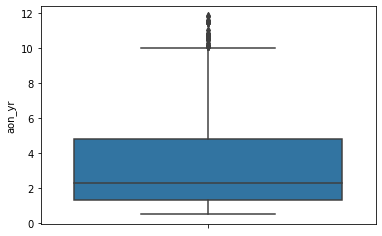

In [133]:
sns.boxplot(df_high_value_cust.aon_yr, orient = 'v')
plt.show()

In [134]:
df_high_value_cust.aon_yr.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

count    30001.000000
mean         3.313053
std          2.623980
min          0.500000
1%           0.500000
5%           0.600000
25%          1.300000
50%          2.300000
75%          4.800000
95%          8.600000
99%         10.000000
max         11.800000
Name: aon_yr, dtype: float64

#### Since we will need to detect and remove outliers, let's cerate a function that will check the outliers and cap the values at nthe percentile, we will give the value of n

In [135]:
### Function to get boundries for outlier treatment
def outliers_treatment(data, column, n):
    p_25 = np.percentile(data[column],25)
    p_75 = np.percentile(data[column],75)

    ## Inter-quartile range
    iqr = p_75 - p_25

    l_limit = round(p_25 - 1.5 * iqr)
    u_limit = round(p_75 + 1.5 * iqr)
    
    ### Check how many data points are below the lower fence and above the upper fence
    
    ## Checking below the lower fence values
    low_count = data[data[column] <= l_limit][column].count()
    ## Checking above the upper fence values
    high_count = data[data[column] >= u_limit][column].count()
    
    if low_count > 0:
        # Taking the 5th percentile in a variable
        per_5_col = round(data[column].quantile((n)/100))
        ### Assigning nan to outlier values
        data.loc[data[column] <= l_limit, column] = np.nan
        # Replacing above avalues with 5th percentile
        data[column].fillna(per_5_col,inplace=True)
    
    if high_count > 0:
        # Taking the 95th percentile in a variable
        per_95_col = round(data[column].quantile((100-n)/100))
        ### Assigning nan to outlier values
        data.loc[data[column] >= u_limit, column] = np.nan
        # Replacing above values with 95th percentile
        data[column].fillna(per_95_col,inplace=True)
    
    return None

#### Let's use the above function on __aon_yr__

In [136]:
outliers_treatment(df_high_value_cust, 'aon_yr',1)

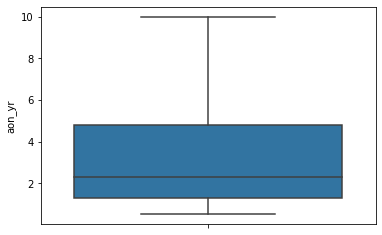

In [137]:
sns.boxplot(df_high_value_cust.aon_yr, orient = 'v')
plt.show()

#### We have handled outliers in 'aon_yr' column

#### Let's take the __arpu__ related columns

In [138]:
df_high_value_cust[arpu].head()

,arpu_6,arpu_7,arpu_8
0,197.385,214.816,213.803
7,1069.180,1349.850,3171.480
8,378.721,492.223,137.362
21,514.453,597.753,637.760
23,74.350,193.897,366.966


#### Let's describe the data

In [139]:
df_high_value_cust[arpu].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

,arpu_6,arpu_7,arpu_8
count,30001.000000,30001.000000,30001.000000
mean,558.490824,560.782203,508.597957
std,460.640461,479.776947,501.961981
min,-2258.709000,-2014.045000,-945.808000
1%,1.000000,0.700000,0.000000
5%,112.510000,114.273000,9.550000
25%,309.865000,309.826000,231.473000
50%,481.694000,480.943000,427.585000
75%,699.943000,698.315000,661.491000
95%,1240.964000,1261.272000,1255.019000


#### We will create two functions to visualize the data, one will be distribution plot and other would be box plot

#### Function to draw box plot for outlier detection

In [140]:
## Function to draw boxplot
def outliers_plot(data,col):
    ## Drawing the boxplot
    sns.boxplot(data[col])

#### Visualizing the data for arpu columns

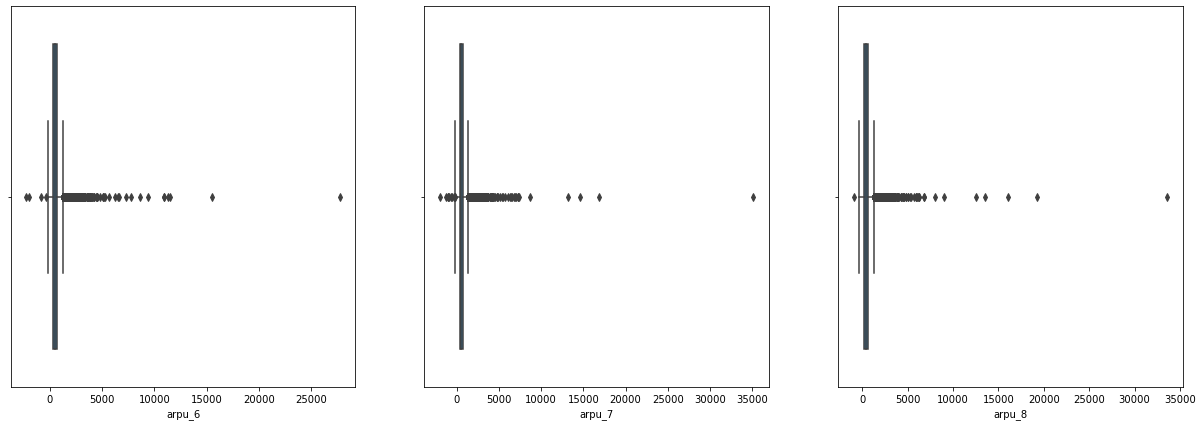

In [141]:
# Visualizing the data for arpu columns
plt.figure(figsize = (21, 7))
for i,j in enumerate(df_high_value_cust.loc[:,arpu]):
    plt.subplot(1,3,i+1)
    outliers_plot(df_high_value_cust,j)
plt.show()

#### From the box plot, there are many outliers and some values are less than 0 as well. We will apply outlier treatment

In [142]:
for col in arpu:
    outliers_treatment(df_high_value_cust, col,1)

#### Let's take the __vbc__ related columns

In [143]:
df_high_value_cust[vbc].head()

,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,30.40,0.00,101.20
7,57.74,19.38,18.74
8,21.03,910.65,122.16
21,0.00,0.00,0.00
23,40.45,51.86,0.00


#### Let's describe the data

In [144]:
df_high_value_cust[vbc].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30001.000000,30001.000000,30001.000000
mean,169.138860,178.872765,158.523962
std,420.974354,443.544138,416.734860
min,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,128.800000,137.290000,98.440000
95%,938.560000,984.930000,885.240000


#### The values upto 50th percentile are 0, that means data is highly skewed

#### Visualizing the data for vbc columns

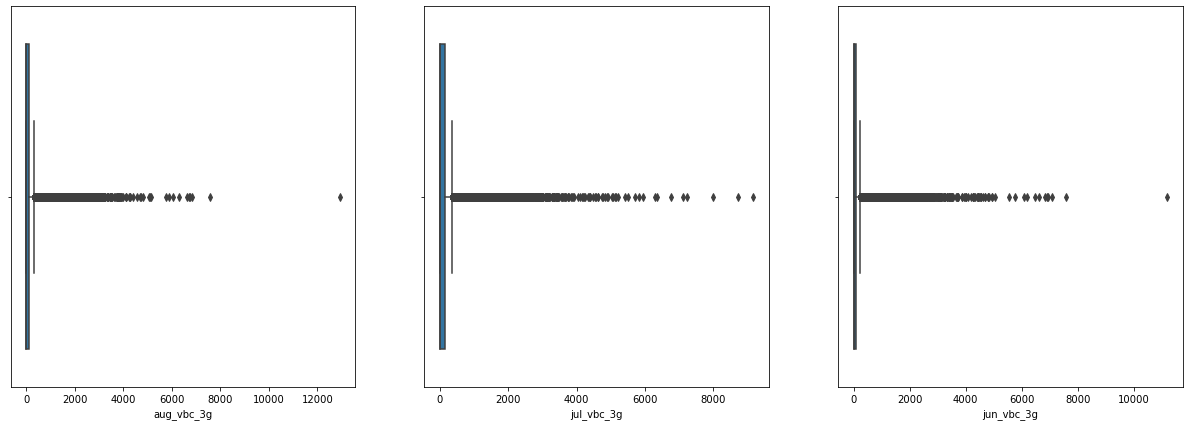

In [145]:
# Visualizing the data for first group
plt.figure(figsize = (21, 7))
for i,j in enumerate(df_high_value_cust.loc[:,vbc]):
    plt.subplot(1,3,i+1)
    outliers_plot(df_high_value_cust,j)
plt.show()

#### From the distribution, we can clearly see the outliers. Let's do the treatment

#### Let's take the __rech_amt__ related columns

In [146]:
df_high_value_cust[rech_amt].head()

,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,avg_rech_amt_6_7
0,252.0,252.0,252.0,252,252,252,362,252,252,252.0,252.0,252.0,559.0
7,0.0,0.0,0.0,1580,790,1580,1580,790,3638,0.0,0.0,0.0,1185.0
8,0.0,177.0,69.0,90,154,30,437,601,120,0.0,354.0,207.0,696.0
21,0.0,0.0,0.0,50,50,50,600,680,718,0.0,0.0,0.0,640.0
23,0.0,356.0,270.0,0,179,179,0,454,439,0.0,712.0,540.0,583.0


#### Let's describe the data

In [147]:
df_high_value_cust[rech_amt].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,avg_rech_amt_6_7
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,130.654329,139.781778,122.132258,169.284824,172.201727,160.144462,660.732342,660.498017,584.365454,455.777166,528.233732,463.252944,1152.620628
std,200.328052,206.808748,195.586944,175.315958,181.390742,173.207799,561.032865,582.430876,611.245907,1418.671074,1476.036563,1622.766035,1358.713982
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,478.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,482.500000
5%,0.000000,0.000000,0.000000,25.000000,25.000000,0.000000,120.000000,110.000000,0.000000,0.000000,0.000000,0.000000,500.000000
25%,0.000000,0.000000,0.000000,110.000000,110.000000,50.000000,360.000000,352.000000,250.000000,0.000000,0.000000,0.000000,603.000000
50%,50.000000,69.000000,25.000000,120.000000,128.000000,130.000000,566.000000,562.000000,490.000000,92.000000,100.000000,25.000000,800.000000
75%,198.000000,210.000000,196.000000,200.000000,200.000000,198.000000,834.000000,831.000000,776.000000,400.000000,575.000000,304.000000,1208.000000
95%,495.000000,504.000000,495.000000,459.000000,459.000000,440.000000,1480.000000,1510.000000,1490.000000,2060.000000,2420.000000,2256.000000,2798.500000


#### Visualizing the data for rech_amt columns

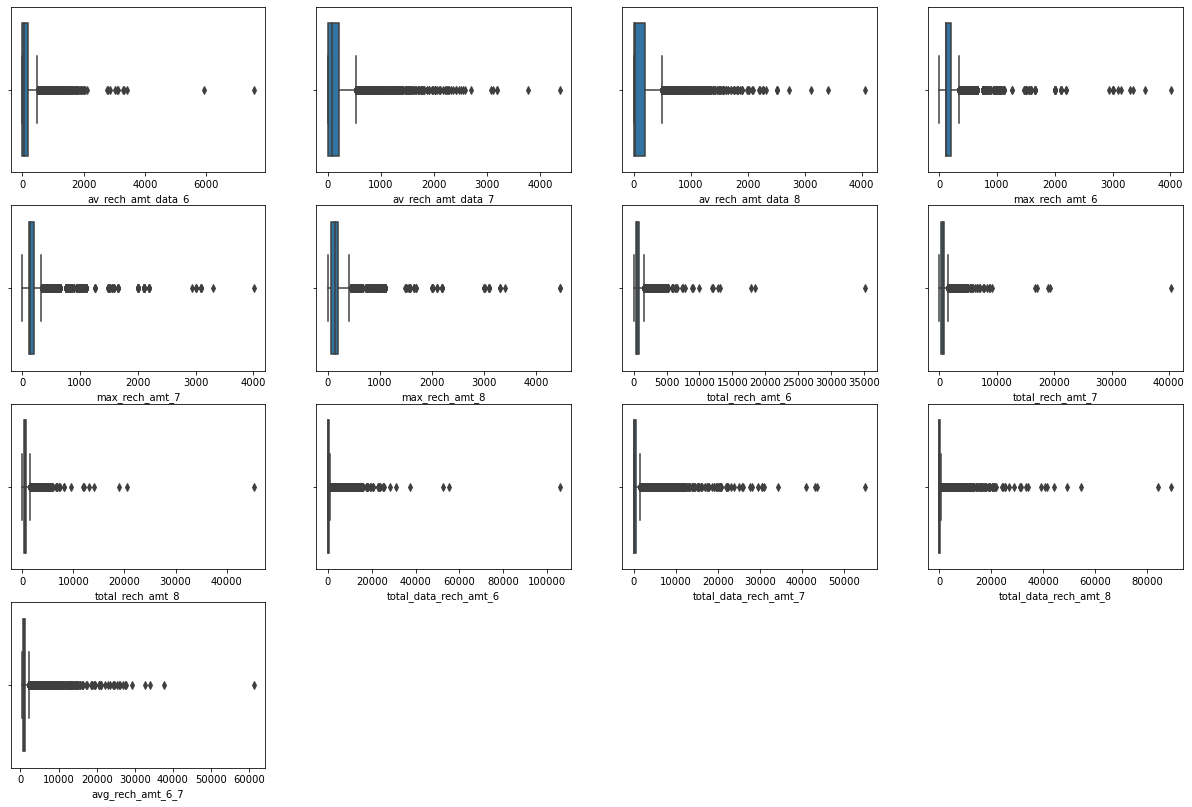

In [148]:
# Visualizing the data for first group
plt.figure(figsize = (21, 14))
for i,j in enumerate(df_high_value_cust.loc[:,rech_amt]):
    plt.subplot(4,4,i+1)
    outliers_plot(df_high_value_cust,j)
plt.show()

#### Treating outliers

In [149]:
for col in rech_amt:
    outliers_treatment(df_high_value_cust, col,1)

#### We have treated the outliers

#### Let's take the __total_rech_data_num__ related columns

In [150]:
df_high_value_cust[total_rech_data_num].head()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_num_6,total_rech_num_7,total_rech_num_8
0,1.0,1.0,1.0,4,3,2
7,0.0,0.0,0.0,5,5,7
8,0.0,2.0,3.0,19,21,14
21,0.0,0.0,0.0,22,26,27
23,0.0,2.0,2.0,3,5,4


#### Let's describe the data

In [151]:
df_high_value_cust[total_rech_data_num].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_num_6,total_rech_num_7,total_rech_num_8
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,1.667711,1.853805,1.621913,11.851005,11.718843,9.972868
std,2.831233,3.091843,2.996010,9.429132,9.432418,9.274370
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
5%,0.000000,0.000000,0.000000,3.000000,3.000000,1.000000
25%,0.000000,0.000000,0.000000,6.000000,6.000000,4.000000
50%,1.000000,1.000000,1.000000,9.000000,9.000000,8.000000
75%,2.000000,2.000000,2.000000,15.000000,15.000000,13.000000
95%,7.000000,8.000000,7.000000,29.000000,29.000000,28.000000


#### Visualizing the data for total_rech_data_num columns

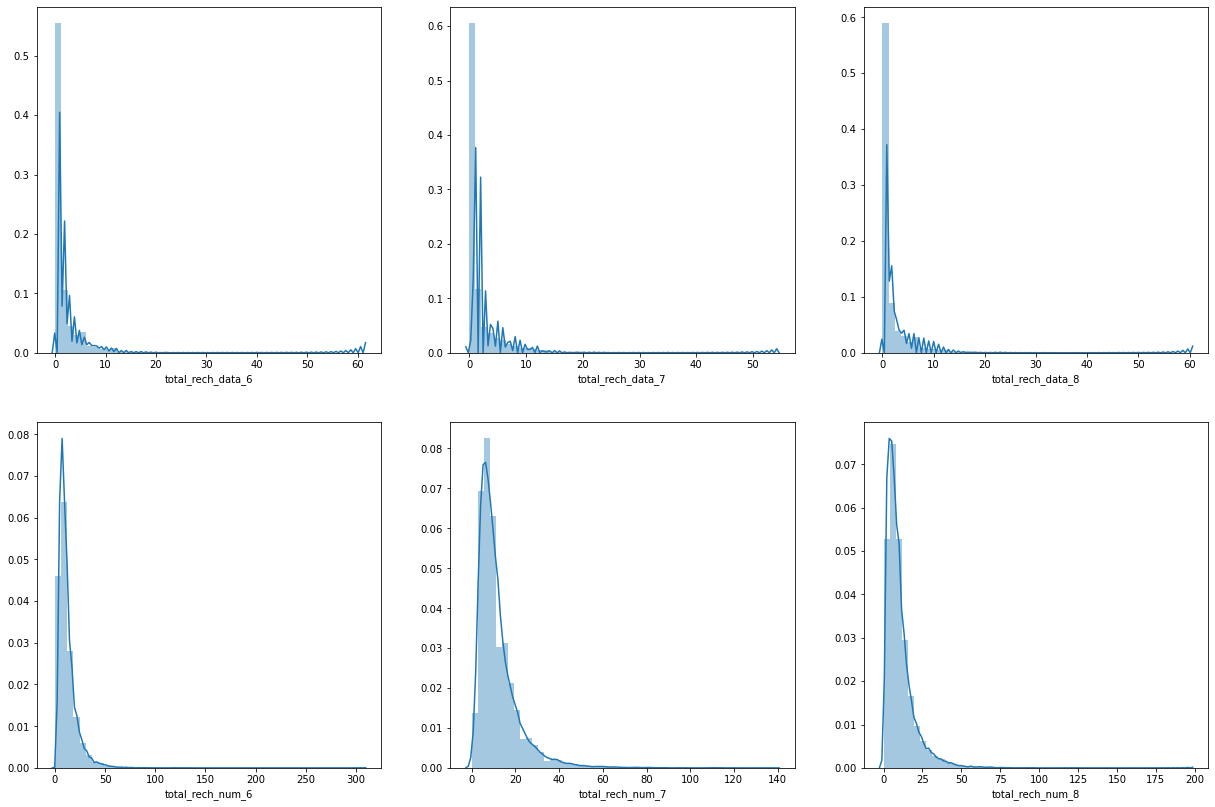

In [152]:
# Visualizing the data for total_rech_data_num
plt.figure(figsize = (21, 14))
for i,j in enumerate(df_high_value_cust.loc[:,total_rech_data_num]):
    plt.subplot(2,3,i+1)
    distribution_plot(df_high_value_cust,j)
plt.show()

#### Since the values are around 300, we can work with the data as is

#### Let's take the __count__ related columns

In [153]:
df_high_value_cust[count].head()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8
0,0.0,0.0,0.0,1.0,1.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,2.0,3.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,2.0,2.0


#### Let's describe the data

In [154]:
df_high_value_cust[count].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,1.240559,1.397287,1.208493,0.427152,0.456518,0.413420
std,2.502165,2.726290,2.537314,1.167833,1.283037,1.276497
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
95%,7.000000,7.000000,6.000000,2.000000,2.000000,2.000000


#### Visualizing the data for count columns

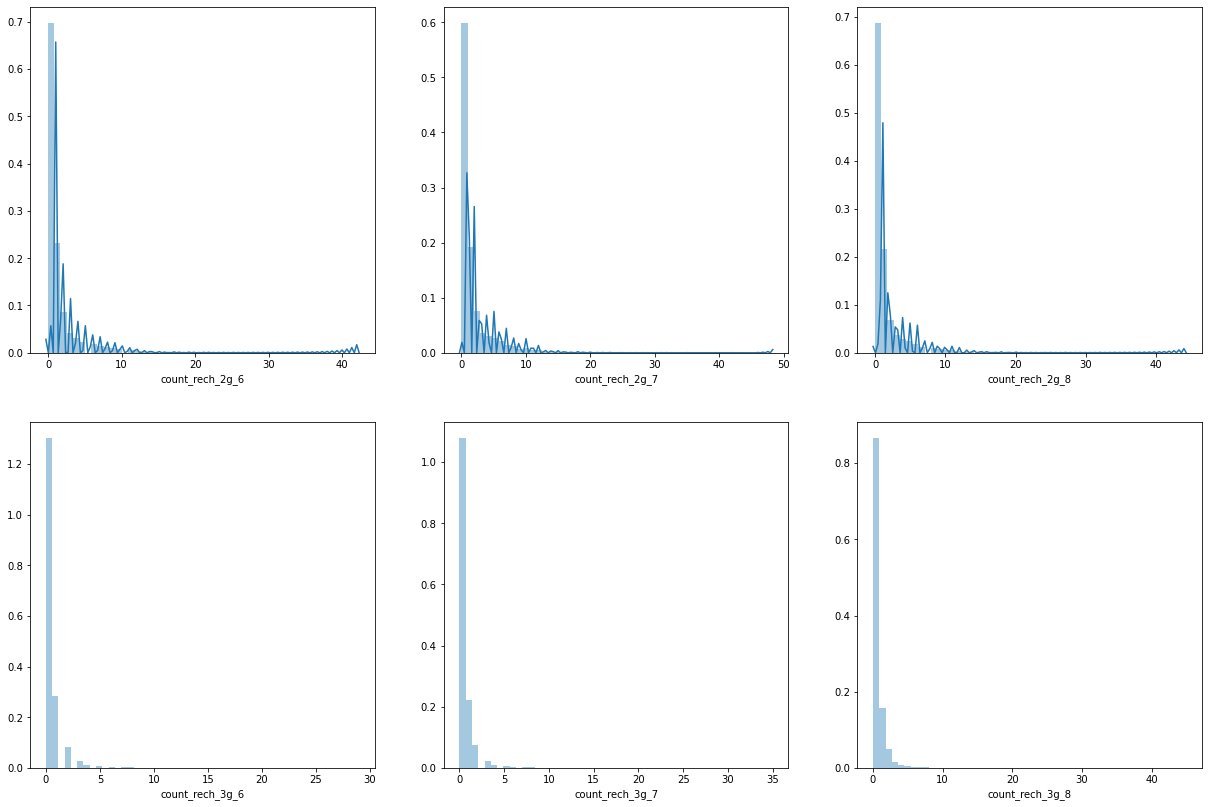

In [155]:
# Visualizing the data for first group
plt.figure(figsize = (21, 14))
for i,j in enumerate(df_high_value_cust.loc[:,count]):
    plt.subplot(2,3,i+1)
    distribution_plot(df_high_value_cust,j)
plt.show()

#### Since all  the values are under 40, we can work with the data as is

#### Let's take the __max_rech_data__ related columns

In [156]:
df_high_value_cust[max_rech_data].head()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
0,252.0,252.0,252.0
7,0.0,0.0,0.0
8,0.0,154.0,23.0
21,0.0,0.0,0.0
23,0.0,179.0,179.0


#### Let's describe the data

In [157]:
df_high_value_cust[max_rech_data].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,30001.000000,30001.000000,30001.000000
mean,78.079564,79.841805,72.492917
std,112.731468,114.273245,110.567519
min,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,25.000000,25.000000,23.000000
75%,154.000000,154.000000,154.000000
95%,252.000000,252.000000,252.000000


#### Visualizing the data for total_rech_data_num columns

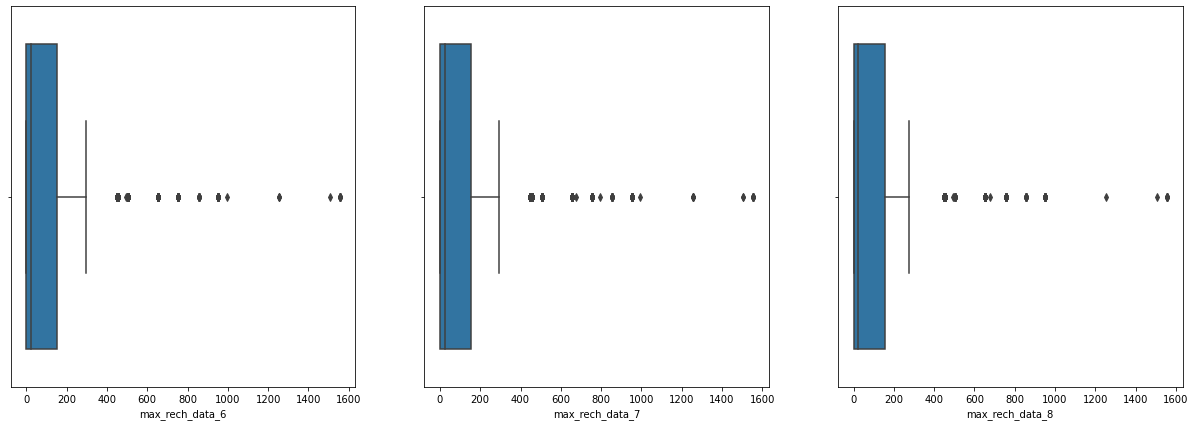

In [158]:
# Visualizing the data for total_rech_data_num
plt.figure(figsize = (21, 7))
for i,j in enumerate(df_high_value_cust.loc[:,max_rech_data]):
    plt.subplot(1,3,i+1)
    outliers_plot(df_high_value_cust,j)
plt.show()

#### Treating outliers max_rech_data

In [159]:
for col in max_rech_data:
    outliers_treatment(df_high_value_cust, col,1)

#### We have handled outlier values in max_rech_data

#### Let's take the __day__ related columns

In [160]:
df_high_value_cust[day].head()

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
0,252,252,252
7,0,0,779
8,50,0,10
21,30,20,50
23,0,179,0


#### Let's describe the data

In [161]:
df_high_value_cust[day].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
count,30001.000000,30001.000000,30001.000000
mean,100.893604,100.356021,92.393654
std,143.737572,140.925669,145.182324
min,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,25.000000,20.000000,0.000000
50%,67.000000,50.000000,50.000000
75%,120.000000,130.000000,130.000000
95%,252.000000,252.000000,252.000000


#### Visualizing the data for day related columns

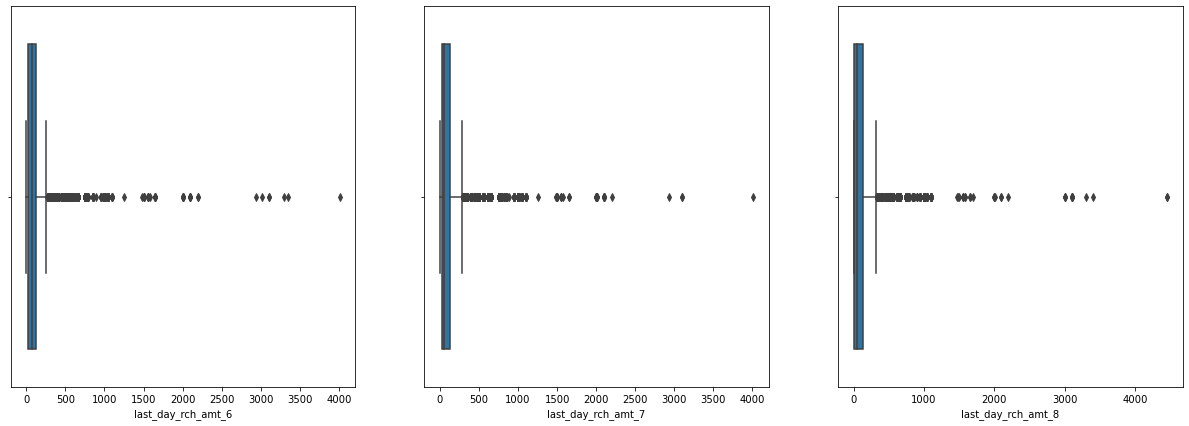

In [162]:
# Visualizing the data for total_rech_data_num
plt.figure(figsize = (21, 7))
for i,j in enumerate(df_high_value_cust.loc[:,day]):
    plt.subplot(1,3,i+1)
    outliers_plot(df_high_value_cust,j)
plt.show()

#### Treating outliers

In [163]:
for col in day:
    outliers_treatment(df_high_value_cust, col,1)

#### We have handled outlier values in day related columns

#### Let's take the __monthly__ related columns

In [164]:
df_high_value_cust[monthly].head()

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
0,0,0,0,1,1,1
7,0,0,0,0,0,0
8,0,1,0,0,0,0
21,0,0,0,0,0,0
23,0,0,0,0,2,1


#### Let's describe the data

In [165]:
df_high_value_cust[monthly].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,0.174494,0.183261,0.153628,0.217759,0.229026,0.211026
std,0.434953,0.450423,0.406486,0.613199,0.659125,0.617549
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
95%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### The columns look good, we don't need any outlier treatment for thess as maximum value is only 16

#### Let's take the __incoming calls__ related columns

In [166]:
df_high_value_cust[ic].head()

,ic_others_6,ic_others_7,ic_others_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,1.15,0.00,0.00,4.13,0.00,0.00,0.16,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44
7,15.74,15.19,15.14,2.06,14.53,31.59,427.88,355.23,188.04,152.16,101.46,39.53,217.56,221.49,121.19,58.14,32.26,27.31,16.23,33.49,31.64,0.21,0.0,0.0,180.54,173.08,193.94,52.19,34.24,22.21,91.44,126.99,141.33,36.89,11.83,30.39,626.46,558.04,428.74
8,0.00,0.00,0.00,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.00,0.00,57.58,13.98,15.48,23.84,9.84,0.31,0.00,0.00,0.00,0.00,0.0,0.0,22.43,4.66,0.75,0.00,0.00,0.00,22.43,4.08,0.65,0.00,0.58,0.10,103.86,28.49,16.54
21,0.00,0.00,0.00,0.00,0.00,0.00,125.33,87.68,159.11,4.61,2.84,10.39,118.23,74.63,129.16,2.48,10.19,19.54,0.00,0.00,0.00,0.00,0.0,0.0,81.76,44.21,101.93,0.00,0.00,0.00,67.69,38.23,101.74,14.06,5.98,0.18,207.09,131.89,261.04
23,0.00,5.35,13.06,0.00,28.23,3.74,116.63,174.41,224.21,0.00,0.00,0.71,95.91,113.36,146.84,20.71,61.04,76.64,0.00,0.00,0.00,0.00,0.0,0.0,2.94,14.89,57.29,0.00,0.00,0.00,2.43,14.89,43.91,0.51,0.00,13.38,119.58,222.89,298.33


#### Let's describe the data

In [167]:
df_high_value_cust[ic].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

,ic_others_6,ic_others_7,ic_others_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,1.153449,1.500338,1.224455,10.784689,11.875796,10.998257,231.153776,234.307412,223.264679,15.278467,16.035566,14.403175,150.412393,151.62521,146.232731,65.453285,66.636931,62.619432,16.110355,12.642504,12.500551,0.061035,0.019765,0.026567,46.789434,49.046114,44.401653,2.695855,2.798443,2.561970,29.195215,30.822517,27.922597,14.894779,15.421504,13.913705,289.950496,296.756987,279.922931
std,13.985934,15.997307,12.783238,76.729297,80.179312,70.600636,314.821196,315.995071,308.315153,45.751937,49.165972,43.305191,219.198969,218.24326,214.882624,163.738880,167.403827,158.912293,76.302156,75.785903,74.125281,0.188058,0.181859,0.110697,137.501469,148.161116,138.813305,19.099927,19.514504,19.896938,98.210477,105.664499,103.341828,77.695681,83.042730,71.338522,365.523475,373.747232,361.175175
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.560000,1.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.31000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.260000,2.440000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.880000,52.510000,40.530000,0.000000,0.000000,0.000000,28.080000,30.78000,24.210000,6.090000,6.780000,4.880000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.030000,1.050000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.880000,78.990000,61.360000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.490000,137.590000,128.730000,1.840000,2.000000,1.680000,84.060000,85.66000,80.040000,25.080000,25.780000,22.610000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.410000,12.090000,9.290000,0.000000,0.000000,0.000000,5.000000,5.180000,3.710000,0.380000,0.450000,0.110000,183.730000,187.580000,173.110000
75%,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,297.140000,298.710000,285.440000,11.980000,12.240000,11.160000,188.710000,190.66000,185.730000,67.430000,68.640000,65.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.490000,43.810000,38.380000,0.110000,0.200000,0.080000,23.600000,

#### Visualizing the data for ic related columns

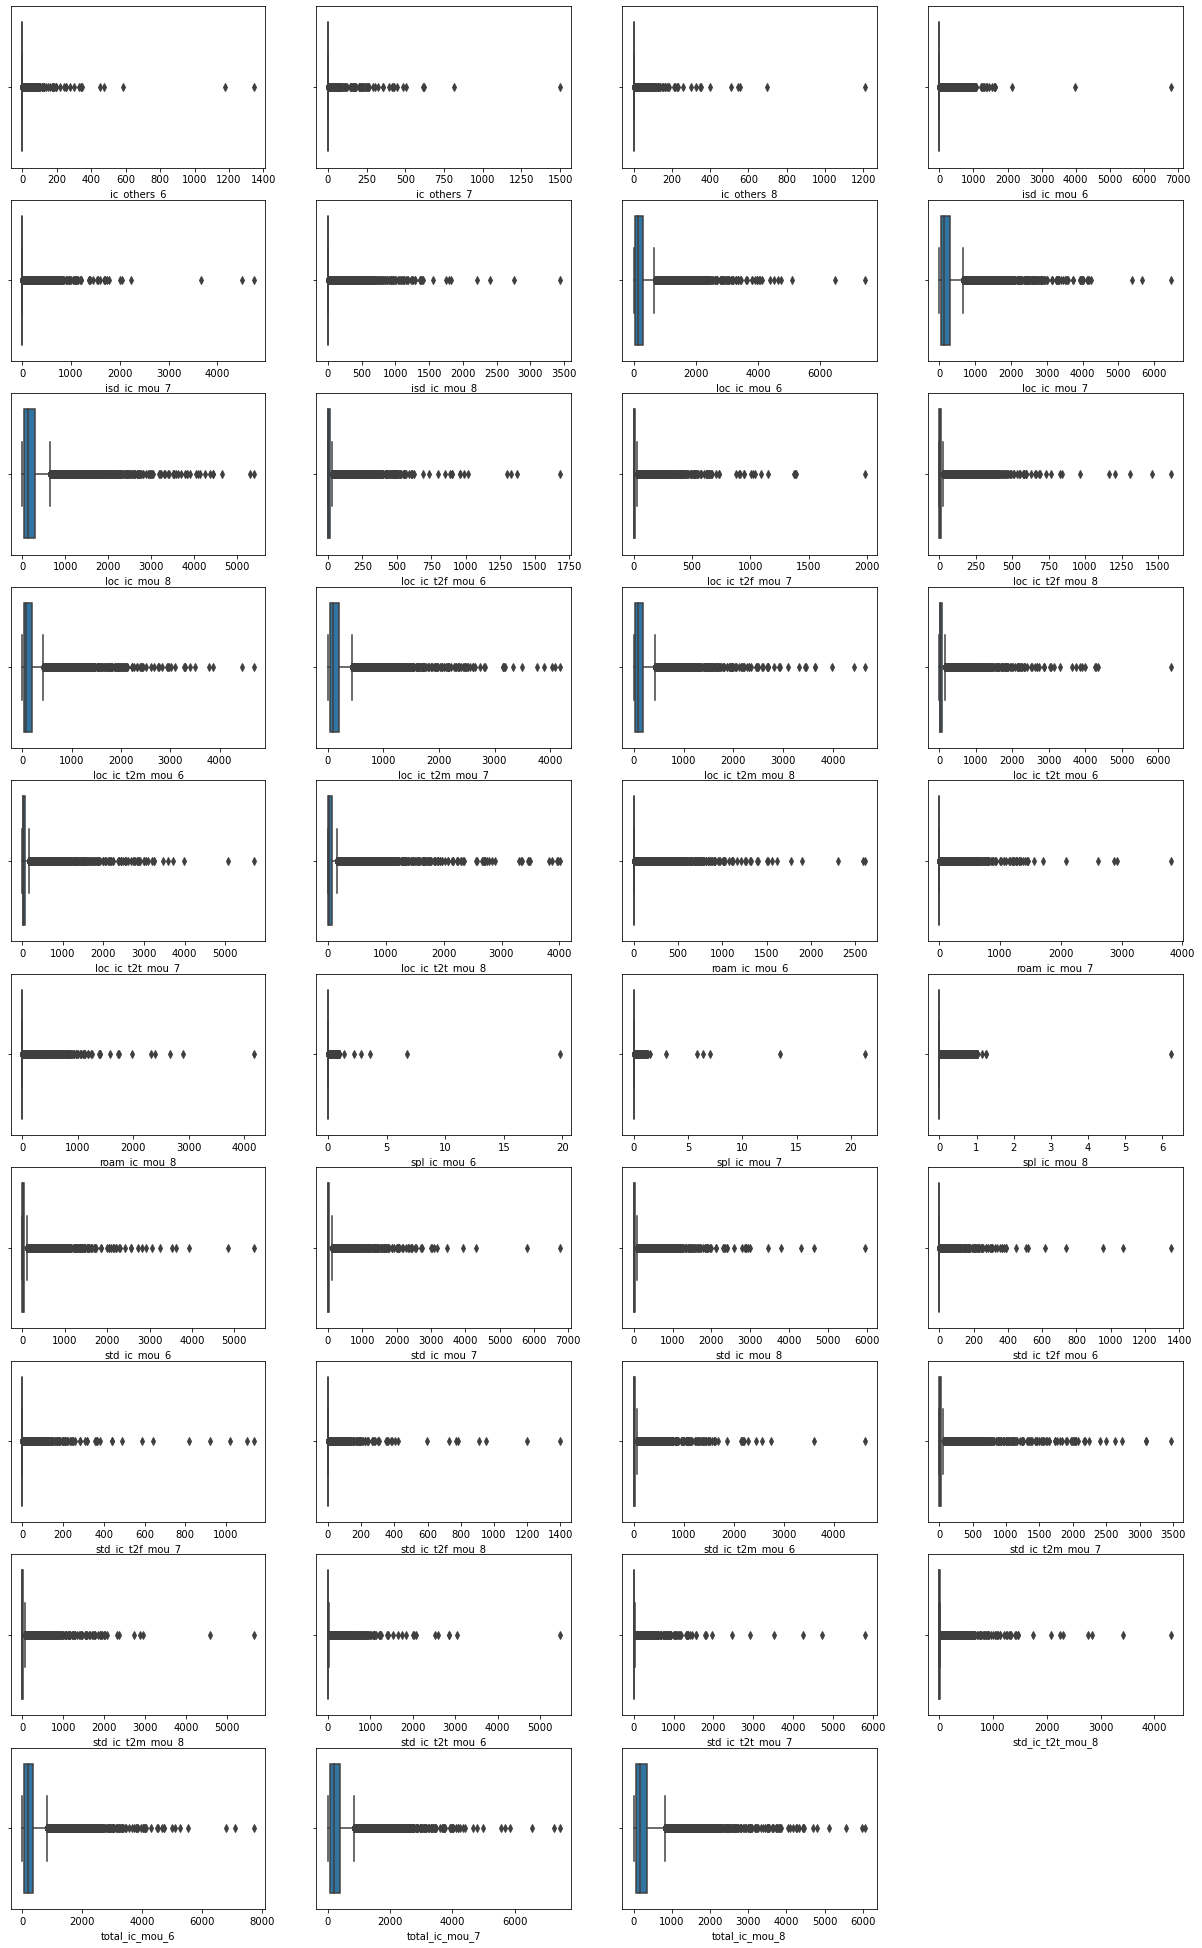

In [168]:
# Visualizing the data for total_rech_data_num
plt.figure(figsize = (21, 35))
for i,j in enumerate(df_high_value_cust.loc[:,ic]):
    plt.subplot(10,4,i+1)
    outliers_plot(df_high_value_cust,j)
plt.show()

#### We will explore incoming calls columns in EDA

#### Similarly, we will explore outgoing calls columns in EDA

#### Let's take the __volume__ related columns

In [169]:
df_high_value_cust[vol].head()

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
0,30.13,1.32,5.75,83.57,150.76,109.61
7,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,356.00,0.03,0.00,750.95,11.94
21,0.00,0.00,0.00,0.00,0.00,0.00
23,0.00,0.48,0.01,0.00,599.09,1009.92


#### Let's describe the data

In [170]:
df_high_value_cust[vol].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,126.522185,125.097326,105.913072,344.258568,370.196701,351.493998
std,330.530793,331.548010,313.384838,913.747778,915.525911,919.021056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000
75%,83.450000,77.770000,51.650000,358.740000,410.700000,356.190000
95%,702.290000,690.770000,613.020000,1714.340000,1785.990000,1736.240000


#### Visualizing the data for day related columns

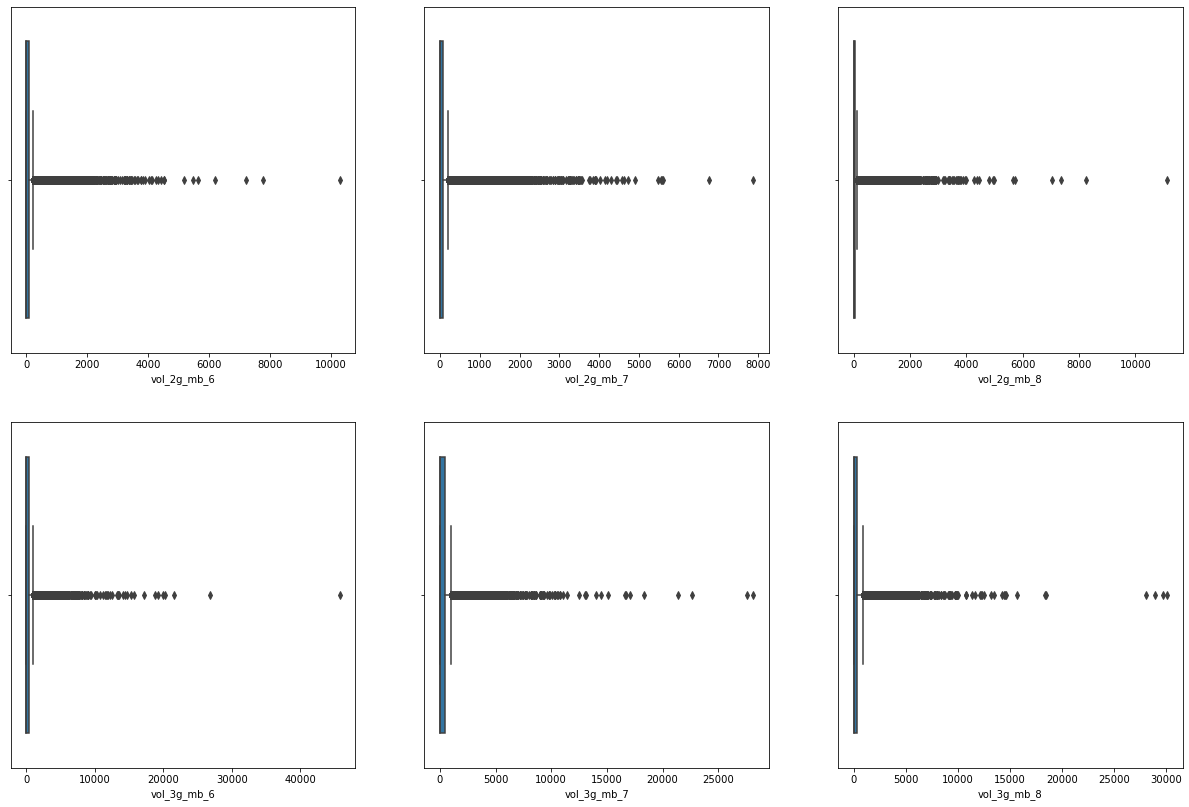

In [171]:
# Visualizing the data for vol
plt.figure(figsize = (21, 14))
for i,j in enumerate(df_high_value_cust.loc[:,vol]):
    plt.subplot(2,3,i+1)
    outliers_plot(df_high_value_cust,j)
plt.show()

#### Treating outliers

In [172]:
for col in vol:
    outliers_treatment(df_high_value_cust, col,1)

#### Let's take the __offnet__ related columns

In [173]:
df_high_value_cust[offnet].head()

,offnet_mou_6,offnet_mou_7,offnet_mou_8
0,0.00,0.00,0.00
7,453.43,567.16,325.91
8,94.66,80.63,136.48
21,757.93,896.68,983.39
23,85.41,89.36,205.89


#### Let's describe the data

In [174]:
df_high_value_cust[offnet].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

,offnet_mou_6,offnet_mou_7,offnet_mou_8
count,30001.000000,30001.000000,30001.000000
mean,373.693961,378.103169,335.077044
std,482.523558,498.923555,482.062509
min,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000
5%,0.210000,0.050000,0.000000
25%,71.610000,69.910000,46.740000
50%,222.540000,220.030000,182.790000
75%,487.940000,494.010000,438.890000
95%,1256.610000,1272.290000,1167.540000


#### Visualizing the data for day related columns

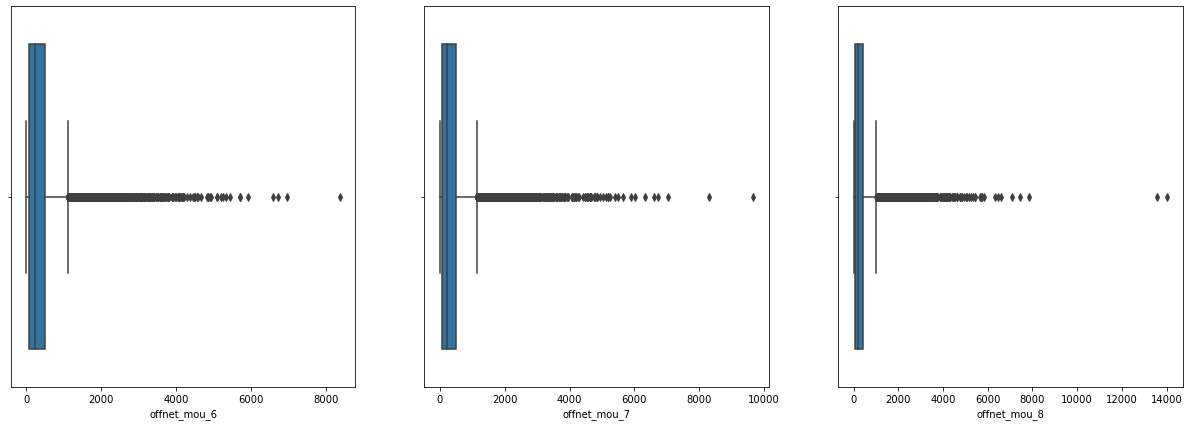

In [175]:
# Visualizing the data for total_rech_data_num
plt.figure(figsize = (21, 7))
for i,j in enumerate(df_high_value_cust.loc[:,offnet]):
    plt.subplot(1,3,i+1)
    outliers_plot(df_high_value_cust,j)
plt.show()

#### Treating outliers

In [176]:
for col in offnet:
    outliers_treatment(df_high_value_cust, col,1)

#### Let's take the __onnet__ related columns

In [177]:
df_high_value_cust[onnet].head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8
0,0.00,0.00,0.00
7,57.84,54.68,52.29
8,413.69,351.03,35.08
21,102.41,132.11,85.14
23,48.96,50.66,33.58


#### Let's describe the data

In [178]:
df_high_value_cust[onnet].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

,onnet_mou_6,onnet_mou_7,onnet_mou_8
count,30001.000000,30001.000000,30001.000000
mean,260.793024,267.819295,234.112539
std,459.644368,479.993989,458.448598
min,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,17.080000,16.030000,10.390000
50%,84.580000,82.810000,65.610000
75%,290.440000,290.240000,239.960000
95%,1135.440000,1185.790000,1074.590000


#### Visualizing the data for day related columns

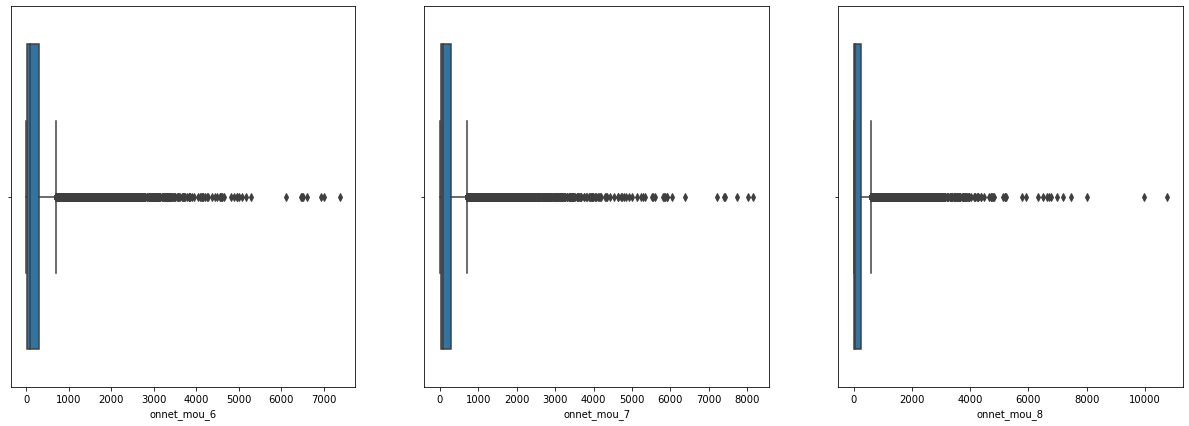

In [179]:
# Visualizing the data for onnet
plt.figure(figsize = (21, 7))
for i,j in enumerate(df_high_value_cust.loc[:,onnet]):
    plt.subplot(1,3,i+1)
    outliers_plot(df_high_value_cust,j)
plt.show()

#### Treating outliers

In [180]:
for col in onnet:
    outliers_treatment(df_high_value_cust, col,1)

#### We can explore more in EDA

#### Let's take the __sachet__ related columns

In [181]:
df_high_value_cust[sachet].head()

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
0,0,0,0,0,0,0
7,0,0,0,0,0,0
8,0,1,3,0,0,0
21,0,0,0,0,0,0
23,0,0,0,0,0,1


#### Let's describe the data

In [182]:
df_high_value_cust[sachet].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,1.066064,1.214026,1.054865,0.209393,0.227492,0.202393
std,2.507197,2.736158,2.535940,0.985674,1.089929,1.100107
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
95%,6.000000,7.000000,6.000000,1.000000,1.000000,1.000000


#### Visualizing the data for day related columns

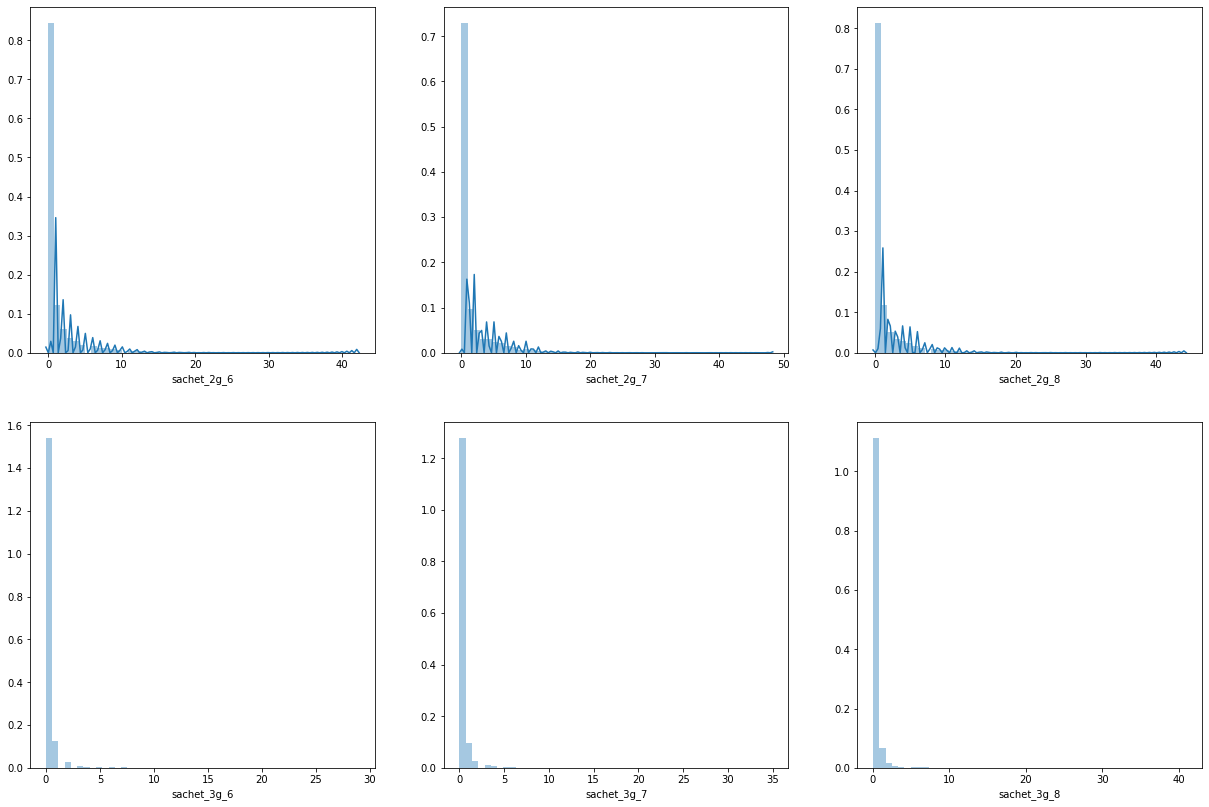

In [183]:
# Visualizing the data for total_rech_data_num
plt.figure(figsize = (21, 14))
for i,j in enumerate(df_high_value_cust.loc[:,sachet]):
    plt.subplot(2,3,i+1)
    distribution_plot(df_high_value_cust,j)
plt.show()

#### The values for all the sachet columns are below 48, we can keep as is

## Step 3: Exploratory Data Analysis

### We will take a look at the behaviour of columns with respect to the dependent variable. i.e __churn__

#### Creating a function to observe behaviour with 'Churn'

In [184]:
# Function to visualise data:
def multiplot(data, column, dep = 'churn'):
    plt.title('Churn vs {}'.format(column), fontsize = 16)
    ax = sns.boxplot(x = 'churn', y = column, hue = 'churn', showfliers=False, data = data)
    axis_font = {'size':'16'}
    plt.xlabel('churn', **axis_font)
    plt.ylabel(column, **axis_font)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(16)
    plt.tight_layout(pad=5.0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

#### Let's check for aon_yr

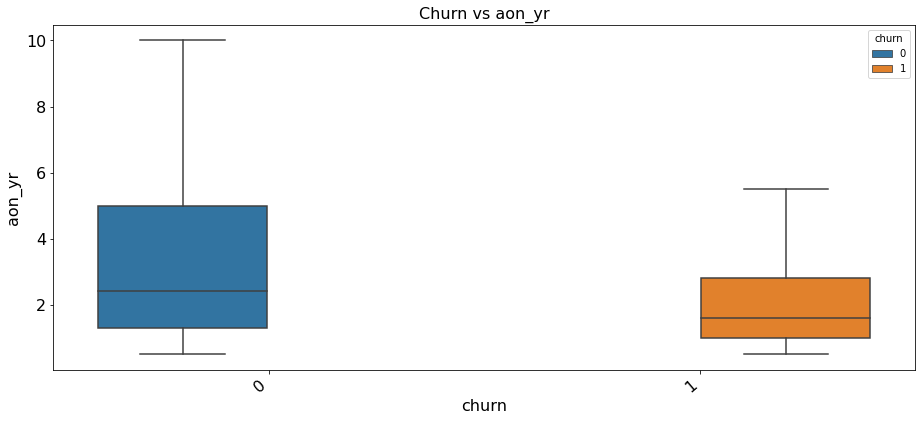

In [185]:
plt.figure(figsize = (14,7))
multiplot(df_high_value_cust, 'aon_yr')

#### From above, We observe that the vintage customers tend to stay with the company as the variance as well as median is high for non churners

#### Let's check for rech_amt columns

#### The number of columns for rech_amnt is very much, we will take individual columns for good phase and action phase together

In [186]:
rech_amt

['av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_data_rech_amt_6',
 'total_data_rech_amt_7',
 'total_data_rech_amt_8',
 'avg_rech_amt_6_7']

#### We wil lok at the data in chuncks of 3, so that we can take a look at the good phase and action phase together

In [187]:
from itertools import islice

def chunks(data, n):
    it = iter(data)
    for i in range(0, len(data), n):
        yield {k:data[k] for k in islice(it, n)}

In [188]:
## Creating a dictionary for rech_amt variables
group_data = {idx:col for idx,col in enumerate(rech_amt)}

In [189]:
## Checking for slots
for item in chunks(group_data, 3):
    print(item)

{0: 'av_rech_amt_data_6', 1: 'av_rech_amt_data_7', 2: 'av_rech_amt_data_8'}
{3: 'max_rech_amt_6', 4: 'max_rech_amt_7', 5: 'max_rech_amt_8'}
{6: 'total_rech_amt_6', 7: 'total_rech_amt_7', 8: 'total_rech_amt_8'}
{9: 'total_data_rech_amt_6', 10: 'total_data_rech_amt_7', 11: 'total_data_rech_amt_8'}
{12: 'avg_rech_amt_6_7'}


In [190]:
## Assigning data to different groups
av_rech_amt_data,max_rech_amt,total_rech_amt,total_data_rech_amt,avg_rech_amt_GPhase = chunks(group_data,3)

#### Let's do EDA for these chunks

#### Let's start with av_rech_amt_data columns

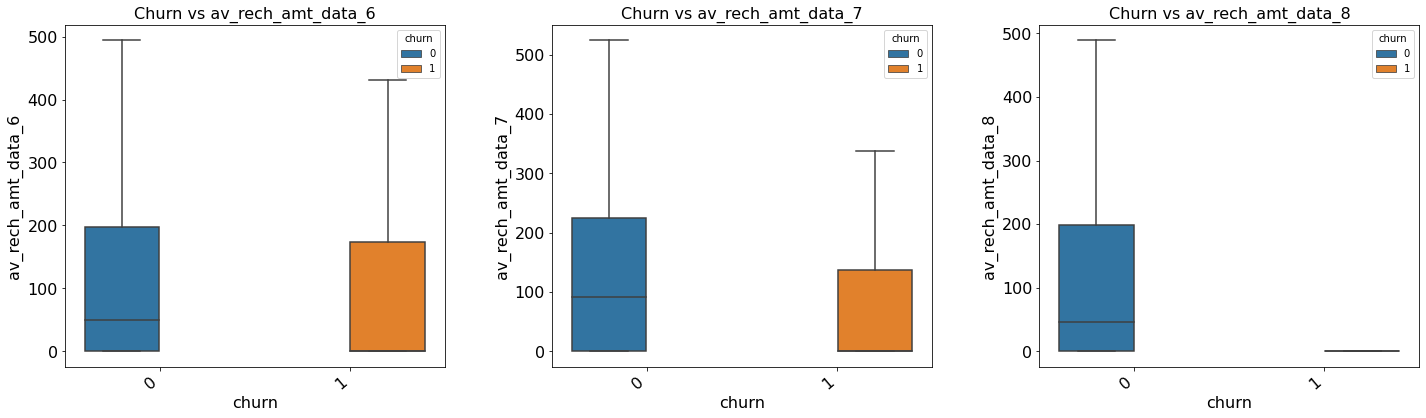

In [191]:
# Visualizing the data for first group
plt.figure(figsize = (21, 7))
for i,j in enumerate(df_high_value_cust.loc[:,av_rech_amt_data.values()]):
    plt.subplot(1,3,i+1)
    multiplot(df_high_value_cust, j)
plt.show()

#### We can clearly observe that the average recharge amount of data is declining from June to Aug(Good phase to Churn phase) for churn customers as it is near to 0 in action phase

#### Let's check with max_rech_amt columns

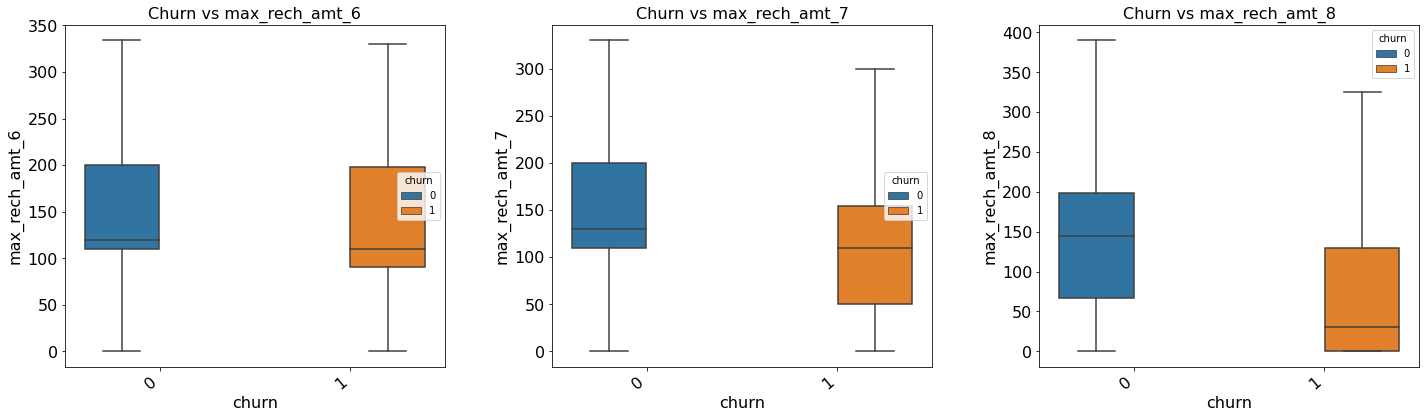

In [192]:
# Visualizing the data for first group
plt.figure(figsize = (21, 7))
for i,j in enumerate(df_high_value_cust.loc[:,max_rech_amt.values()]):
    plt.subplot(1,3,i+1)
    multiplot(df_high_value_cust, j)
plt.show()

#### We can clearly observe that the max recharge amount for churned customers is constanly decreasing from June to Aug (Good phase to action phase)

#### Let's check with total_rech_amt columns

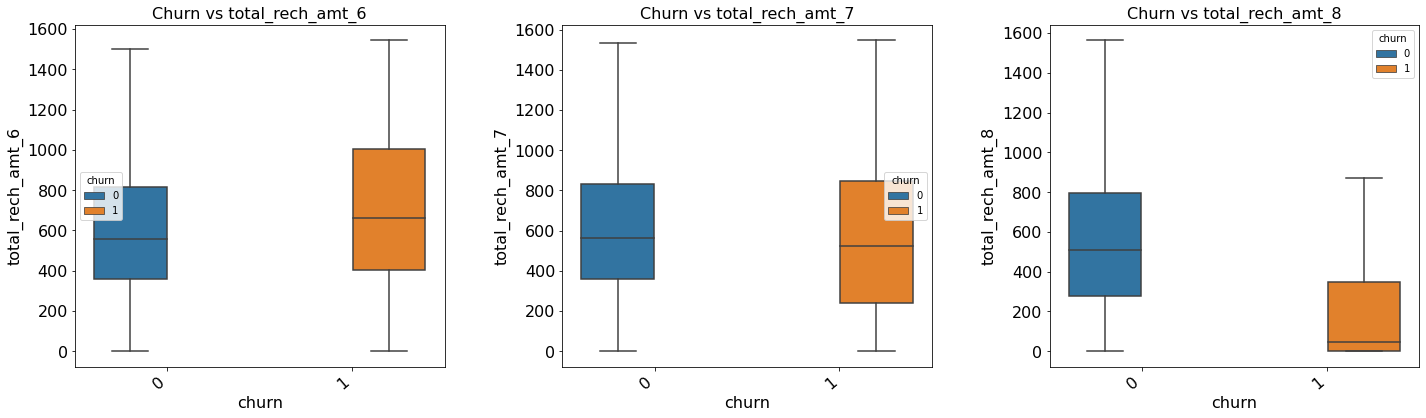

In [193]:
# Visualizing the data for first group
plt.figure(figsize = (21, 7))
for i,j in enumerate(df_high_value_cust.loc[:,total_rech_amt.values()]):
    plt.subplot(1,3,i+1)
    multiplot(df_high_value_cust, j)
plt.show()

#### We can see an interesting pattern here. In the good phase, the churned customers were having greater total recharge amount than non-churneres. But it declined sharply in the action phase

#### Let's check with total_data_rech_amt columns

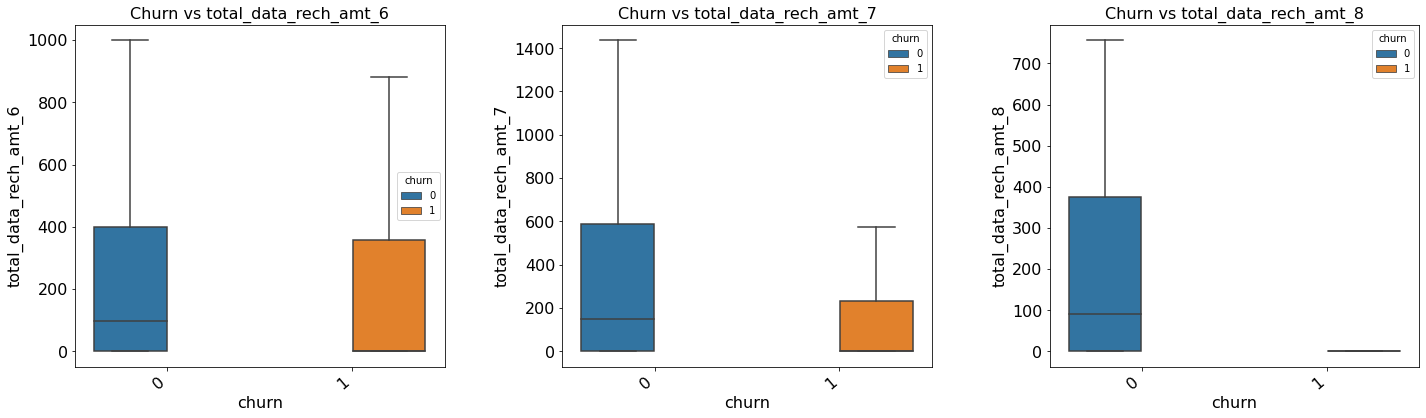

In [194]:
# Visualizing the data for first group
plt.figure(figsize = (21, 7))
for i,j in enumerate(df_high_value_cust.loc[:,total_data_rech_amt.values()]):
    plt.subplot(1,3,i+1)
    multiplot(df_high_value_cust, j)
plt.show()

#### Here again, we can observe that there is a sharp decline in total data recharge amount as we move from good phase to action phase

#### Let's now check for total_rech_data_num related columns

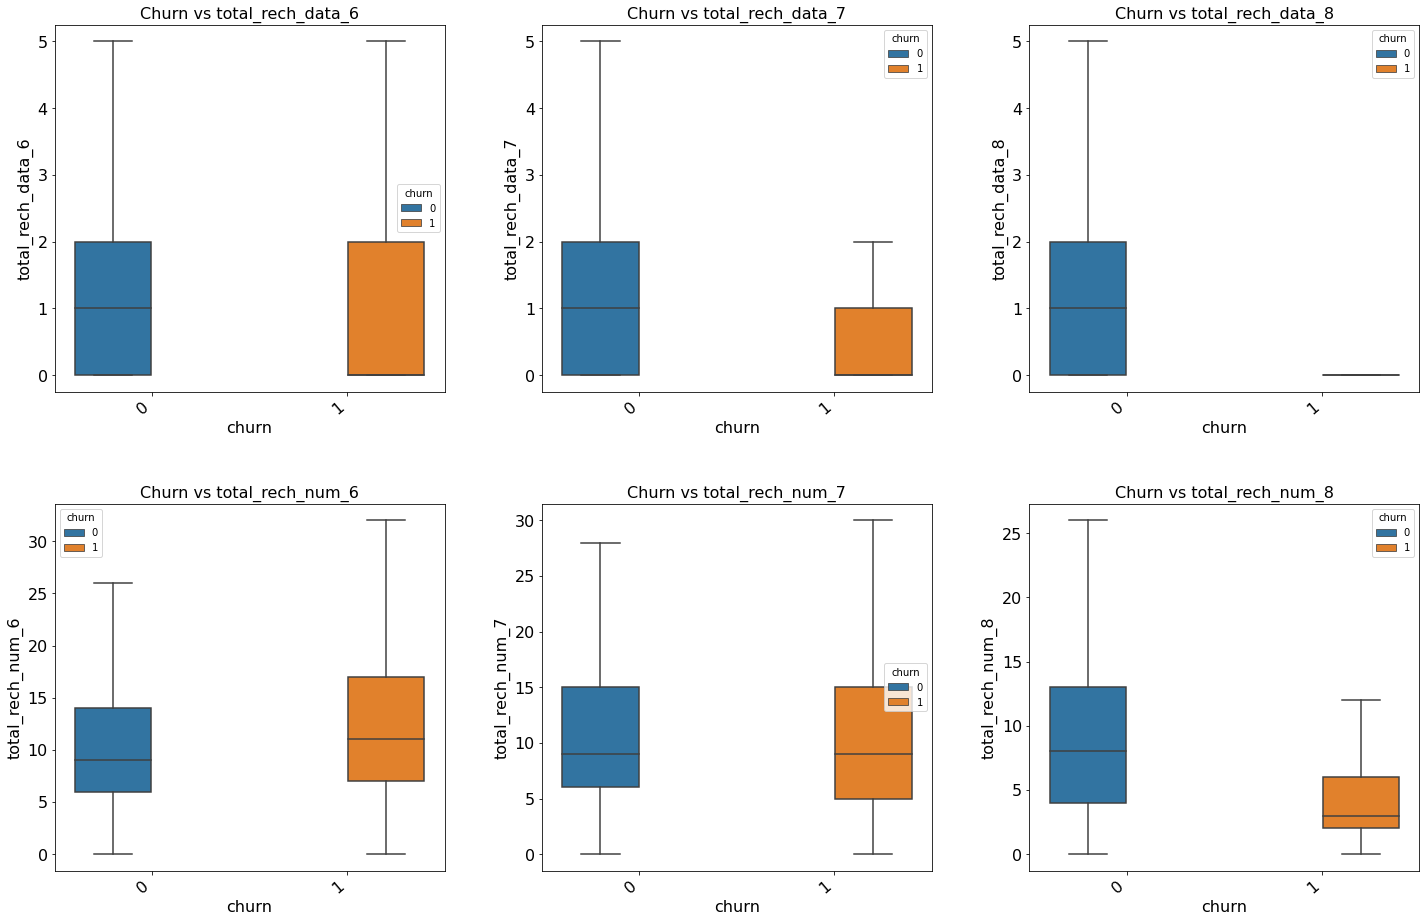

In [195]:
# Visualizing the data for first group
plt.figure(figsize = (21, 14))
for i,j in enumerate(df_high_value_cust.loc[:,total_rech_data_num]):
    plt.subplot(2,3,i+1)
    multiplot(df_high_value_cust, j)
plt.show()

#### From above graphs, we can observe that the frequency of regular recharge and data recharge is declining sharply from good phase to action phase. In fact, churners did not do data recharges in action phase

#### Taking columns for max_rech_data in consideration

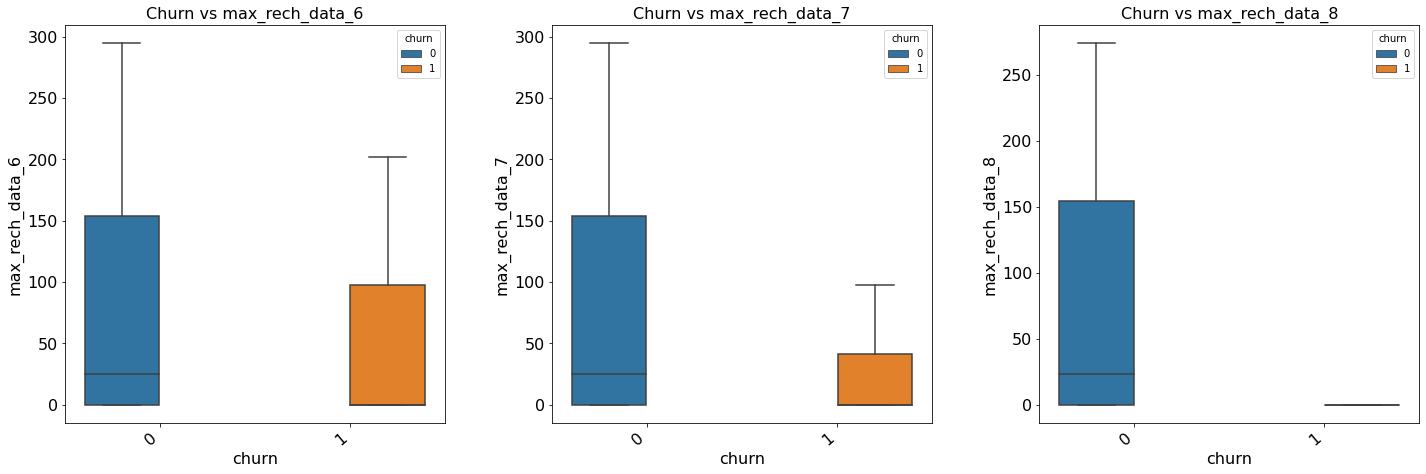

In [196]:
# Visualizing the data for first group
plt.figure(figsize = (21, 14))
for i,j in enumerate(df_high_value_cust.loc[:,max_rech_data]):
    plt.subplot(2,3,i+1)
    multiplot(df_high_value_cust, j)
plt.show()

#### We observe that maximum recharge of data is declining sharply from good phase to action phase. It has become almost 0 for churners

#### Taking columns related to last day_rech_amnt in consideration

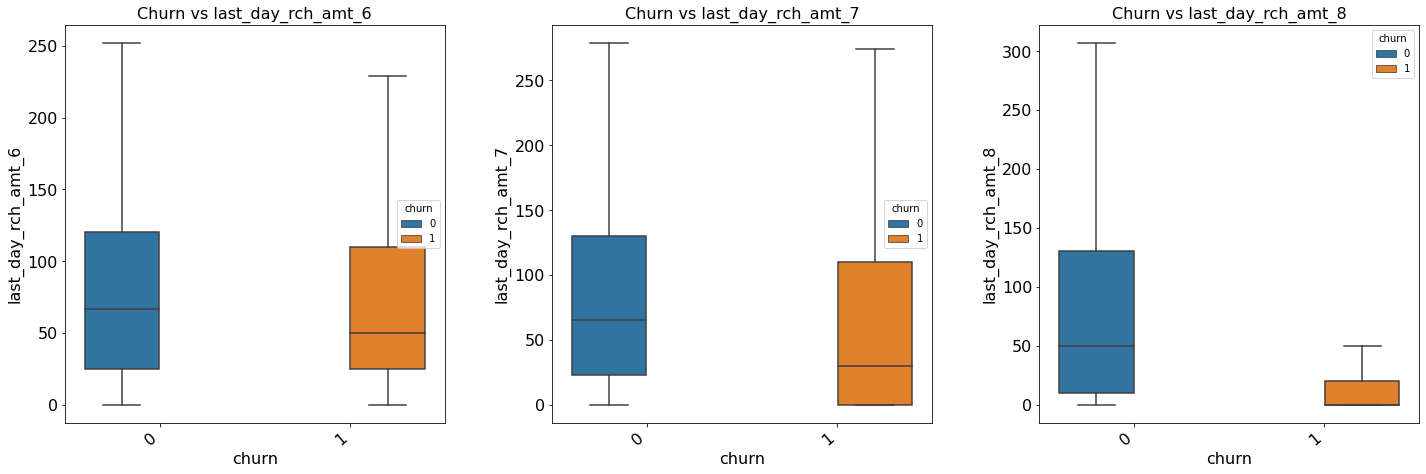

In [197]:
# Visualizing the data for first group
plt.figure(figsize = (21, 14))
for i,j in enumerate(df_high_value_cust.loc[:,day]):
    plt.subplot(2,3,i+1)
    multiplot(df_high_value_cust, j)
plt.show()

#### We observe that maximum recharge of last day is declining sharply from good phase to action phase.

#### Let's check for volume based columns

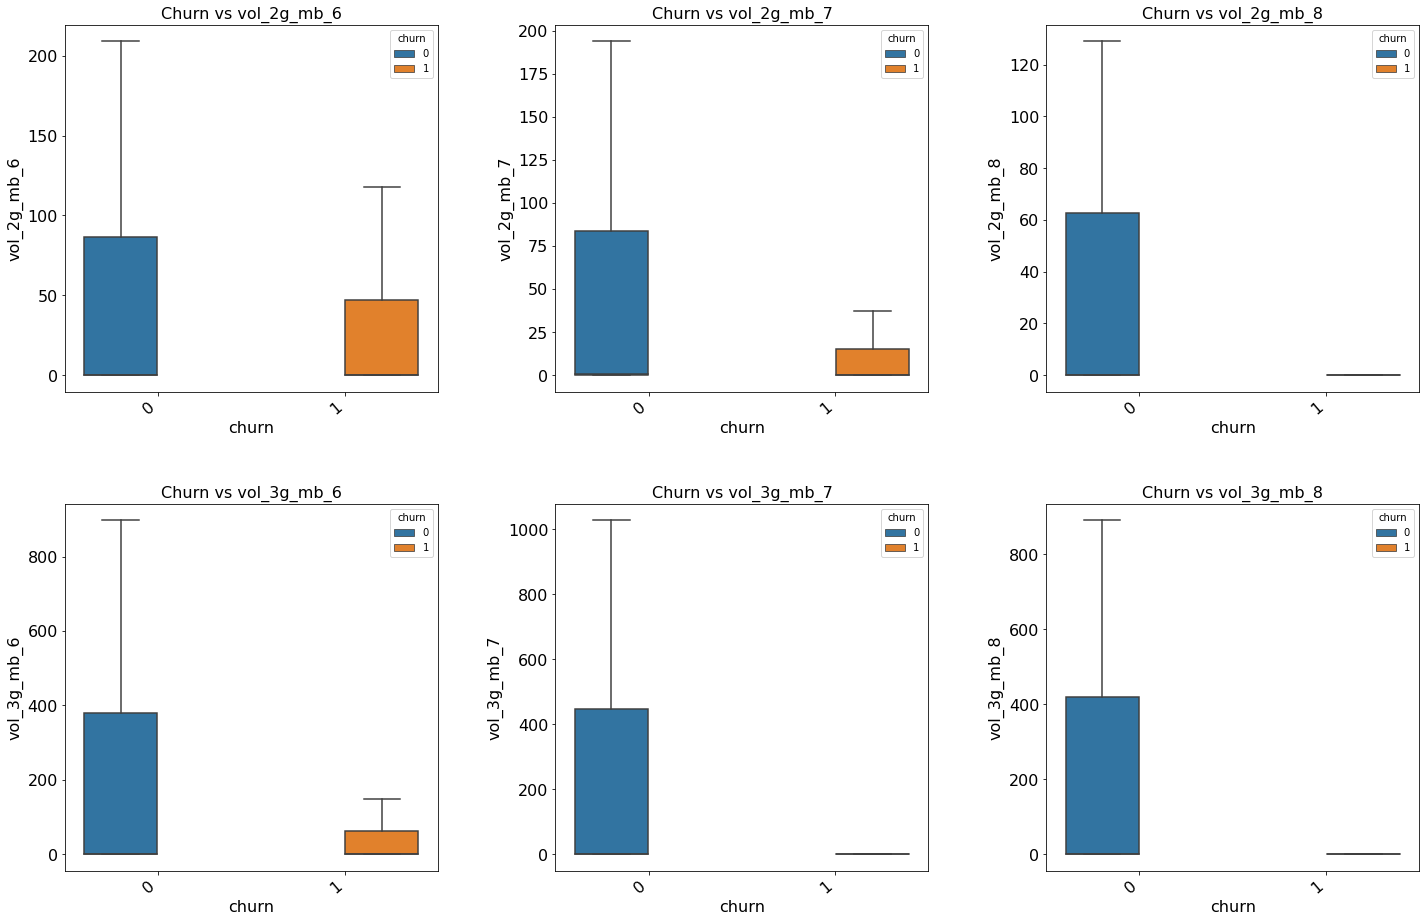

In [198]:
# Visualizing the data for first group
plt.figure(figsize = (21, 14))
for i,j in enumerate(df_high_value_cust.loc[:,vol]):
    plt.subplot(2,3,i+1)
    multiplot(df_high_value_cust, j)
plt.show()

#### We observe that the consumption of 2G data is declining from good phase to bad phase
#### For 3G data conusmption. We see that consumption is very low for second month of good phase too. It may be that the 3G services are not good in areas where the customers have churned

#### Taking columns related to monthly subscription in consideration

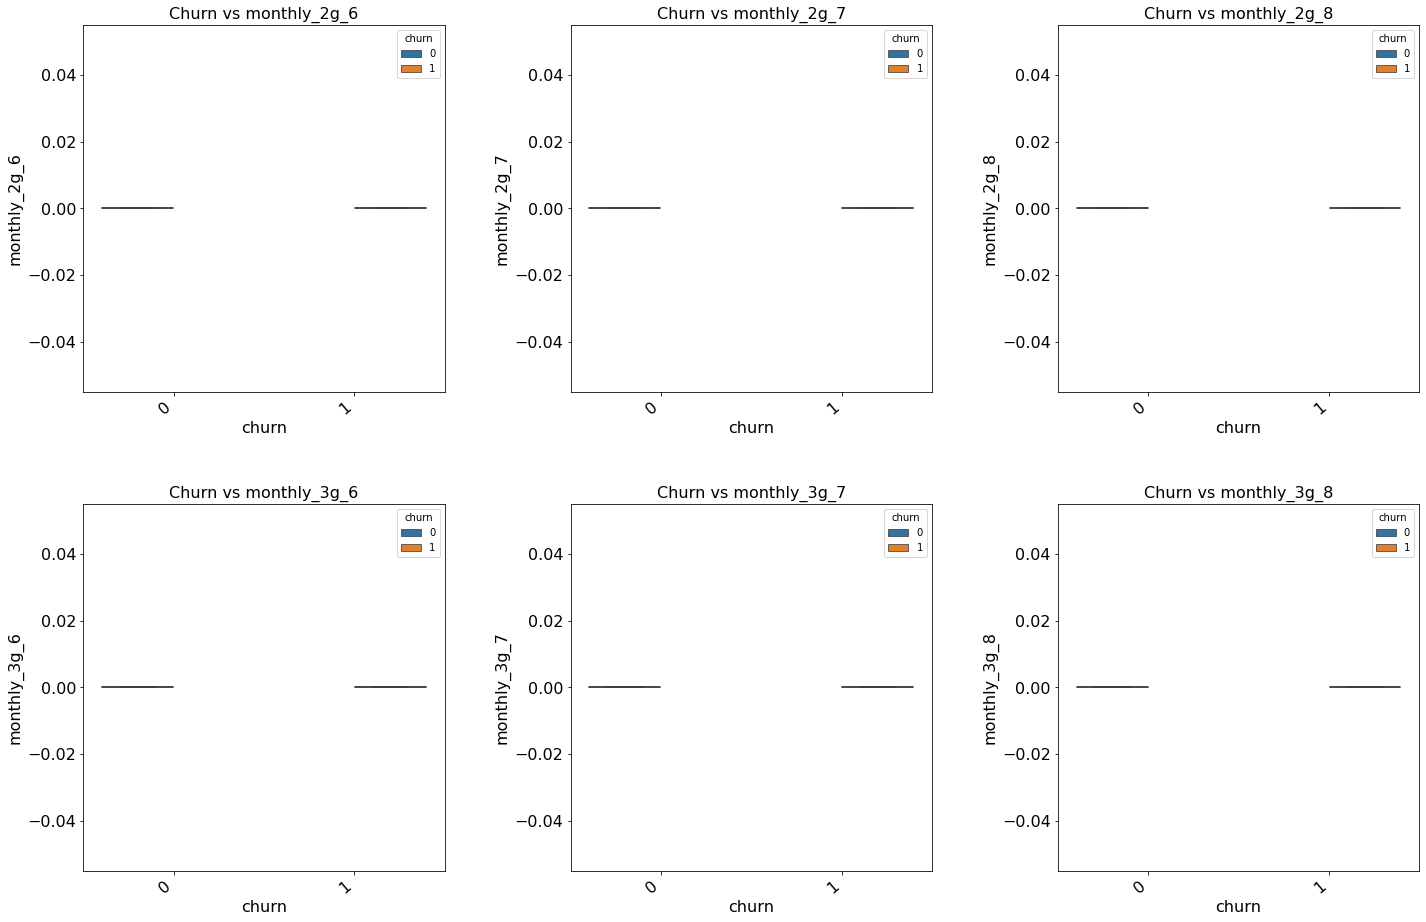

In [199]:
# Visualizing the data for first group
plt.figure(figsize = (21, 14))
for i,j in enumerate(df_high_value_cust.loc[:,monthly]):
    plt.subplot(2,3,i+1)
    multiplot(df_high_value_cust, j)
plt.show()

#### From the above graphs nothing conslusive can be said. We can try different approach

#### We can try a barplot for this situation

#### Creting function to draw bar plot

In [200]:
# Function to visualise data:
def bar_plot(data, column, dep = 'churn'):
    plt.title('Churn vs {}'.format(column), fontsize = 16)
    ax = sns.barplot(x = 'churn', y = column, data = data)
    axis_font = {'size':'16'}
    plt.xlabel('churn', **axis_font)
    plt.ylabel(column, **axis_font)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(16)
    plt.tight_layout(pad=5.0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

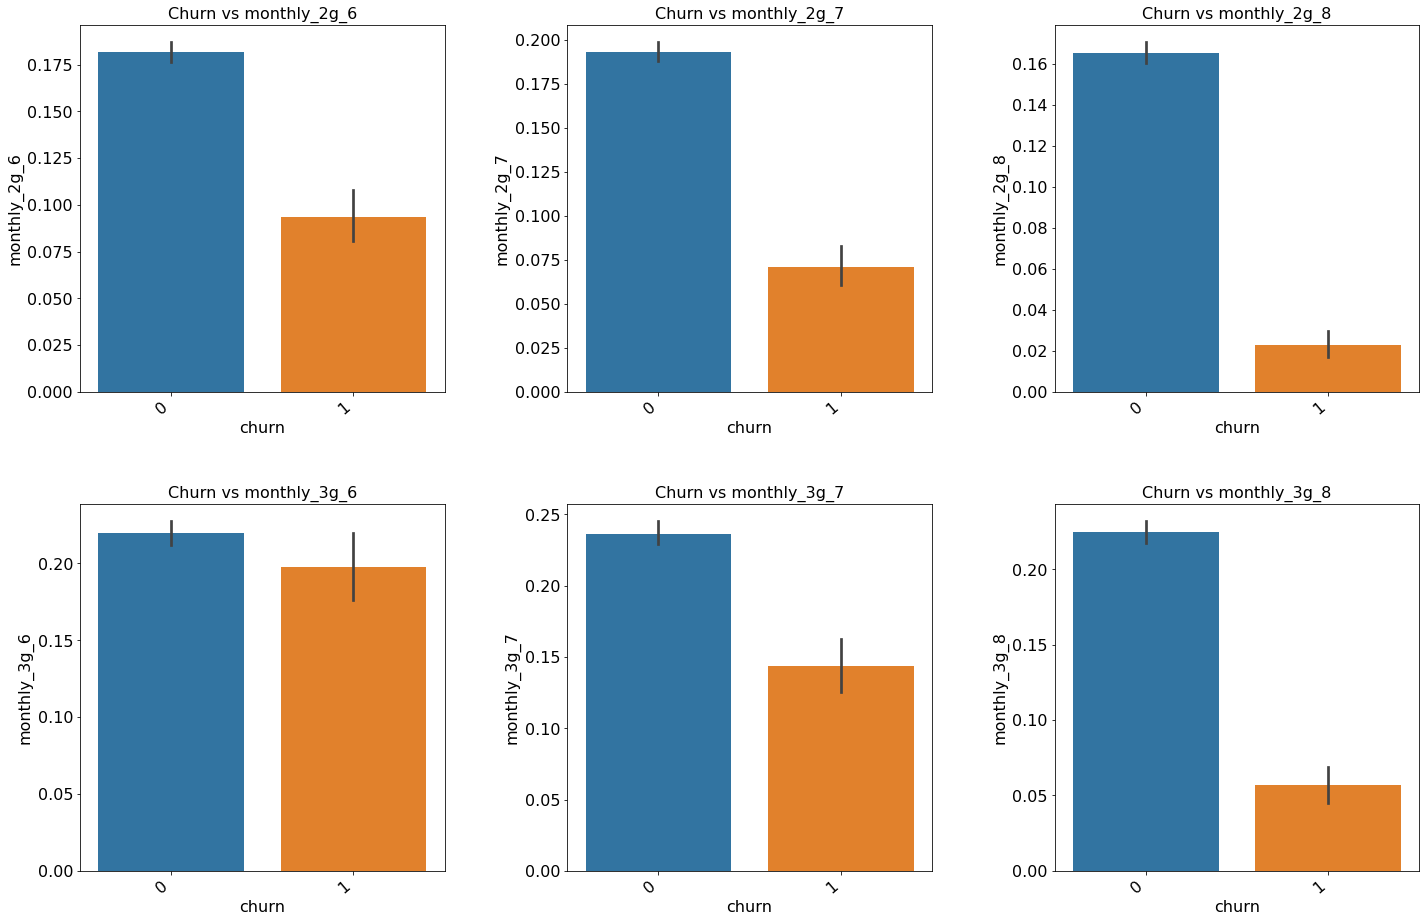

In [201]:
# Visualizing the data for monthly subscription
plt.figure(figsize = (21, 14))
for i,j in enumerate(df_high_value_cust.loc[:,monthly]):
    plt.subplot(2,3,i+1)
    bar_plot(df_high_value_cust, j)
plt.show()

#### As found with other features, we see a drop in monthly subsription from good phase to action phase for churned customers

#### Taking vbc related features

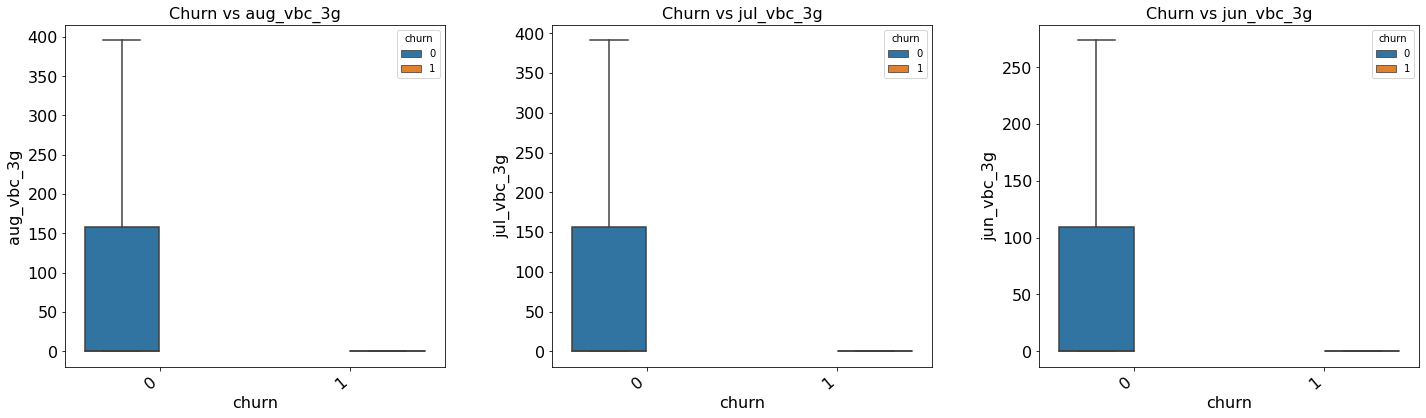

In [202]:
# Visualizing the data for vbc
plt.figure(figsize = (21, 7))
for i,j in enumerate(df_high_value_cust.loc[:,vbc]):
    plt.subplot(1,3,i+1)
    multiplot(df_high_value_cust, j)
plt.show()

#### We cannot comment much about the churn customers by looking at the above plot, we can try barplot

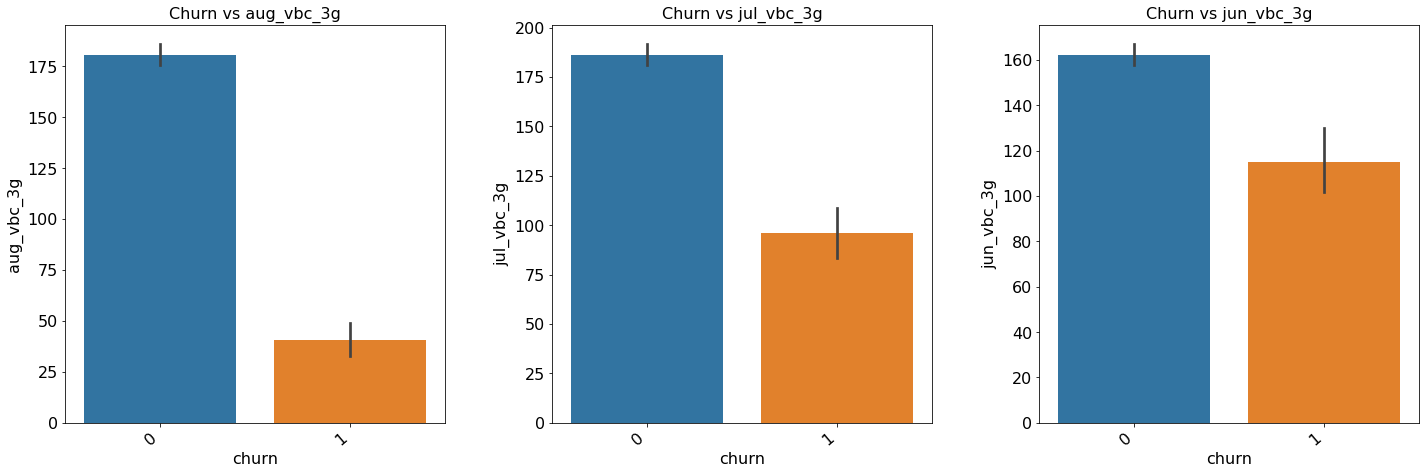

In [203]:
# Visualizing the data for vbc
plt.figure(figsize = (21, 14))
for i,j in enumerate(df_high_value_cust.loc[:,vbc]):
    plt.subplot(2,3,i+1)
    bar_plot(df_high_value_cust, j)
plt.show()

#### The graph on the left is for action phase. We can observe a decline in volume based cost of 3G data for churned customers

#### Taking sachet related features

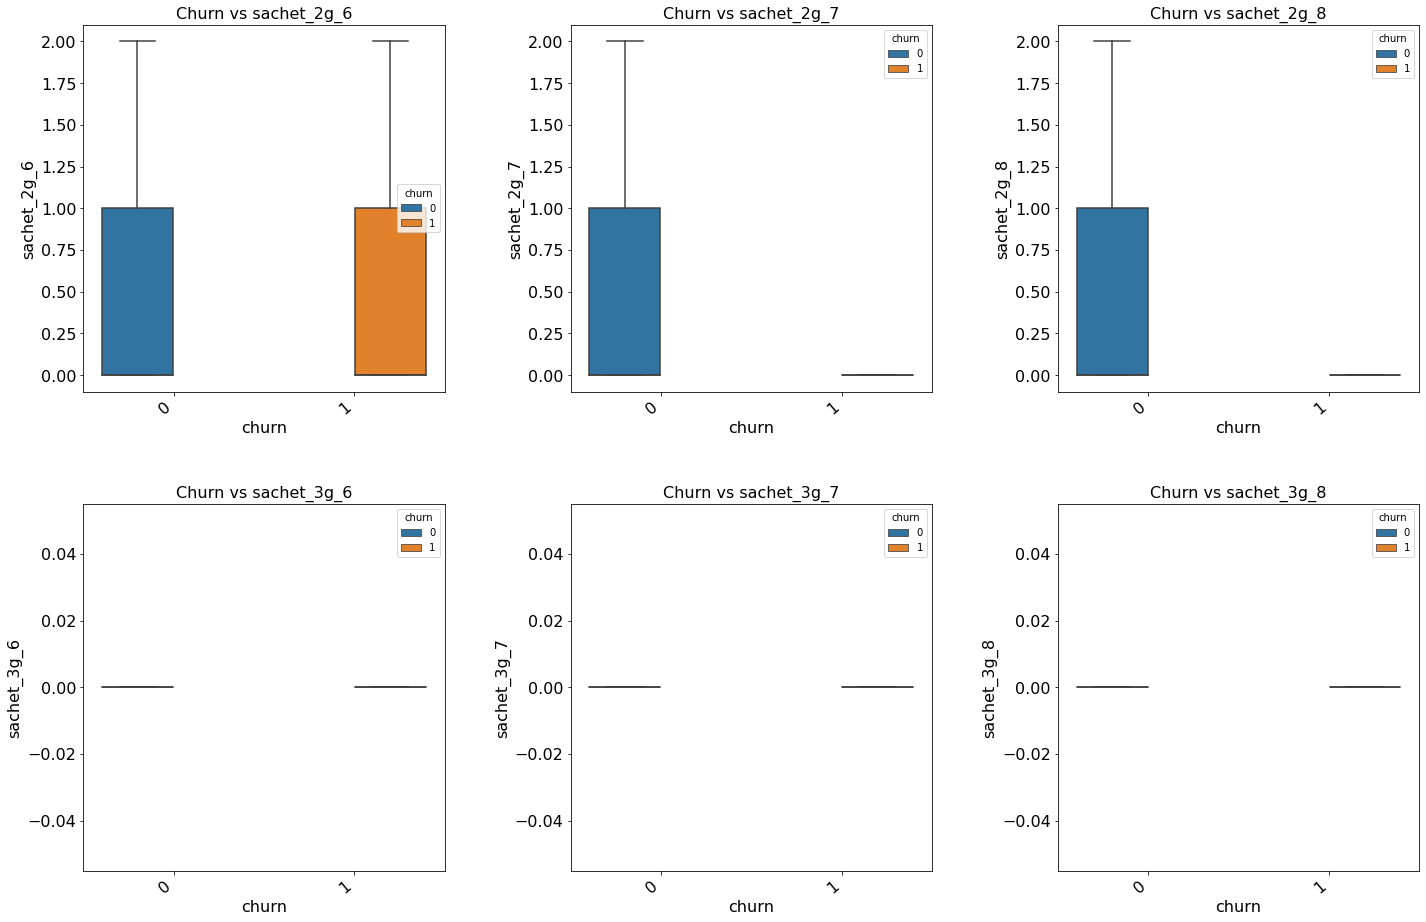

In [204]:
# Visualizing the data for sachet
plt.figure(figsize = (21, 14))
for i,j in enumerate(df_high_value_cust.loc[:,sachet]):
    plt.subplot(2,3,i+1)
    multiplot(df_high_value_cust, j)
plt.show()

#### We cannot comment much about the churn customers by looking at the above plot, we can try barplot

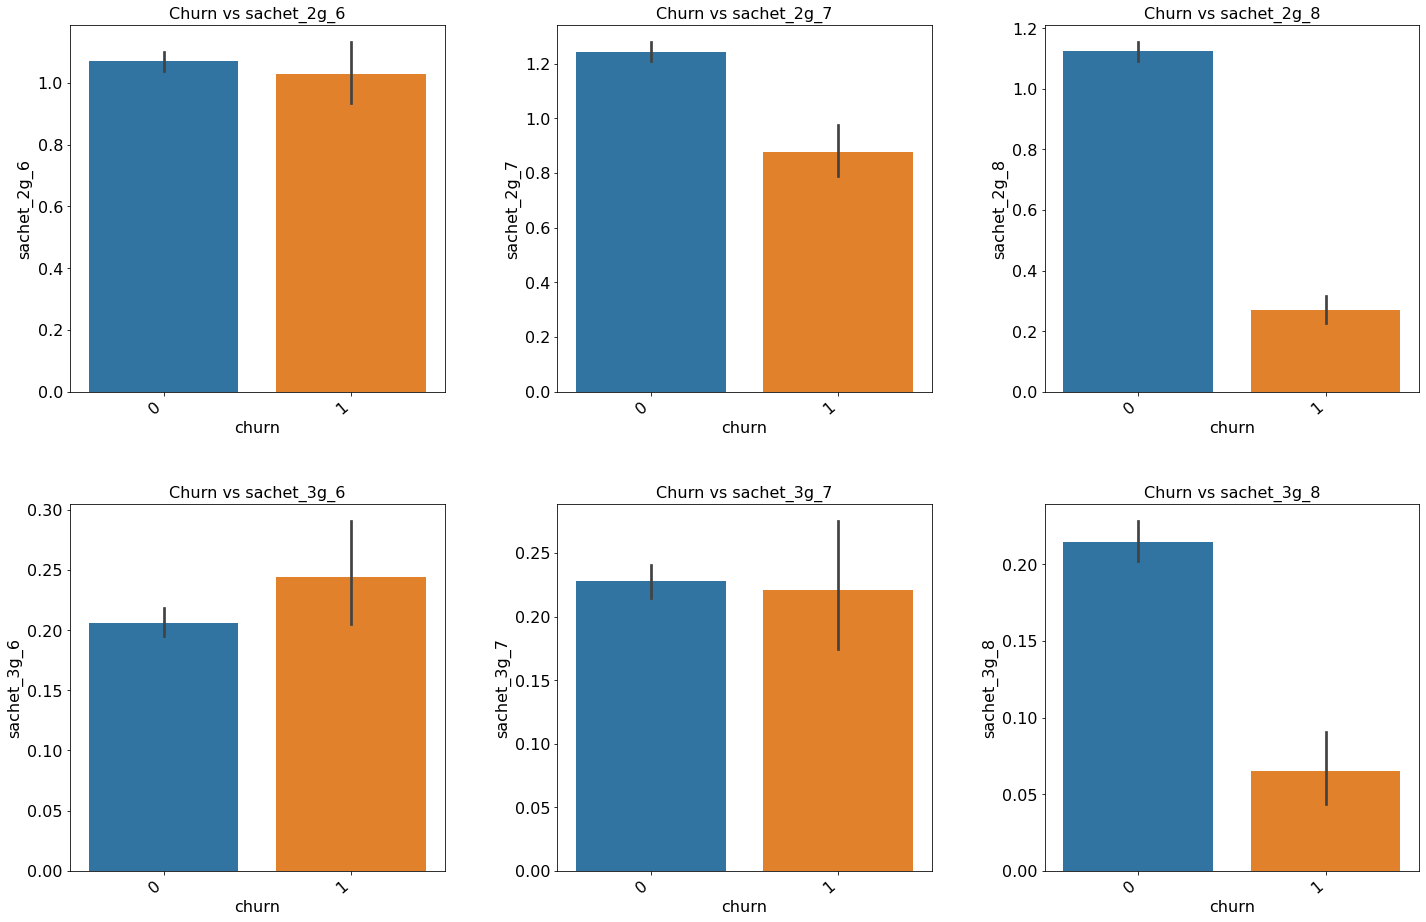

In [205]:
# Visualizing the data for vbc
plt.figure(figsize = (21, 14))
for i,j in enumerate(df_high_value_cust.loc[:,sachet]):
    plt.subplot(2,3,i+1)
    bar_plot(df_high_value_cust, j)
plt.show()

#### We can observe a decline in use of sachet for both 2G and 3G data for churned customers

#### Let's check for arpu related data

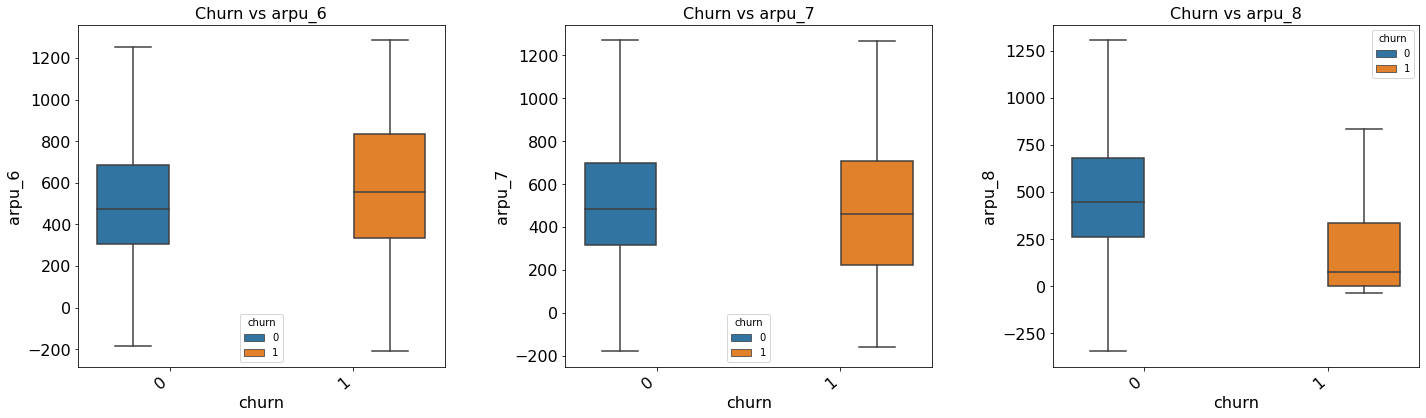

In [206]:
# Visualizing the data for vbc
plt.figure(figsize = (21, 7))
for i,j in enumerate(df_high_value_cust.loc[:,arpu]):
    plt.subplot(1,3,i+1)
    multiplot(df_high_value_cust, j)
plt.show()

#### Again, we see there is a decline in __Average Revenue per user__ from Good phase to action phase

#### Let's check for offnet related data

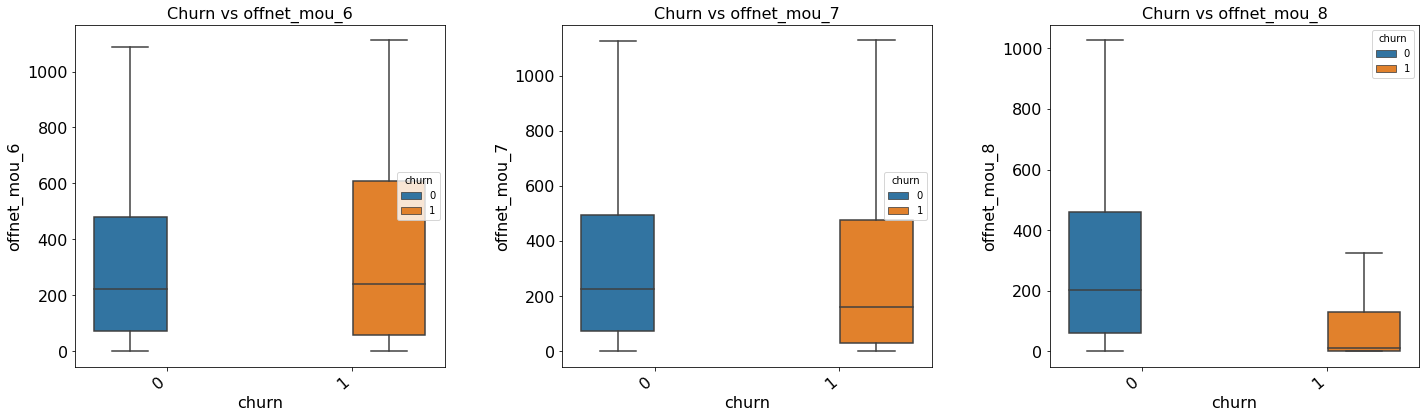

In [207]:
# Visualizing the data for vbc
plt.figure(figsize = (21, 7))
for i,j in enumerate(df_high_value_cust.loc[:,offnet]):
    plt.subplot(1,3,i+1)
    multiplot(df_high_value_cust, j)
plt.show()

#### Again, we see there is a decline in all kinds of calls outside the network from Good phase to action phase

#### Let's check for onnet related data

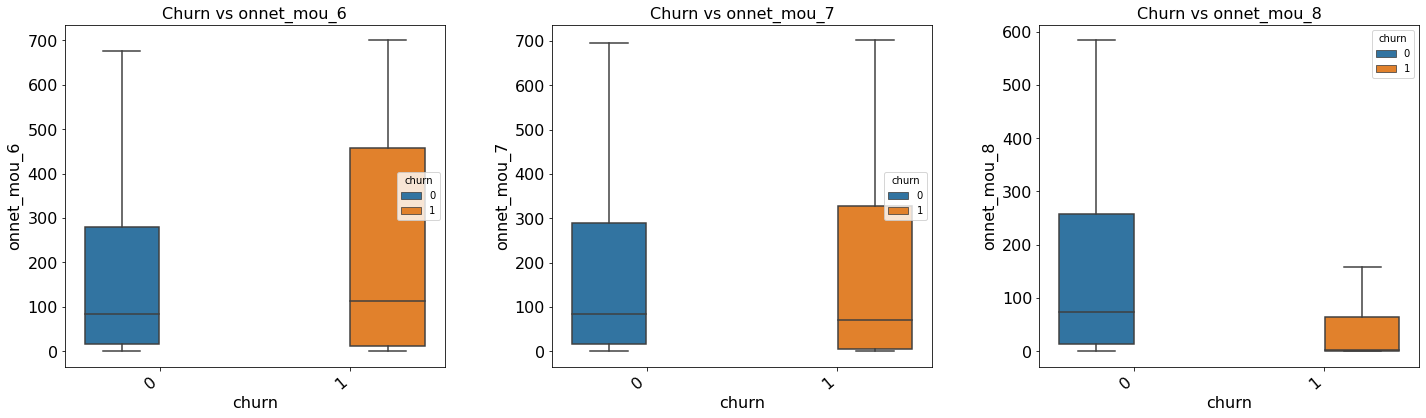

In [208]:
# Visualizing the data for vbc
plt.figure(figsize = (21, 7))
for i,j in enumerate(df_high_value_cust.loc[:,onnet]):
    plt.subplot(1,3,i+1)
    multiplot(df_high_value_cust, j)
plt.show()

#### Again, we see there is a decline in all kinds of calls within the same network too from from Good phase to action phase

#### Let's now look at incoming and outgoing related data

#### We have a list for incoming related column, let's take a look at that

In [209]:
np.array(ic)

array(['ic_others_6', 'ic_others_7', 'ic_others_8', 'isd_ic_mou_6',
       'isd_ic_mou_7', 'isd_ic_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_t2f_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8'], dtype='<U16')

#### Since there are lof of columns for incoming calls, we can take monthwise columns and then do analysis

In [210]:
ic_6 = [i for i in ic if '_6' in i]
ic_7 = [i for i in ic if '_7' in i]
ic_8 = [i for i in ic if '_8' in i]

#### Let's check correlation between incoming related columns for June

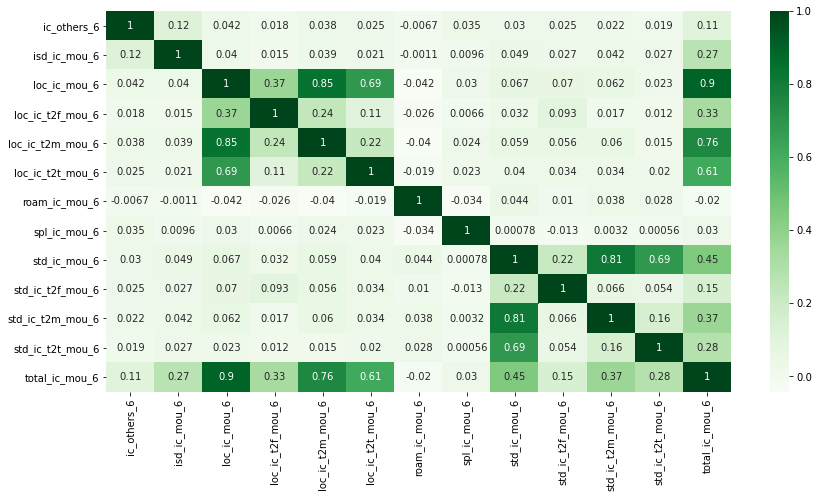

In [211]:
### Corr for data
plt.figure(figsize = (14,7))
sns.heatmap(df_high_value_cust[ic_6].corr(), annot = True, cmap = 'Greens')
plt.show()

#### From the heatmap we observe that the columns __loc_ic_mou_6__, __std_ic_mou_6__ and __total_ic_mou_6__ are highly correlated with other columns, we can remove these 

In [212]:
df_high_value_cust.drop(['loc_ic_mou_6', 'std_ic_mou_6', 'total_ic_mou_6'], inplace = True, axis = 1)

#### Let's check correlation between incoming related columns for July

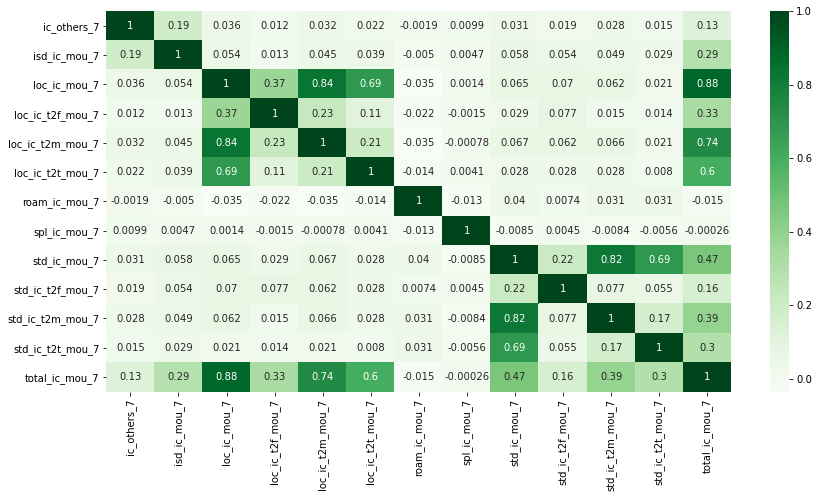

In [213]:
### Corr for data
plt.figure(figsize = (14,7))
sns.heatmap(df_high_value_cust[ic_7].corr(), annot = True, cmap = 'Greens')
plt.show()

#### From the heatmap we observe that the columns __loc_ic_mou_7__, __std_ic_mou_7__ and __total_ic_mou_7__ are highly correlated with other columns, we can remove these 

In [214]:
df_high_value_cust.drop(['loc_ic_mou_7', 'std_ic_mou_7', 'total_ic_mou_7'], inplace = True, axis = 1)

#### Theree seems a pattern between these columns with other columns. We can go ahead and drop these columns for Sep as well

In [215]:
df_high_value_cust.drop(['loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8'], inplace = True, axis = 1)

#### Let's now check for outgoing calls related columns. We will first make groups

In [216]:
og_6 = [i for i in og if '_6' in i]
og_7 = [i for i in og if '_7' in i]
og_8 = [i for i in og if '_8' in i]

#### Let's check correlation between incoming related columns for June

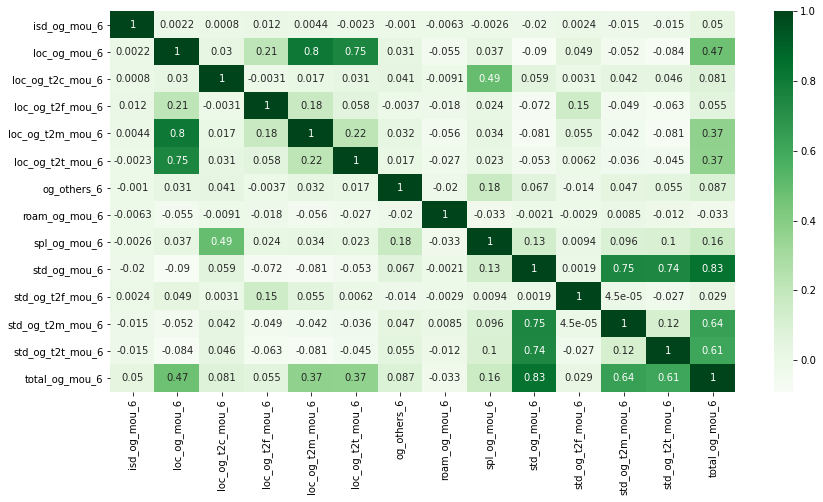

In [217]:
### Corr for data
plt.figure(figsize = (14,7))
sns.heatmap(df_high_value_cust[og_6].corr(), annot = True, cmap = 'Greens')
plt.show()

#### Here again, loc_og_mou_6, std_og_mou_6 and total_og_mou_6 are highly correlated with other columns, we can drop these

#### We will also drop for other months since we have observed a pattern

In [218]:
df_high_value_cust.drop(['loc_og_mou_6', 'std_og_mou_6', 'total_og_mou_6'], inplace = True, axis = 1)
df_high_value_cust.drop(['loc_og_mou_7', 'std_og_mou_7', 'total_og_mou_7'], inplace = True, axis = 1)
df_high_value_cust.drop(['loc_og_mou_8', 'std_og_mou_8', 'total_og_mou_8'], inplace = True, axis = 1)

#### Having done that, let's take a look at the shape of the dataset

In [219]:
df_high_value_cust.shape

(30001, 132)

#### We are left with 133 columns now

#### Let's take a look at the data

In [220]:
df_high_value_cust.head()

,arpu_6,arpu_7,arpu_8,aug_vbc_3g,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,ic_others_6,ic_others_7,ic_others_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,jul_vbc_3g,jun_vbc_3g,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,...,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,avg_rech_amt_6_7,churn,aon_yr
0,197.385,214.816,213.803,30.40,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,2014-06-21,2014-07-16,2014-08-08,2014-06-21,2014-07-16,2014-08-08,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,101.20,252.0,252.0,252.0,0.00,0.00,1.15,0.00,0.00,4.13,0.00,0.00,0.16,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,362.0,252.0,252.0,1.0,1.0,1.0,4,3,2,30.13,1.32,5.75,83.57,150.76,109.61,252.0,252.0,252.0,559.0,1,2.7
7,1069.180,2000.000,1987.000,57.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014-06-27,2014-07-25,2014-08-26,2014-06-01,2014-07-01,2014-08-01,15.74,15.19,15.14,2.06,14.53,31.59,0.0,0.18,10.01,19.38,18.74,0.0,0.0,565.0,152.16,101.46,39.53,217.56,221.49,121.19,58.14,32.26,27.31,0.0,0.0,0.00,62.13,55.14,53.23,308.63,447.38,...,0,0,0,0,0,0.21,0.0,0.0,4.5,0.0,6.50,52.19,34.24,22.21,91.44,126.99,141.33,36.89,11.83,30.39,6.66,20.08,16.68,49.89,31.76,49.14,4.30,23.29,12.01,2376.0,790.0,2341.0,0.0,0.0,0.0,5,5,7,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1185.0,1,2.2
8,378.721,492.223,137.362,21.03,0.0,177.0,69.0,0.0,2.0,3.0,0.0,0.0,0.0,2014-06-25,2014-07-31,2014-08-30,2014-06-01,2014-07-31,2014-08-23,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,910.65,122.16,50.0,0.0,10.0,0.00,0.00,0.00,57.58,13.98,15.48,23.84,9.84,0.31,0.0,0.0,7.15,0.00,0.00,0.00,80.96,70.58,...,1,3,0,0,0,0.00,0.0,0.0,0.0,0.0,10.23,0.00,0.00,0.00,22.43,4.08,0.65,0.00,0.58,0.10,0.00,0.00,0.00,13.69,10.04,75.69,116.56,133.43,22.58,437.0,601.0,120.0,0.0,2.0,3.0,19,21,14,0.00,1563.00,0.03,0.00,750.95,11.94,0.0,354.0,207.0,696.0,0,0.9
21,514.453,597.753,637.760,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-06-01,2014-07-01,2014-08-01,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,30.0,20.0,50.0,4.61,2.84,10.39,118.23,74.63,129.16,2.48,10.19,19.54,0.0,0.0,0.00,0.75,0.00,1.58,91.81,87.93,...,0,0,0,0,0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,67.69,38.23,101.74,14.06,5.98,0.18,0.00,0.00,0.00,665.36,808.74,876.99,97.93,125.94,61.79,600.0,680.0,718.0,0.0,0.0,0.0,22,26,27,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,640.0,0,2.0
23,74.350,193.897,366.966,40.45,0.0,356.0,270.0,0.0,0.0,0.0,0.0,2.0,2.0,2014-06-18,2014-07-07,2014-08-24,2014-06-01,2014-07-07,2014-08-06,0.00,5.35,13.06,0.00,28.23,3.74,0.0,0.01,0.00,51.86,0.00,0.0,179.0,0.0,0.00,0.00,0.71,95.91,113.36,146.84,20.71,61.04,76.64,0

### Deriving new features from existing features

#### Since we have two types of phases, we can merge the columns of good phase together by taking their average. That way, we will have reduced number of features to work with.

#### We will filter out columns with _6 and _7 in them and take their average in a new column. We will exclude columns which we have already used in finding average

In [221]:
mon_6 = [i for i in df_high_value_cust.columns if '_6' in i and '_6_7' not in i and 'date' not in i]

In [222]:
mon_7 = [i for i in df_high_value_cust.columns if '_7' in i and '_6_7' not in i and 'date' not in i]

In [223]:
for i in zip(mon_6,mon_7):
    col = 'av_'+ str(i[0][:-2])+ '_6_7'
    df_high_value_cust[col] = (df_high_value_cust[i[0]]+df_high_value_cust[i[1]])/2

#### Let's take a look at the new dataset

In [224]:
df_high_value_cust.head(10)

,arpu_6,arpu_7,arpu_8,aug_vbc_3g,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,ic_others_6,ic_others_7,ic_others_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,jul_vbc_3g,jun_vbc_3g,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,...,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,avg_rech_amt_6_7,churn,aon_yr,av_arpu_6_7,av_av_rech_amt_data_6_7,av_count_rech_2g_6_7,av_count_rech_3g_6_7,av_ic_others_6_7,av_isd_ic_mou_6_7,av_isd_og_mou_6_7,av_last_day_rch_amt_6_7,av_loc_ic_t2f_mou_6_7,av_loc_ic_t2m_mou_6_7,av_loc_ic_t2t_mou_6_7,av_loc_og_t2c_mou_6_7,av_loc_og_t2f_mou_6_7,av_loc_og_t2m_mou_6_7,av_loc_og_t2t_mou_6_7,av_max_rech_amt_6_7,av_max_rech_data_6_7,av_monthly_2g_6_7,av_monthly_3g_6_7,av_offnet_mou_6_7,av_og_others_6_7,av_onnet_mou_6_7,av_roam_ic_mou_6_7,av_roam_og_mou_6_7,av_sachet_2g_6_7,av_sachet_3g_6_7,av_spl_ic_mou_6_7,av_spl_og_mou_6_7,av_std_ic_t2f_mou_6_7,av_std_ic_t2m_mou_6_7,av_std_ic_t2t_mou_6_7,av_std_og_t2f_mou_6_7,av_std_og_t2m_mou_6_7,av_std_og_t2t_mou_6_7,av_total_rech_amt_6_7,av_total_rech_data_6_7,av_total_rech_num_6_7,av_vol_2g_mb_6_7,av_vol_3g_mb_6_7,av_total_data_rech_amt_6_7
0,197.385,214.816,213.803,30.40,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,2014-06-21,2014-07-16,2014-08-08,2014-06-21,2014-07-16,2014-08-08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,101.20,252.0,252.0,252.0,0.00,0.00,1.15,0.00,0.00,4.13,0.00,0.00,0.16,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,5.75,83.57,150.76,109.61,252.0,252.0,252.0,559.0,1,2.7,206.1005,252.0,0.0,1.0,0.000,0.000,0.000,252.0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,252.0,252.0,0.0,1.0,0.000,0.000,0.000,0.00,0.000,0.0,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,307.0,1.0,3.5,15.725,117.165,252.0
7,1069.180,2000.000,1987.000,57.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014-06-27,2014-07-25,2014-08-26,2014-06-01,2014-07-01,2014-08-01,15.74,15.19,15.14,2.06,14.53,31.59,0.00,0.18,10.01,19.38,18.74,0.0,0.0,565.0,152.16,101.46,39.53,217.56,221.49,121.19,58.14,32.26,27.31,0.00,0.0,0.00,62.13,55.14,53.23,308.63,447.38,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1185.0,1,2.2,1534.5900,0.0,0.0,0.0,15.465,8.295,0.090,0.0,126.810,219.525,45.200,0.00,58.635,378.005,41.385,1000.0,0.0,0.0,0.0,510.295,0.000,56.260,24.86,18.165,0.0,0.0,0.105,2.25,43.215,109.215,24.360,13.370,40.825,13.795,1583.0,0.0,5.0,0.000,0.000,0.0
8,378.721,492.223,137.362,21.03,0.0,177.0,69.0,0.0,2.0,3.0,0.0,0.0,0.0,2014-06-25,2014-07-31,2014-08-30,2014-06-01,2014-07-31,2014-08-23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,910.65,122.16,50.0,0.0,10.0,0.00,0.00,0.00,57.58,13.98,15.48,23.84,9.84,0.31,0.00,0.0,7.15,0.00,0.00,0.00,80.96,70.58,...,0.03,0.00,750.95,11.94,0.0,354.0,207.0,696.0,0,0.9,435.4720,88.5,1.0,0.0,0.000,0.000,0.000,25.0,0.000,35.780,16.840,0.00,0.000,75.770,257.360,122.0,77.0,0.5,0.0,87.645,0.000,382.360,0.00,0.000,0.5,0.0,0.000,0.00,0.000,13.255,0.290,0.000,11.865,124.995,519.0,1.0,20.0,781.500,375.475,177.0
21,514.453,597.753,637.760,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-06-01,2014-07-01,2014-08-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30.0,20.0,50.0,4.61,2.84,10.39,118.23,74.63,129.16,2.48,10.19,19.54,0.00,0.0,0.00,0.75,0.00,1.58,91.81,87.93,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,640.0,0,2.0,556.1030,0.0,0.0,0.0,0.000,0.000,0.000,25.0,3.725,96.430,6.335,0.00,0.375,89.870,5.320,50.0,0.0,0.0,0.0,827.30

#### Since we have merged the columns, we can remove the original columns

In [225]:
df_high_value_cust.drop(mon_6, axis = 1, inplace = True)
df_high_value_cust.drop(mon_7, axis = 1, inplace = True)

#### We can drop date related columns too

In [226]:
df_high_value_cust.drop([i for i in df_high_value_cust.columns if 'date' in i], axis = 1, inplace = True)

#### Let's take a look at the data

In [227]:
df_high_value_cust.head()

,arpu_8,aug_vbc_3g,av_rech_amt_data_8,count_rech_2g_8,count_rech_3g_8,ic_others_8,isd_ic_mou_8,isd_og_mou_8,jul_vbc_3g,jun_vbc_3g,last_day_rch_amt_8,loc_ic_t2f_mou_8,loc_ic_t2m_mou_8,loc_ic_t2t_mou_8,loc_og_t2c_mou_8,loc_og_t2f_mou_8,loc_og_t2m_mou_8,loc_og_t2t_mou_8,max_rech_amt_8,max_rech_data_8,monthly_2g_8,monthly_3g_8,offnet_mou_8,og_others_8,onnet_mou_8,roam_ic_mou_8,roam_og_mou_8,sachet_2g_8,sachet_3g_8,spl_ic_mou_8,spl_og_mou_8,std_ic_t2f_mou_8,std_ic_t2m_mou_8,std_ic_t2t_mou_8,std_og_t2f_mou_8,std_og_t2m_mou_8,std_og_t2t_mou_8,total_rech_amt_8,total_rech_data_8,total_rech_num_8,vol_2g_mb_8,vol_3g_mb_8,total_data_rech_amt_8,avg_rech_amt_6_7,churn,aon_yr,av_arpu_6_7,av_av_rech_amt_data_6_7,av_count_rech_2g_6_7,av_count_rech_3g_6_7,av_ic_others_6_7,av_isd_ic_mou_6_7,av_isd_og_mou_6_7,av_last_day_rch_amt_6_7,av_loc_ic_t2f_mou_6_7,av_loc_ic_t2m_mou_6_7,av_loc_ic_t2t_mou_6_7,av_loc_og_t2c_mou_6_7,av_loc_og_t2f_mou_6_7,av_loc_og_t2m_mou_6_7,av_loc_og_t2t_mou_6_7,av_max_rech_amt_6_7,av_max_rech_data_6_7,av_monthly_2g_6_7,av_monthly_3g_6_7,av_offnet_mou_6_7,av_og_others_6_7,av_onnet_mou_6_7,av_roam_ic_mou_6_7,av_roam_og_mou_6_7,av_sachet_2g_6_7,av_sachet_3g_6_7,av_spl_ic_mou_6_7,av_spl_og_mou_6_7,av_std_ic_t2f_mou_6_7,av_std_ic_t2m_mou_6_7,av_std_ic_t2t_mou_6_7,av_std_og_t2f_mou_6_7,av_std_og_t2m_mou_6_7,av_std_og_t2t_mou_6_7,av_total_rech_amt_6_7,av_total_rech_data_6_7,av_total_rech_num_6_7,av_vol_2g_mb_6_7,av_vol_3g_mb_6_7,av_total_data_rech_amt_6_7
0,213.803,30.40,252.0,0.0,1.0,0.00,0.00,0.00,0.00,101.20,252.0,1.15,4.13,0.16,0.00,0.00,0.00,0.00,252.0,252.0,0,1,0.00,0.0,0.00,0.00,0.00,0,0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,252.0,1.0,2,5.75,109.61,252.0,559.0,1,2.7,206.1005,252.0,0.0,1.0,0.000,0.000,0.000,252.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,252.0,252.0,0.0,1.0,0.000,0.0,0.00,0.00,0.000,0.0,0.0,0.000,0.00,0.000,0.000,0.000,0.00,0.000,0.000,307.0,1.0,3.5,15.725,117.165,252.0
7,1987.000,57.74,0.0,0.0,0.0,15.14,31.59,10.01,19.38,18.74,565.0,39.53,121.19,27.31,0.00,53.23,162.28,40.28,951.0,0.0,0,0,325.91,0.0,52.29,31.64,38.06,0,0,0.0,6.50,22.21,141.33,30.39,16.68,49.14,12.01,2341.0,0.0,7,0.00,0.00,0.0,1185.0,1,2.2,1534.5900,0.0,0.0,0.0,15.465,8.295,0.090,0.0,126.810,219.525,45.200,0.0,58.635,378.005,41.385,1000.0,0.0,0.0,0.0,510.295,0.0,56.26,24.86,18.165,0.0,0.0,0.105,2.25,43.215,109.215,24.360,13.37,40.825,13.795,1583.0,0.0,5.0,0.000,0.000,0.0
8,137.362,21.03,69.0,3.0,0.0,0.00,0.00,0.00,910.65,122.16,10.0,0.00,15.48,0.31,7.15,0.00,50.54,12.49,30.0,23.0,0,0,136.48,0.0,35.08,0.00,0.00,3,0,0.0,10.23,0.00,0.65,0.10,0.00,75.69,22.58,120.0,3.0,14,0.03,11.94,207.0,696.0,0,0.9,435.4720,88.5,1.0,0.0,0.000,0.000,0.000,25.0,0.000,35.780,16.840,0.0,0.000,75.770,257.360,122.0,77.0,0.5,0.0,87.645,0.0,382.36,0.00,0.000,0.5,0.0,0.000,0.00,0.000,13.255,0.290,0.00,11.865,124.995,519.0,1.0,20.0,781.500,375.475,177.0
21,637.760,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,50.0,10.39,129.16,19.54,0.00,1.58,104.81,23.34,50.0,0.0,0,0,983.39,0.0,85.14,0.00,0.00,0,0,0.0,0.00,0.00,101.74,0.18,0.00,876.99,61.79,718.0,0.0,27,0.00,0.00,0.0,640.0,0,2.0,556.1030,0.0,0.0,0.0,0.000,0.000,0.000,25.0,3.725,96.430,6.335,0.0,0.375,89.870,5.320,50.0,0.0,0.0,0.0,827.305,0.0,117.26,0.00,0.000,0.0,0.0,0.000,0.00,0.000,52.960,10.020,0.00,737.050,111.935,640.0,0.0,24.0,0.000,0.000,0.0
23,366.966,40.45,270.0,0.0,2.0,13.06,3.74,0.00,51.86,0.00,0.0,0.71,146.84,76.64,17.71,0.00,148.56,33.58,179.0,179.0,0,1,205.89,0.0,33.58,0.00,0.00,0,1,0.0,17.71,0.00,43.91,13.38,0.00,39.61,0.00,439.0,2.0,4,0.01,3942.00,540.0,583.0,0,1.7,134.1235,178.0,0.0,1.0,2.675,14.115,0.005,89.5,0.000,104.635,40.875,0.0,0.000,82.975,49.810,89.5,89.5,0.0,1.0,87.385,0.0,49.81,0.00,0.000,0.0,0.0,0.000,0.05,0.000,8.660,0.255,0.00,4.355,0.000,227.0,1.0,4.0,0.240,299.545,356.0


#### Let's again see how many features we are left with

In [228]:
df_high_value_cust.shape

(30001, 86)

#### Let's see distribution of data for certain fearures, using pairplot

#### Let's keep the variables that we will require to draw pairplots in a variable name pairs

In [229]:
# Crating a list for some variables
pairs = ['arpu_8', 'aug_vbc_3g','av_rech_amt_data_8','loc_og_t2c_mou_8', 'roam_ic_mou_8','roam_og_mou_8', 'churn']

In [230]:
df_high_value_cust.loc[:,pairs]

,arpu_8,aug_vbc_3g,av_rech_amt_data_8,loc_og_t2c_mou_8,roam_ic_mou_8,roam_og_mou_8,churn
0,213.803,30.40,252.0,0.00,0.00,0.00,1
7,1987.000,57.74,0.0,0.00,31.64,38.06,1
8,137.362,21.03,69.0,7.15,0.00,0.00,0
21,637.760,0.00,0.0,0.00,0.00,0.00,0
23,366.966,40.45,270.0,17.71,0.00,0.00,0
...,...,...,...,...,...,...,...
99981,393.474,1100.43,252.0,0.00,0.00,0.00,0
99984,118.707,0.00,117.0,7.28,0.00,0.00,0
99986,564.334,497.45,25.0,9.15,0.00,0.00,0
99988,402.080,104.73,154.0,0.01,0.00,0.00,0


In [231]:
## Keeping the data in a variable
paired_data = df_high_value_cust.loc[:,pairs]

#### Let's create a pairplot for the above dataset to view the relationship between different variables

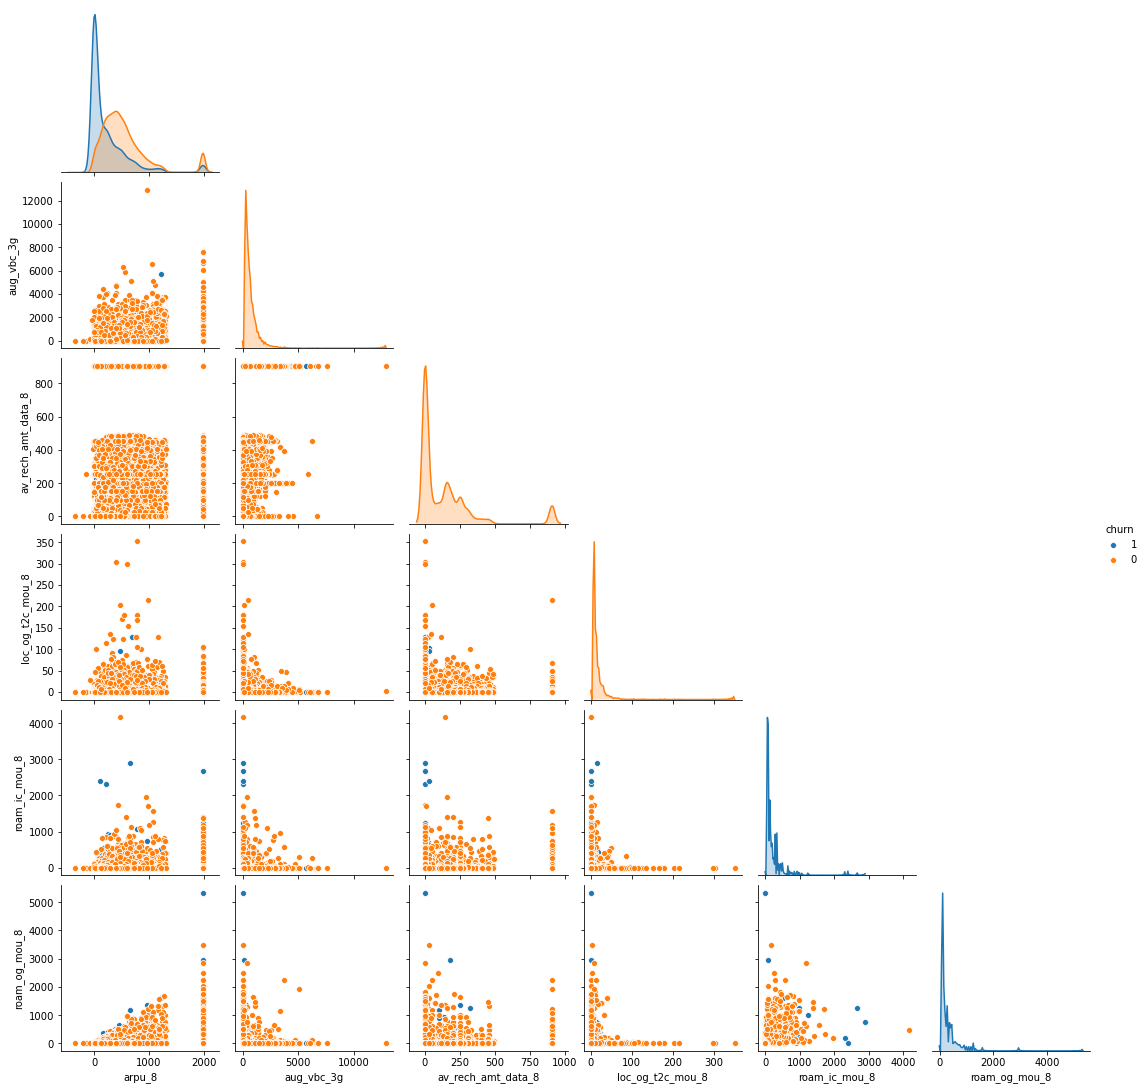

In [232]:
## Creating a pairplot for different variables
sns.pairplot(paired_data, hue = 'churn',corner = True,hue_order = paired_data['churn'].value_counts().sort_values().index)
plt.show()

#### We can observe that there are certain cluster of customers that can help us in identifying churners from non-churners

#### Since we will be working on this dataset from now on, we will make a copy of it and use it

In [233]:
df_final = df_high_value_cust.copy()

## Step 5: Performing PCA

#### Now, we will reduce the number of variables using PCA.

#### Before that,we will take a copy of data for performing pca

In [234]:
df_final_pca = df_final.copy()

#### Let's define X and y

In [235]:
# Putting feature variable to X
X = df_final_pca.drop('churn',axis=1)

# Putting response variable to y
y = df_final_pca['churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

#### Let's check for any imbalance in the derived column

#### Checking the percentage of churn in Y

In [236]:
round(100*y.sum()/len(y),2)

8.14

#### The data is quite imbalanced, we will need to apply techniques to handle imbalance

#### Performing scaling on the data first

In [237]:
## Performing scaling
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [238]:
X_scaled.head()

,arpu_8,aug_vbc_3g,av_rech_amt_data_8,count_rech_2g_8,count_rech_3g_8,ic_others_8,isd_ic_mou_8,isd_og_mou_8,jul_vbc_3g,jun_vbc_3g,last_day_rch_amt_8,loc_ic_t2f_mou_8,loc_ic_t2m_mou_8,loc_ic_t2t_mou_8,loc_og_t2c_mou_8,loc_og_t2f_mou_8,loc_og_t2m_mou_8,loc_og_t2t_mou_8,max_rech_amt_8,max_rech_data_8,monthly_2g_8,monthly_3g_8,offnet_mou_8,og_others_8,onnet_mou_8,roam_ic_mou_8,roam_og_mou_8,sachet_2g_8,sachet_3g_8,spl_ic_mou_8,spl_og_mou_8,std_ic_t2f_mou_8,std_ic_t2m_mou_8,std_ic_t2t_mou_8,std_og_t2f_mou_8,std_og_t2m_mou_8,std_og_t2t_mou_8,total_rech_amt_8,total_rech_data_8,total_rech_num_8,vol_2g_mb_8,vol_3g_mb_8,total_data_rech_amt_8,avg_rech_amt_6_7,aon_yr,av_arpu_6_7,av_av_rech_amt_data_6_7,av_count_rech_2g_6_7,av_count_rech_3g_6_7,av_ic_others_6_7,av_isd_ic_mou_6_7,av_isd_og_mou_6_7,av_last_day_rch_amt_6_7,av_loc_ic_t2f_mou_6_7,av_loc_ic_t2m_mou_6_7,av_loc_ic_t2t_mou_6_7,av_loc_og_t2c_mou_6_7,av_loc_og_t2f_mou_6_7,av_loc_og_t2m_mou_6_7,av_loc_og_t2t_mou_6_7,av_max_rech_amt_6_7,av_max_rech_data_6_7,av_monthly_2g_6_7,av_monthly_3g_6_7,av_offnet_mou_6_7,av_og_others_6_7,av_onnet_mou_6_7,av_roam_ic_mou_6_7,av_roam_og_mou_6_7,av_sachet_2g_6_7,av_sachet_3g_6_7,av_spl_ic_mou_6_7,av_spl_og_mou_6_7,av_std_ic_t2f_mou_6_7,av_std_ic_t2m_mou_6_7,av_std_ic_t2t_mou_6_7,av_std_og_t2f_mou_6_7,av_std_og_t2m_mou_6_7,av_std_og_t2t_mou_6_7,av_total_rech_amt_6_7,av_total_rech_data_6_7,av_total_rech_num_6_7,av_vol_2g_mb_6_7,av_vol_3g_mb_6_7,av_total_data_rech_amt_6_7
0,-0.698882,-0.329572,0.571045,-0.476296,0.459531,-0.095788,-0.155784,-0.043590,-0.403287,-0.137557,1.351251,-0.306046,-0.661315,-0.393050,-0.236923,-0.301836,-0.649485,-0.343393,0.399394,1.815816,-0.377948,1.277611,-0.685176,-0.017377,-0.512419,-0.168644,-0.189707,-0.415973,-0.183979,-0.240002,-0.322832,-0.128764,-0.270201,-0.195041,-0.144968,-0.384631,-0.373383,-0.659946,-0.207584,-0.859681,-0.469520,-0.381753,-0.344250,-0.512707,-0.233390,-0.987937,0.654441,-0.549242,0.499726,-0.096657,-0.154717,-0.047824,1.309880,-0.353049,-0.729557,-0.420265,-0.267267,-0.304642,-0.702492,-0.382766,0.223231,1.906151,-0.461314,1.359752,-0.782728,-0.142829,-0.586905,-0.217570,-0.250449,-0.472120,-0.230437,-0.268194,-0.373314,-0.153405,-0.319392,-0.201966,-0.157408,-0.466326,-0.441024,-0.838324,-0.281094,-0.959510,-0.509977,-0.413358,-0.359569
1,3.442790,-0.264626,-0.618627,-0.476296,-0.323876,1.088596,0.291670,0.180291,-0.359593,-0.335432,3.982107,0.580236,-0.116543,-0.222198,-0.236923,2.427634,0.045037,-0.166236,3.928749,-0.707627,-0.377948,-0.341722,-0.079491,-0.017377,-0.434243,0.258208,0.173748,-0.415973,-0.183979,-0.240002,-0.002816,0.987507,1.097419,0.230963,1.380881,-0.264512,-0.343173,3.454133,-0.541366,-0.320552,-0.480082,-0.464488,-0.470218,-0.100753,-0.424322,2.649403,-0.798246,-0.549242,-0.395576,1.029888,-0.041447,-0.045811,-0.920925,2.506385,0.330947,-0.132644,-0.267267,2.493445,0.925357,-0.196578,3.596852,-0.835232,-0.461314,-0.391135,0.179950,-0.142829,-0.495408,0.158656,-0.055712,-0.472120,-0.230437,0.428845,-0.243359,2.259784,0.843010,0.122605,1.002251,-0.362678,-0.405249,2.128344,-0.650586,-0.785789,-0.540618,-0.516098,-0.534202
2,-0.877426,-0.351830,-0.292884,0.706076,-0.323876,-0.095788,-0.155784,-0.043590,1.649868,-0.087261,-0.682830,-0.332602,-0.608495,-0.392106,0.755028,-0.301836,-0.433185,-0.288460,-0.721517,-0.477312,-0.377948,-0.341722,-0.431536,-0.017377,-0.459973,-0.168644,-0.189707,0.767040,-0.183979,-0.240002,0.180823,-0.128764,-0.263911,-0.193639,-0.144968,-0.199612,-0.316586,-0.919907,0.459982,0.434229,-0.480027,-0.455475,-0.366744,-0.422551,-0.920746,-0.359929,-0.288076,-0.132810,-0.395576,-0.096657,-0.154717,-0.047824,-0.699615,-0.353049,-0.556708,-0.313107,-0.267267,-0.304642,-0.376194,0.775076,-0.363094,0.002413,0.828155,-0.391135,-0.617385,-0.142829,0.034933,-0.217570,-0.250449,-0.265058,-0.230437,-0.268194,-0.373314,-0.153405,-0.178316,-0.198102,-0.157408,-0.436203,-0.116868,-0.345429,-0.281094,0.951421,0.982187,-0.186851,-0.411543
3,0.291358,-0.401786,-0.618627

#### Now we will apply PCA on this data

In [239]:
#### Performing PCA
pca = PCA(random_state = 100)
pca.fit(X_scaled)

PCA(random_state=100)

#### Components from the PCA

In [240]:
pca.components_

array([[-2.67019670e-02,  1.68447477e-01,  2.40725201e-01, ...,
         1.10233522e-01,  2.10295682e-01,  2.39047600e-01],
       [ 2.46632213e-01,  1.33048721e-01,  1.13024304e-01, ...,
        -8.70187295e-02,  1.24273253e-01, -4.23554080e-02],
       [ 2.06329019e-01, -5.08775870e-02,  4.81349055e-03, ...,
         9.42345776e-03, -6.39898228e-02,  1.14579340e-01],
       ...,
       [-0.00000000e+00, -1.41706906e-16,  5.18000341e-16, ...,
         2.94902991e-17, -5.55111512e-17, -7.63278329e-17],
       [ 0.00000000e+00, -2.04100686e-16,  2.69554268e-16, ...,
         3.64291930e-17, -4.16333634e-17, -1.04083409e-16],
       [-0.00000000e+00, -9.12898229e-17, -5.31241953e-16, ...,
        -7.02563008e-17,  2.75821033e-16,  1.89084859e-16]])

#### Looking at the explained variance ratio for each component


In [241]:
pca.explained_variance_ratio_

array([1.15085904e-01, 9.42854499e-02, 6.86841614e-02, 4.65650591e-02,
       3.45730293e-02, 3.21112704e-02, 3.05113027e-02, 2.85140554e-02,
       2.58276371e-02, 2.50851916e-02, 2.47044530e-02, 2.30190015e-02,
       2.22539483e-02, 2.12342578e-02, 2.05187272e-02, 1.98103611e-02,
       1.87867729e-02, 1.70804093e-02, 1.63566634e-02, 1.55075462e-02,
       1.48735641e-02, 1.44561230e-02, 1.38569570e-02, 1.32009647e-02,
       1.23278130e-02, 1.21266758e-02, 1.12924368e-02, 1.01937028e-02,
       1.00522956e-02, 9.69313351e-03, 9.18749731e-03, 9.05468664e-03,
       8.51678845e-03, 8.36355809e-03, 7.90222283e-03, 7.38599541e-03,
       7.23599118e-03, 6.98790180e-03, 6.62800844e-03, 5.77443081e-03,
       5.22635853e-03, 5.17854546e-03, 4.74283841e-03, 4.63989003e-03,
       4.46545553e-03, 4.22830766e-03, 3.93774902e-03, 3.80695905e-03,
       3.68049880e-03, 3.48040438e-03, 3.37430480e-03, 3.33012327e-03,
       3.11359287e-03, 3.09218082e-03, 3.00598671e-03, 2.94823148e-03,
      

In [242]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

#### Now we will plot a scree plt for the explained variance

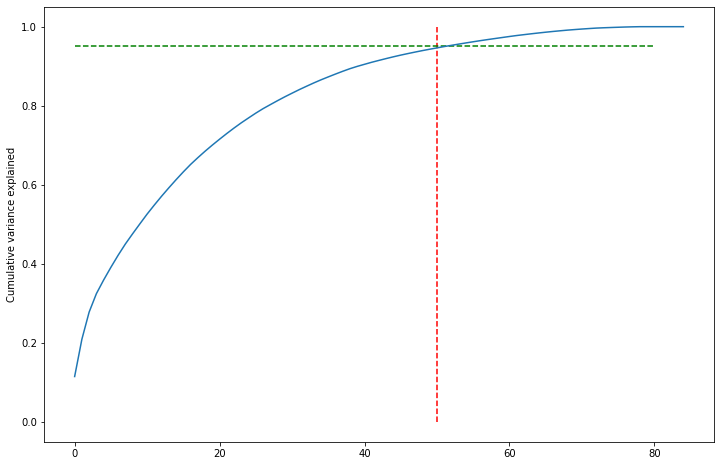

In [243]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=50, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=80, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Let's take a look at the features

In [244]:
pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],\
              'Feature':list(X_scaled.columns)}).head()

,PC1,PC2,PC3,Feature
0,-0.026702,0.246632,0.206329,arpu_8
1,0.168447,0.133049,-0.050878,aug_vbc_3g
2,0.240725,0.113024,0.004813,av_rech_amt_data_8
3,0.151176,-0.156341,0.197205,count_rech_2g_8
4,0.186838,0.064371,0.100096,count_rech_3g_8


#### Looking at the plot, 50 components are sufficient to eplain 95% of the variance. We will take 50 components

#### Doing Train test split

In [245]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [246]:
#### Checking the shape of train data
X_train.shape

(21000, 85)

#### Now we will apply techniques to handle imbalance in the data. We will apply SMOTE

In [247]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE(random_state = 100)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 19309, 1: 1691})
After Counter({0: 19309, 1: 19309})


#### Since we need to take 50 components from PCA, we will perform Incremental PCA on those

In [248]:
pca_final = IncrementalPCA(n_components=50)

In [249]:
df_train_pca = pca_final.fit_transform(X_train_sm)

In [250]:
df_train_pca.shape

(38618, 50)

In [251]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 50)

## Step 6: Modelling

## Now, we will apply various modelling techiques

### __Model1:__ Using the number of components determined by PCA

In [252]:
#Training the model on the train data

lr_pca = LogisticRegression()
model_pca = lr_pca.fit(df_train_pca,y_train_sm)

#### Let's make the predictions on test data

In [253]:
pred_prob = model_pca.predict_proba(df_test_pca)[:,1]
print("{:2.2}".format(roc_auc_score(y_test, pred_prob)))

0.89


#### Let's predict from PCA model

In [254]:
# Predict Results from PCA Model
y_pred_pca = model_pca.predict(df_test_pca)

#### Let's check the confusion matrix

In [255]:
print(confusion_matrix(y_test, y_pred_pca))

[[6303 1948]
 [ 122  628]]


#### Let's check the classification report

In [256]:
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      8251
           1       0.24      0.84      0.38       750

    accuracy                           0.77      9001
   macro avg       0.61      0.80      0.62      9001
weighted avg       0.92      0.77      0.82      9001



In [257]:
precision_score(y_test,y_pred_pca)

0.24378881987577639

#### Creating a dataframe and keeping important features in it

In [258]:
eval_mat = pd.DataFrame()

In [259]:
eval_mat = eval_mat.append({'Model Name':'Logistic', 'Recall': recall_score(y_test,y_pred_pca),\
                            'F1score':f1_score(y_test,y_pred_pca), 'AUCROC':roc_auc_score(y_test,\
                            model_pca.predict_proba(df_test_pca)[:,1]),'Hyperparameter used':'No',\
                           'Accuracy': accuracy_score(y_test, y_pred_pca)} , ignore_index=True)

In [260]:
eval_mat

,AUCROC,Accuracy,F1score,Hyperparameter used,Model Name,Recall
0,0.886281,0.770026,0.377631,No,Logistic,0.837333


### Since we are more interested in identifying the customers who are likely to churn, we will take Recall/True Positive Rate/ Senstivity to be good

#### After building the logistic regression model with the 50 components accuracy is 77% and recall of the churn case is 84%

#### Now, we will try another model by letting the PCA explain the variance

### Model 2 - Let PCA decide the number of Principal Components


In [261]:
## We will let PCA choose components explaining 90% variance
pca_again = PCA(0.9)

In [262]:
df_train_pca2 = pca_again.fit_transform(X_train_sm)
df_train_pca2.shape

(38618, 9)

#### PCA selected only 9 components

#### We will train another Regression Model on these components

In [263]:
#training the regression model
lr_pca2 = LogisticRegression()
model_pca2 = lr_pca2.fit(df_train_pca2,y_train_sm)

In [264]:
### Apply transform on test
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(9001, 9)

#### Let's make predictions on test data

In [265]:
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
print("{:2.2f}".format(roc_auc_score(y_test, pred_probs_test2)))

0.83


In [266]:
# Predict Results from PCA Model
y_pred_pca2 = model_pca2.predict(df_test_pca2)

In [267]:
## Let's check confusion matrix
confusion_PCA = confusion_matrix(y_test, y_pred_pca2)
print(confusion_PCA)

[[6332 1919]
 [ 159  591]]


#### Let's check classification report

In [268]:
print(classification_report(y_test, y_pred_pca2))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      8251
           1       0.24      0.79      0.36       750

    accuracy                           0.77      9001
   macro avg       0.61      0.78      0.61      9001
weighted avg       0.91      0.77      0.82      9001



In [269]:
eval_mat = eval_mat.append({'Model Name':'Logistic with PCA', 'Recall': recall_score(y_test,y_pred_pca2),\
                            'F1score':f1_score(y_test,y_pred_pca2),'AUCROC':roc_auc_score(y_test,\
                            model_pca2.predict_proba(df_test_pca2)[:,1]),'Hyperparameter used':'No',\
                            'Accuracy': accuracy_score(y_test, y_pred_pca2)} , ignore_index=True)

In [270]:
eval_mat

,AUCROC,Accuracy,F1score,Hyperparameter used,Model Name,Recall
0,0.886281,0.770026,0.377631,No,Logistic,0.837333
1,0.829506,0.769137,0.362577,No,Logistic with PCA,0.788000


#### After building the Logistic Regression model with 9 components having 90% variance derived from the PCA accuracy is 77% and recall of the churn case  is 79%

## Model 3: Using Decision Trees

In [271]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [272]:
dt_model = dt_base.fit(X_train_sm, y_train_sm)

In [273]:
y_test_pred = dt_base.predict(X_test)

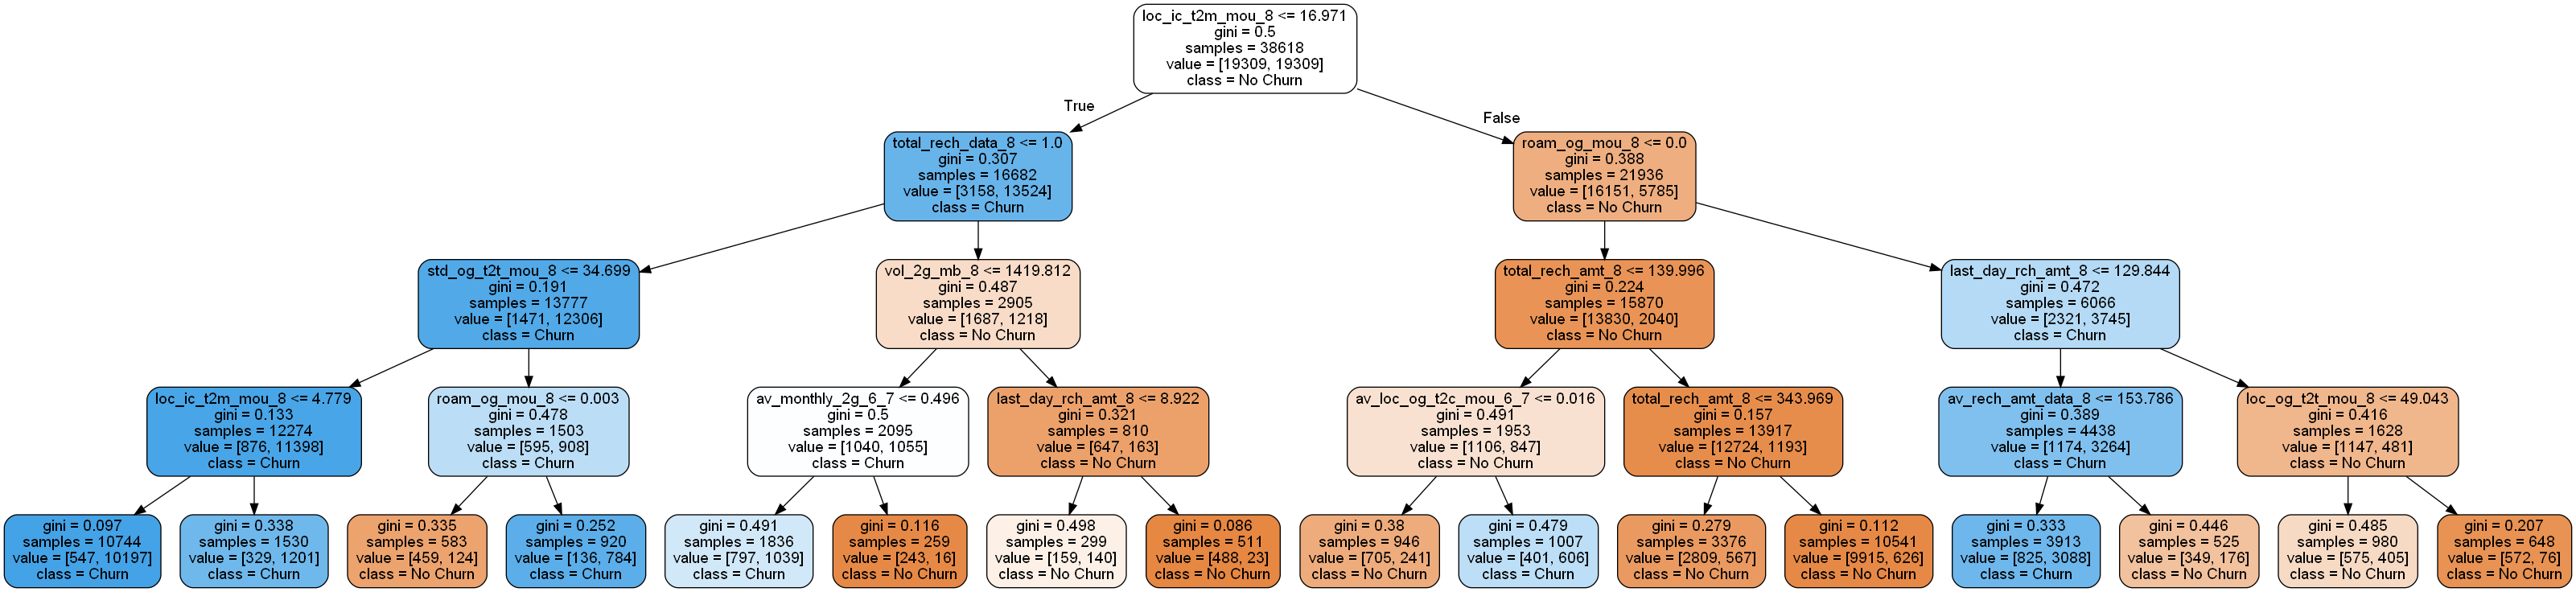

In [274]:
# plotting tree with max_depth=4
dot_data = StringIO()  

export_graphviz(dt_base, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Churn', 'Churn'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [275]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8251
           1       0.32      0.79      0.46       750

    accuracy                           0.84      9001
   macro avg       0.65      0.82      0.68      9001
weighted avg       0.92      0.84      0.87      9001



In [276]:
eval_mat = eval_mat.append({'Model Name':'Decision Tree', 'Recall': recall_score(y_test,y_test_pred),\
                            'F1score':f1_score(y_test,y_test_pred),'AUCROC':roc_auc_score(y_test, 
                            dt_base.predict_proba(X_test)[:,1]), 'Hyperparameter used':'No', 
                           'Accuracy': accuracy_score(y_test, y_pred_pca)} ,ignore_index=True)

In [277]:
eval_mat

,AUCROC,Accuracy,F1score,Hyperparameter used,Model Name,Recall
0,0.886281,0.770026,0.377631,No,Logistic,0.837333
1,0.829506,0.769137,0.362577,No,Logistic with PCA,0.788000
2,0.872467,0.770026,0.458285,No,Decision Tree,0.794667


#### After building the Decision Tree model accuracy is 77% and recall of the churn case  is 79%

## Model 4: Hyper-parameter tuning for the Decision Tree

In [278]:
dt = DecisionTreeClassifier(random_state=42)

In [279]:
params = {
    "max_depth": [2,3,5,10,20,100],
    "min_samples_leaf": [2,5,10,20,50,100,500,1000]
}

In [280]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [281]:
%%time
grid_search.fit(X_train_sm, y_train_sm)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
Wall time: 1min 17s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 100],
                         'min_samples_leaf': [2, 5, 10, 20, 50, 100, 500,
                                              1000]},
             scoring='accuracy', verbose=1)

In [282]:
grid_search.best_score_

0.9147810917507543

In [283]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=2, random_state=42)

In [284]:
y_test_pred = dt_best.predict(X_test)

In [285]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      8251
           1       0.41      0.62      0.49       750

    accuracy                           0.89      9001
   macro avg       0.69      0.77      0.72      9001
weighted avg       0.92      0.89      0.90      9001



In [286]:
eval_mat = eval_mat.append({'Model Name':'Decision Tree', 'Recall': recall_score(y_test,y_test_pred),\
                            'F1score':f1_score(y_test,y_test_pred),'AUCROC':roc_auc_score(y_test,\
                            dt_best.predict_proba(X_test)[:,1]),'Hyperparameter used':'Yes',
                            'Accuracy': accuracy_score(y_test, y_test_pred)} ,ignore_index=True)

In [287]:
eval_mat

,AUCROC,Accuracy,F1score,Hyperparameter used,Model Name,Recall
0,0.886281,0.770026,0.377631,No,Logistic,0.837333
1,0.829506,0.769137,0.362577,No,Logistic with PCA,0.788000
2,0.872467,0.770026,0.458285,No,Decision Tree,0.794667
3,0.765170,0.893456,0.492861,Yes,Decision Tree,0.621333


#### After building the Decision Tree with hyperparameter tuning, model accuracy is 89% and recall of the churn case  is 62%

## Model 5: Radom Forest

In [288]:
rfc = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)
rfc.fit(X_train_sm,y_train_sm)

<IPython.core.display.Javascript object>

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [289]:
# Making predictions
y_pred_rfc = rfc.predict(X_test)

In [290]:
## Let's check confusion matrix
confusion_RFC = confusion_matrix(y_test, y_pred_rfc)
print(confusion_RFC)

[[7440  811]
 [ 205  545]]


#### Let's check classification report

In [291]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      8251
           1       0.40      0.73      0.52       750

    accuracy                           0.89      9001
   macro avg       0.69      0.81      0.73      9001
weighted avg       0.93      0.89      0.90      9001



#### Checking oob score

In [292]:
rfc.oob_score_

0.8227769433942721

In [293]:
eval_mat = eval_mat.append({'Model Name':'Random Forest', 'Recall': recall_score(y_test,y_pred_rfc),\
                            'F1score':f1_score(y_test,y_pred_rfc),'AUCROC':roc_auc_score(y_test,\
                            rfc.predict_proba(X_test)[:,1]),'Hyperparameter used':'No',
                            'Accuracy': accuracy_score(y_test, y_pred_rfc)},ignore_index=True)

In [294]:
eval_mat

,AUCROC,Accuracy,F1score,Hyperparameter used,Model Name,Recall
0,0.886281,0.770026,0.377631,No,Logistic,0.837333
1,0.829506,0.769137,0.362577,No,Logistic with PCA,0.788000
2,0.872467,0.770026,0.458285,No,Decision Tree,0.794667
3,0.765170,0.893456,0.492861,Yes,Decision Tree,0.621333
4,0.893606,0.887124,0.517569,No,Random Forest,0.726667


#### After building the Random Forest, model accuracy is 89% and recall of the churn case  is 73%

### Model 6: Random Forest with Hyper-parameter tuning

In [295]:
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

<IPython.core.display.Javascript object>

In [296]:
params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [5,10,20,50,100],
    'n_estimators': [10, 25, 50]
}

In [297]:
grid_search = GridSearchCV(estimator=rfc,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [298]:
%%time
grid_search.fit(X_train_sm, y_train_sm)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
Wall time: 1min 58s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50]},
             scoring='accuracy', verbose=1)

In [299]:
grid_search.best_score_

0.9285568822104473

In [300]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [301]:
y_test_pred = rf_best.predict(X_test)

In [302]:
rf_best.feature_importances_

array([0.05985598, 0.00530483, 0.01965531, 0.01455696, 0.00547026,
       0.00183211, 0.00152932, 0.00155461, 0.00229646, 0.00307824,
       0.04450711, 0.01248037, 0.08633072, 0.03220396, 0.00250707,
       0.00311435, 0.04408054, 0.01641944, 0.04025156, 0.03349353,
       0.00289283, 0.00176558, 0.00587827, 0.0001149 , 0.00730984,
       0.0768911 , 0.07569669, 0.00359597, 0.00036362, 0.00378326,
       0.00279821, 0.00170978, 0.00814921, 0.00415157, 0.00058993,
       0.00341449, 0.00420015, 0.08965027, 0.04757845, 0.02682213,
       0.0128349 , 0.00753249, 0.01956147, 0.00402491, 0.00444979,
       0.00390837, 0.00242111, 0.00361854, 0.00651179, 0.00334588,
       0.00331457, 0.0026377 , 0.00389422, 0.00238504, 0.00592515,
       0.0029441 , 0.00629553, 0.00245857, 0.00529109, 0.00226647,
       0.00425756, 0.00375527, 0.00267623, 0.00235711, 0.00343677,
       0.00201037, 0.00227696, 0.00952639, 0.00924011, 0.00229101,
       0.00224651, 0.00476041, 0.00524343, 0.00185271, 0.00268

In [303]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [304]:
imp_df.sort_values(by="Imp", ascending=False).head(10)

,Varname,Imp
37,total_rech_amt_8,0.089650
12,loc_ic_t2m_mou_8,0.086331
25,roam_ic_mou_8,0.076891
26,roam_og_mou_8,0.075697
0,arpu_8,0.059856
38,total_rech_data_8,0.047578
10,last_day_rch_amt_8,0.044507
16,loc_og_t2m_mou_8,0.044081
18,max_rech_amt_8,0.040252
19,max_rech_data_8,0.033494


In [305]:
eval_mat = eval_mat.append({'Model Name':'Random Forest','Recall': recall_score(y_test,y_test_pred),\
                            'F1score':f1_score(y_test,y_test_pred),'AUCROC':roc_auc_score(y_test,\
                            rf_best.predict_proba(X_test)[:,1]),'Hyperparameter used':'Yes',
                            'Accuracy': accuracy_score(y_test, y_test_pred)},ignore_index=True)

In [306]:
eval_mat

,AUCROC,Accuracy,F1score,Hyperparameter used,Model Name,Recall
0,0.886281,0.770026,0.377631,No,Logistic,0.837333
1,0.829506,0.769137,0.362577,No,Logistic with PCA,0.788000
2,0.872467,0.770026,0.458285,No,Decision Tree,0.794667
3,0.765170,0.893456,0.492861,Yes,Decision Tree,0.621333
4,0.893606,0.887124,0.517569,No,Random Forest,0.726667
5,0.918283,0.911899,0.584164,Yes,Random Forest,0.742667


#### After building the Random Forest wiht hyperparameter tuning, model accuracy is 91% and recall of the churn case  is 74%

### Model 7: XGBoost Classifier

In [307]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic',eval_metric= 'error' )
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'eval_metric': 'error'}

In [308]:
# Fit the model to our train and target
xgb_cfl.fit(X_train_sm, y_train_sm)  # default 
# Get our predictions
xgb_predictions = xgb_cfl.predict(X_test)

#### Finding prediction probability

In [309]:
xgb_predictions_prob = xgb_cfl.predict_proba(X_test)
xgb_predictions_prob

array([[9.3907923e-01, 6.0920749e-02],
       [3.4582895e-01, 6.5417105e-01],
       [9.9941611e-01, 5.8390677e-04],
       ...,
       [9.9933654e-01, 6.6342956e-04],
       [9.9317849e-01, 6.8214992e-03],
       [9.9564266e-01, 4.3573151e-03]], dtype=float32)

#### Getting confusion matrix

In [310]:
## Let's check confusion matrix
confusion_XGB = confusion_matrix(y_test, xgb_predictions)
print(confusion_XGB)

[[7974  277]
 [ 326  424]]


#### Checking accuracy

In [311]:
accuracy_score(y_test, xgb_predictions)

0.9330074436173759

In [312]:
eval_mat = eval_mat.append({'Model Name':'XGBoost', 'Recall': recall_score(y_test,xgb_predictions),\
                            'F1score':f1_score(y_test,xgb_predictions),'AUCROC':roc_auc_score(y_test,\
                            xgb_cfl.predict_proba(X_test)[:,1]),'Hyperparameter used':'No',
                            'Accuracy': accuracy_score(y_test, xgb_predictions)},ignore_index=True)

In [313]:
eval_mat

,AUCROC,Accuracy,F1score,Hyperparameter used,Model Name,Recall
0,0.886281,0.770026,0.377631,No,Logistic,0.837333
1,0.829506,0.769137,0.362577,No,Logistic with PCA,0.788000
2,0.872467,0.770026,0.458285,No,Decision Tree,0.794667
3,0.765170,0.893456,0.492861,Yes,Decision Tree,0.621333
4,0.893606,0.887124,0.517569,No,Random Forest,0.726667
5,0.918283,0.911899,0.584164,Yes,Random Forest,0.742667
6,0.907793,0.933007,0.584425,No,XGBoost,0.565333


#### After building the model with XGBoost , model accuracy is 93% and recall of the churn case  is 56%

### Model 8: XGBoost with Hyperparameter Tuning

In [314]:
# A parameter grid for XGBoost
params = {
        'n_estimators' : [100, 200], # no of trees 
        'learning_rate' : [0.1, 0.5],  # eta
        'gamma': [0.5, 1],
        'max_depth': [4, 5, 10]
        }

grid_search = GridSearchCV(estimator=xgb_cfl,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


In [315]:
%%time
grid_search.fit(X_train_sm, y_train_sm)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
Wall time: 27min 32s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, eval_metric='error',
                                     gamma=0, gpu_id=-1, importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_p

In [316]:
print('\n Best estimator:')
print(grid_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (5, 800))
print(grid_search.best_score_ )
print('\n Best hyperparameters:')
print(grid_search.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0.5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

 Best accuracy for 5-fold search with 800 parameter combinations:
0.9631266899454421

 Best hyperparameters:
{'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}


In [317]:
xgb_predictions = grid_search.predict(X_test)

In [318]:
xgb_predictions_prob = grid_search.predict_proba(X_test)
xgb_predictions_prob

array([[0.9324164 , 0.06758361],
       [0.84160715, 0.15839286],
       [0.9987857 , 0.00121431],
       ...,
       [0.9987716 , 0.00122841],
       [0.98632497, 0.01367503],
       [0.9885571 , 0.01144289]], dtype=float32)

In [319]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [320]:
# Scatter plot 
trace = go.Scatter(
    y = xgb_cfl.feature_importances_,
    x = X.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1.3,
        size = 12,
        color = xgb_cfl.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = X.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'XGBOOST Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')

In [321]:
eval_mat = eval_mat.append({'Model Name':'XGBoost', 'Recall': recall_score(y_test, xgb_predictions),\
                            'F1score':f1_score(y_test,xgb_predictions), 'AUCROC':roc_auc_score(y_test,\
                            grid_search.predict_proba(X_test)[:,1]),'Hyperparameter used':'Yes',
                           'Accuracy': accuracy_score(y_test, xgb_predictions)}, ignore_index=True)

In [322]:
eval_mat

,AUCROC,Accuracy,F1score,Hyperparameter used,Model Name,Recall
0,0.886281,0.770026,0.377631,No,Logistic,0.837333
1,0.829506,0.769137,0.362577,No,Logistic with PCA,0.788000
2,0.872467,0.770026,0.458285,No,Decision Tree,0.794667
3,0.765170,0.893456,0.492861,Yes,Decision Tree,0.621333
4,0.893606,0.887124,0.517569,No,Random Forest,0.726667
5,0.918283,0.911899,0.584164,Yes,Random Forest,0.742667
6,0.907793,0.933007,0.584425,No,XGBoost,0.565333
7,0.919267,0.933896,0.604651,Yes,XGBoost,0.606667


#### After building the model with XGBoost and Hyperparameter tuning , model accuracy is 93% and recall of the churn case  is 61%

#### Recommendations

- Customers having less than 4 years of tenure are more likely to churn. The company need to concentrate more on that segment.
- Roaming on Incoming and Outgoing Calls for 8th month are strong indicators of churn behaviour
- Outgoing local calls to landline , fixedline , mobile and call center provides a strong indicator of churn behaviour.